# Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
import math
import warnings
import collections
import networkx.utils as utils
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [49]:
lista_meses=[]
for i in range(1,13):
	df=pd.read_excel(f"./2019/2019_{i}.xlsx")
	df2=df[["Origen","Destino","Pais Destino","Pais Origen","Pasajeros","CargaKg", "CorreoKg"]]
	df2.fillna(0)
	print(f'2019_{i}')
	lista_meses.append(df2)
	
T=pd.concat(lista_meses)

2019_1
2019_2
2019_3
2019_4
2019_5
2019_6
2019_7
2019_8
2019_9
2019_10
2019_11
2019_12


# Tratamiento de datos

## Limpieza de datos

In [50]:
df2=T[["Origen","Destino","Pais Destino","Pais Origen","Pasajeros","CargaKg","CorreoKg"]]
df3=df2[df2["Pais Origen"]=="COLOMBIA"]
df4=df3[df3["Pais Destino"]=="COLOMBIA"]
df5=df4[["Origen","Destino","Pasajeros","CargaKg","CorreoKg"]]
datos=df5.to_numpy()
print(datos)

[['ADZ' 'CLO' 9 0.0 0]
 ['CLO' 'ADZ' 0 0.0 0]
 ['ACD' 'EOH' 16 7.0 0]
 ...
 ['SMR' 'MDE' 20007.0 0.0 0.0]
 ['SMR' 'MTR' 8.0 0.0 0.0]
 ['SMR' 'PEI' 4777.0 0.0 0.0]]


## Ensanble del grafo

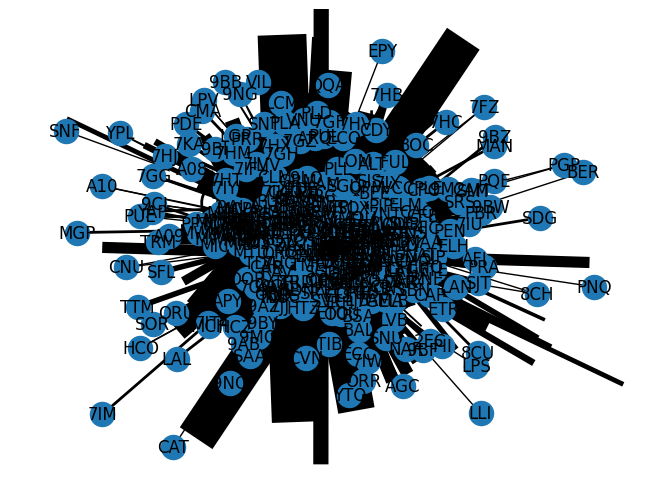

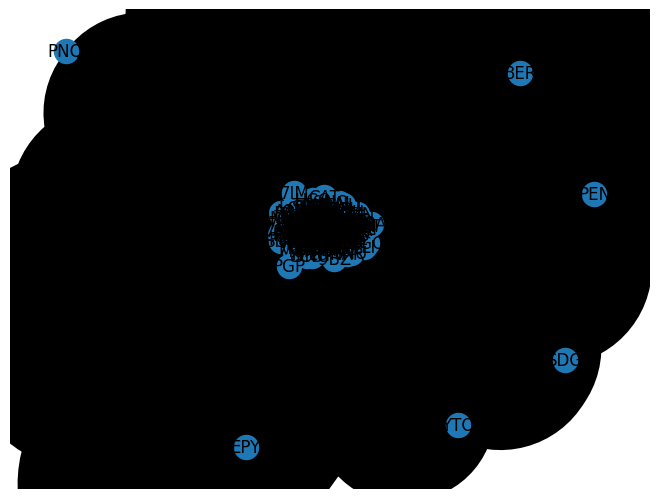

In [51]:
G=nx.Graph()
GD=nx.DiGraph()

aeropuertos1=df4['Destino'].unique()
aeropuertos2=df4['Origen'].unique()

nodos=[]
for aero in aeropuertos1:
	nodos.append(aero)

for aero in aeropuertos2:
	if aero not in nodos:
		nodos.append(aero)

for nodo in nodos:
	G.add_node(nodo)
	GD.add_node(nodo)

nx.set_node_attributes(G, 0, "Carga_sale")
nx.set_node_attributes(G, 0, "Carga_entra")
nx.set_node_attributes(G, 0, "Pasajeros_sale")
nx.set_node_attributes(G, 0, "Pasajeros_entra")

nx.set_node_attributes(GD, 0, "Carga_sale")
nx.set_node_attributes(GD, 0, "Carga_entra")
nx.set_node_attributes(GD, 0, "Pasajeros_sale")
nx.set_node_attributes(GD, 0, "Pasajeros_entra")
	

for i in range(datos.shape[0]):
	Origen=datos[i,0]
	Destino=datos[i,1]
	#print(Origen,Destino)
	
	if G.has_node(Origen) and G.has_node(Destino):

		if math.isnan(datos[i,2]):
			datos[i,2]=0
		if math.isnan(datos[i,3]):
			datos[i,3]=0
		if math.isnan(datos[i,4]):
			datos[i,4]=0
			
			
		G.nodes[Origen]["Carga_sale"]+=datos[i,3]+datos[i,4]
		G.nodes[Destino]["Carga_entra"]+=datos[i,3]+datos[i,4]

		G.nodes[Origen]["Pasajeros_sale"]+=datos[i,2]
		G.nodes[Destino]["Pasajeros_entra"]+=datos[i,2]


		if G.has_edge(Origen,Destino):
			G[Origen][Destino]['weight']+=1
		else:
			G.add_edge(Origen,Destino)
			G[Origen][Destino]['weight']=1
			
    

	else:
		print('--------------------------PROBLEMA--------------------------')
		print(Origen,Destino)
		
	if GD.has_node(Origen) and GD.has_node(Destino):

		if math.isnan(datos[i,2]):
			datos[i,2]=0
		if math.isnan(datos[i,3]):
			datos[i,3]=0
		if math.isnan(datos[i,4]):
			datos[i,4]=0
			
			
		GD.nodes[Origen]["Carga_sale"]+=datos[i,3]+datos[i,4]
		GD.nodes[Destino]["Carga_entra"]+=datos[i,3]+datos[i,4]

		GD.nodes[Origen]["Pasajeros_sale"]+=datos[i,2]
		GD.nodes[Destino]["Pasajeros_entra"]+=datos[i,2]


		if GD.has_edge(Origen,Destino):
			GD[Origen][Destino]['weight']+=1
		else:
			GD.add_edge(Origen,Destino)
			GD[Origen][Destino]['weight']=1
			

nodes_1=G.nodes()
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw(G,with_labels=True,width=weights)
nx.write_gexf(G,'./Grafo_2019_undi.gexf')
nx.write_weighted_edgelist(G,'./2019_undi.edgelist')
plt.show()
plt.close()

nodes_2=GD.nodes()
edges_2=GD.edges()
weights = [GD[u][v]['weight'] for u,v in edges_2]
nx.draw(GD,with_labels=True,width=weights)
nx.write_gexf(GD,'./Grafo_2019_di.gexf')
plt.show()



# Medidas undi

In [52]:
Nodos=G.nodes()
Edges=G.edges()
Num_nodos=len(Nodos)
Num_connections=len(Edges)
print(f'Numero de nodos: {Num_nodos}\nNumero de conecciones: {Num_connections}')

Numero de nodos: 354
Numero de conecciones: 2130


## Grado

[166, 148, 98, 92, 86, 78, 73, 73, 69, 68, 64, 56, 50, 49, 48, 43, 42, 42, 41, 41, 41, 41, 41, 40, 38, 38, 37, 35, 35, 34, 33, 31, 31, 31, 30, 29, 29, 29, 28, 28, 27, 27, 27, 26, 26, 26, 25, 24, 23, 22, 22, 21, 21, 21, 20, 20, 20, 20, 20, 19, 19, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

Text(0.5, 0, 'Rango')

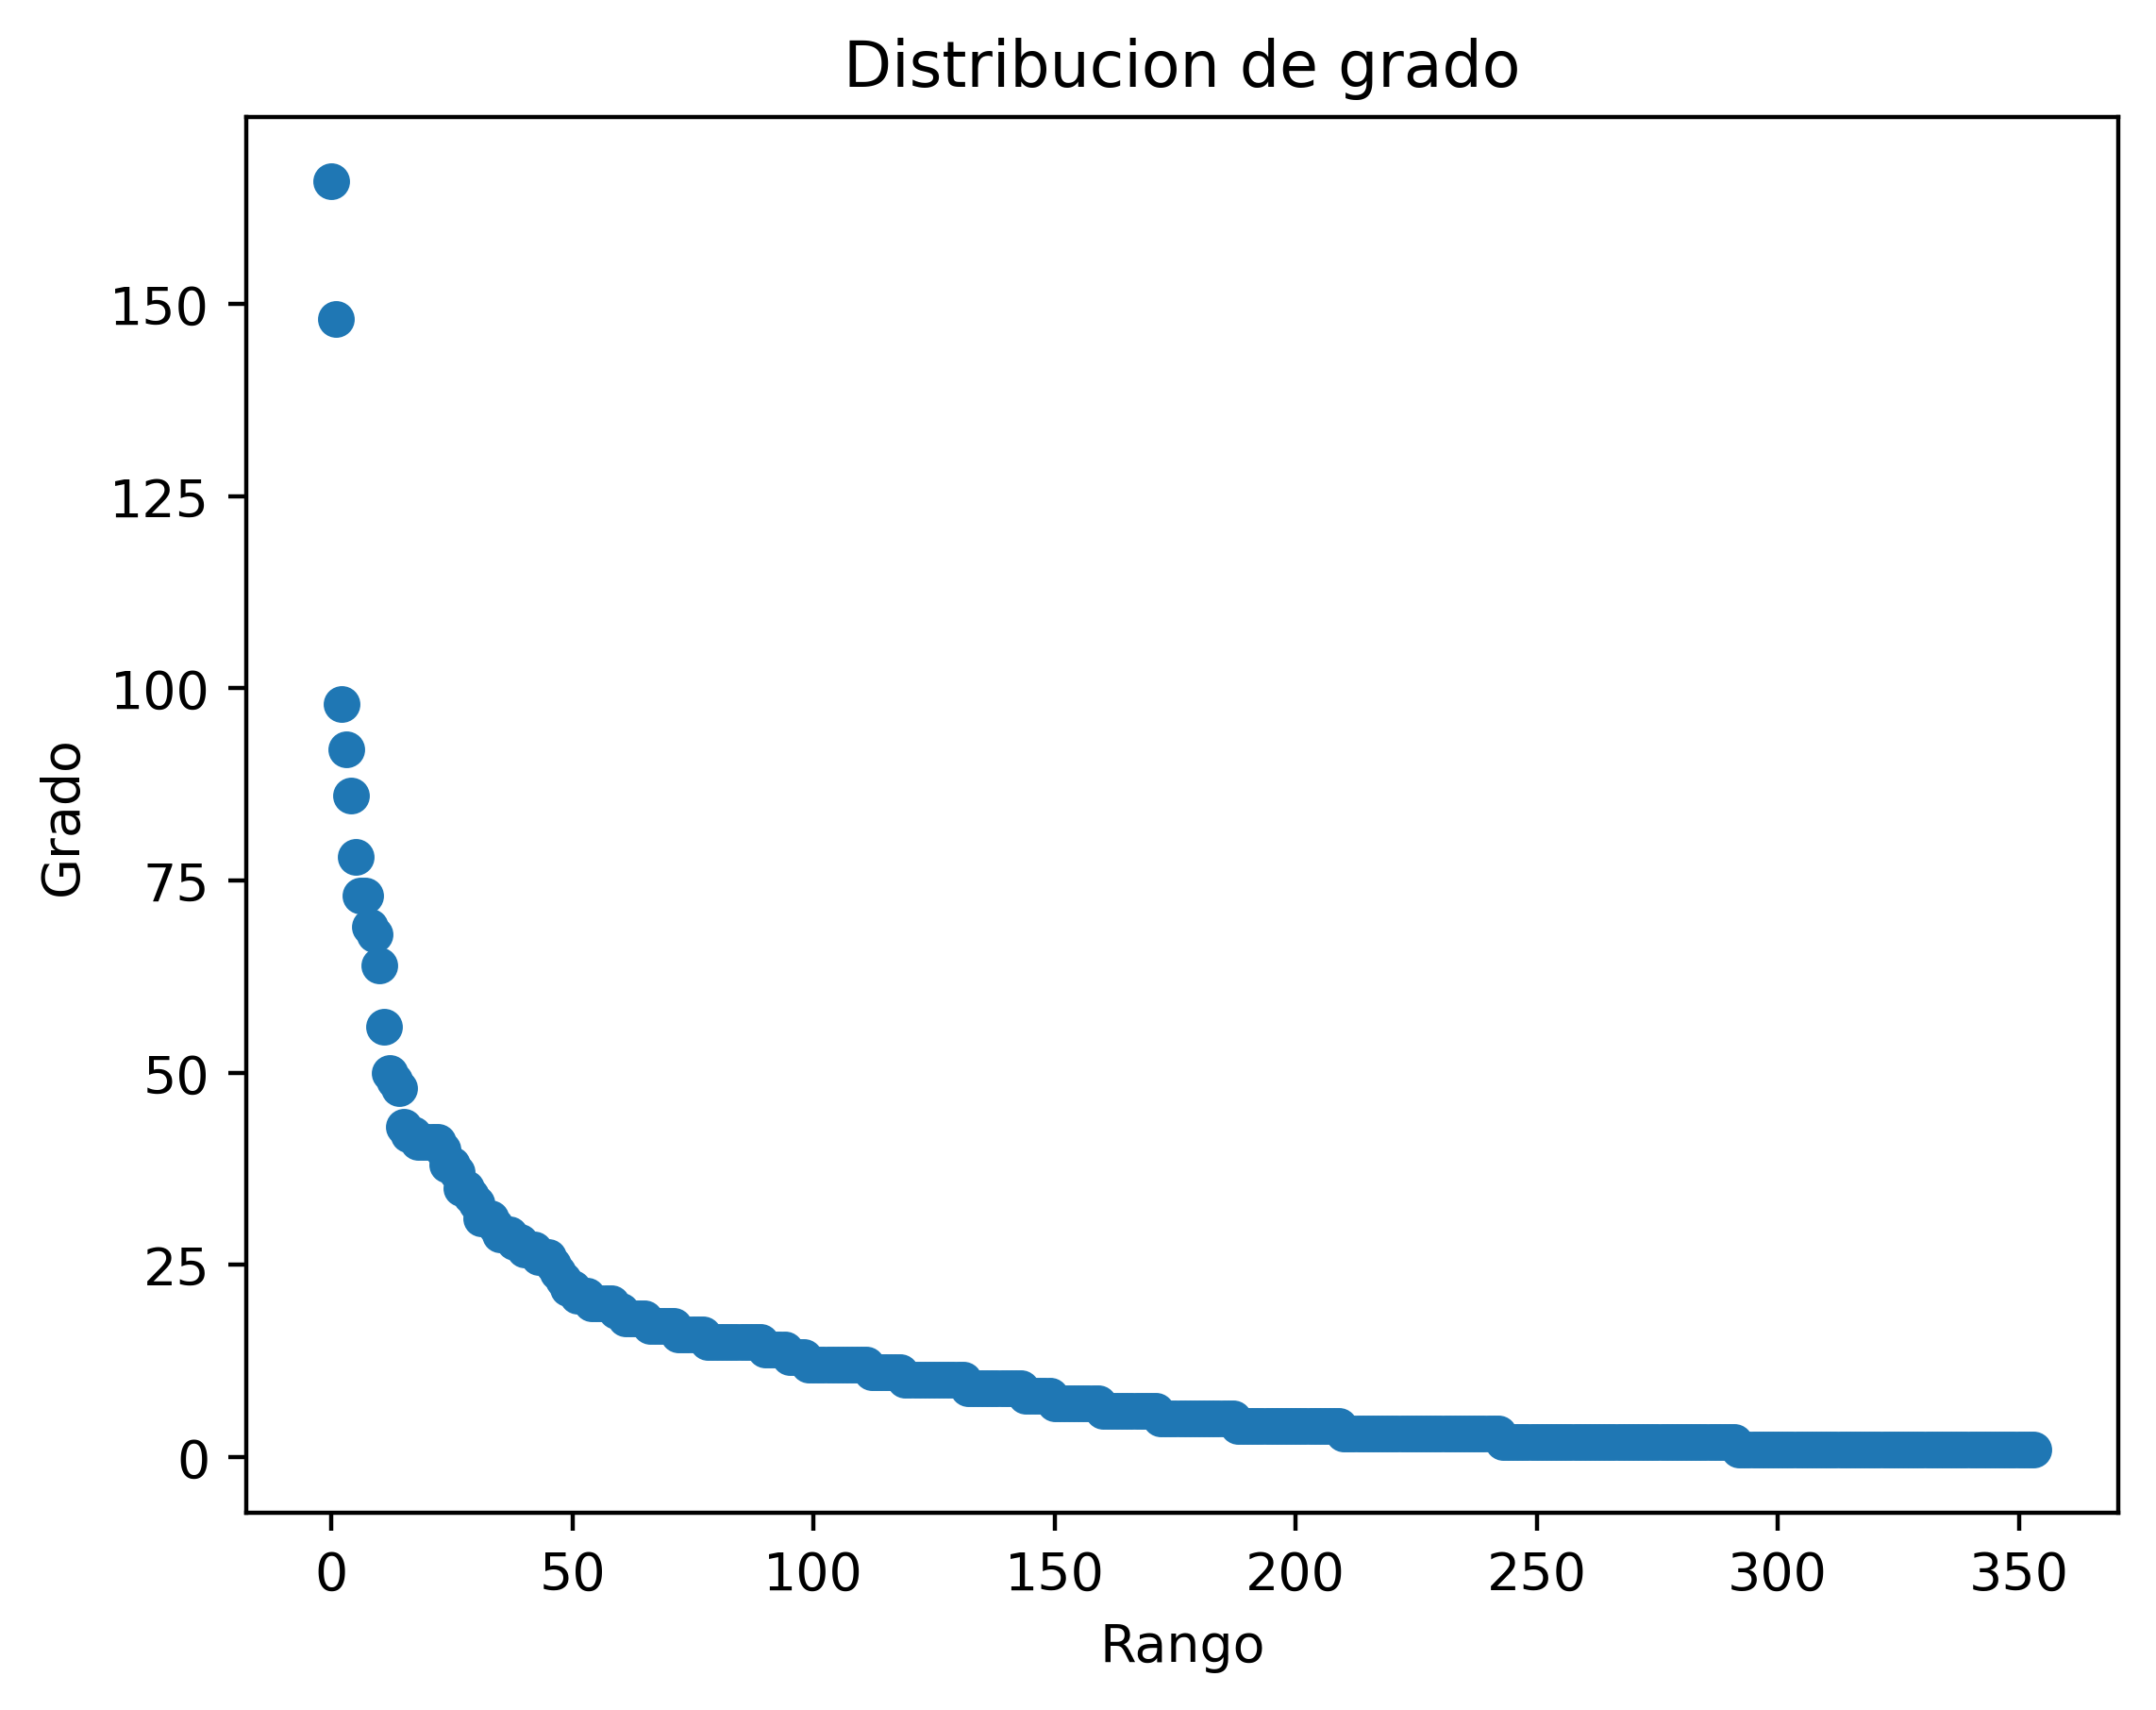

In [53]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
print(degree_sequence)
plt.figure(dpi=400)
plt.title("Distribucion de grado")
plt.scatter(np.arange(len(degree_sequence)),degree_sequence)
plt.ylabel("Grado")
plt.xlabel("Rango")

## Grado pesado

[7969, 6424, 4199, 3753, 3626, 3135, 3042, 2683, 2511, 2470, 2056, 2038, 1828, 1749, 1737, 1557, 1482, 1422, 1355, 1299, 1243, 1119, 1101, 1052, 987, 986, 973, 958, 930, 899, 852, 798, 788, 754, 716, 623, 582, 509, 501, 468, 456, 412, 407, 390, 380, 350, 311, 295, 286, 278, 274, 272, 263, 253, 240, 240, 239, 237, 229, 225, 215, 214, 214, 211, 211, 205, 201, 199, 198, 198, 194, 193, 192, 191, 188, 187, 185, 183, 176, 176, 175, 174, 173, 173, 169, 166, 161, 160, 158, 153, 152, 152, 152, 150, 148, 143, 143, 141, 140, 139, 137, 129, 127, 125, 125, 122, 118, 114, 114, 111, 111, 107, 106, 106, 104, 103, 100, 100, 94, 93, 92, 91, 90, 90, 90, 90, 90, 87, 85, 85, 85, 84, 83, 82, 82, 81, 81, 80, 78, 76, 74, 74, 73, 73, 73, 71, 71, 70, 69, 68, 68, 67, 66, 66, 65, 65, 65, 65, 64, 64, 63, 63, 62, 60, 60, 59, 59, 58, 58, 56, 54, 54, 53, 52, 52, 52, 52, 51, 50, 50, 50, 48, 44, 42, 40, 40, 40, 38, 37, 34, 34, 34, 33, 32, 32, 31, 31, 30, 29, 28, 28, 28, 28, 28, 28, 27, 27, 26, 26, 26, 25, 24, 23, 23, 2

Text(0.5, 0, 'Rango')

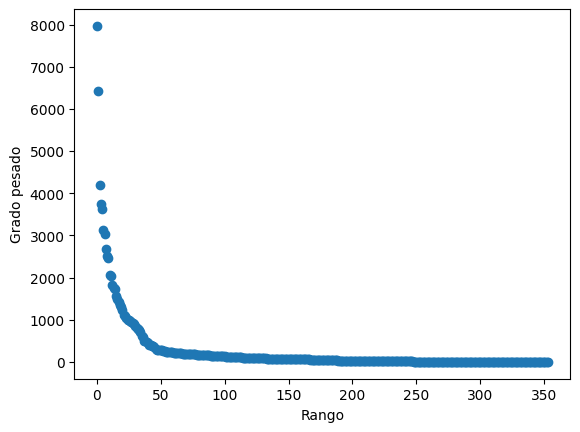

In [54]:
degree_sequence = sorted((d for n, d in G.degree(weight='weight')), reverse=True)
print(degree_sequence)
plt.scatter(np.arange(len(degree_sequence)),degree_sequence)
plt.ylabel("Grado pesado")
plt.xlabel("Rango")

## closeness_centrality

In [55]:
c=nx.closeness_centrality(G).items()
nx.set_node_attributes(G, c, "closeness_centrality")
print(c)


dict_items([('CLO', 0.538109756097561), ('ADZ', 0.4889196675900277), ('EOH', 0.5439137134052389), ('UIB', 0.42787878787878786), ('ACD', 0.3569261880687563), ('APO', 0.4268440145102781), ('AXM', 0.4937062937062937), ('BSC', 0.43472906403940886), ('CAQ', 0.3554884189325277), ('CZU', 0.48756906077348067), ('EBG', 0.3704092339979014), ('MTR', 0.49929278642149927), ('PEI', 0.500709219858156), ('TLU', 0.4071510957324106), ('BAQ', 0.5079136690647482), ('BGA', 0.5191176470588236), ('BOG', 0.6225749559082893), ('CTG', 0.524517087667162), ('CUC', 0.5035663338088445), ('EYP', 0.5777414075286416), ('LET', 0.5115942028985507), ('MDE', 0.5455950540958269), ('SMR', 0.5021337126600285), ('VUP', 0.4985875706214689), ('EJA', 0.5086455331412104), ('IBE', 0.5021337126600285), ('MZL', 0.4855570839064649), ('NVA', 0.5332326283987915), ('PPN', 0.5021337126600285), ('PSO', 0.4943977591036415), ('VVC', 0.6500920810313076), ('FLA', 0.5042857142857143), ('RCH', 0.48622589531680444), ('TCO', 0.49929278642149927),

## betweenness_centrality

In [56]:
b=nx.betweenness_centrality(G)
nx.set_node_attributes(G, b, "betweenness_centrality")
print(b)


{'CLO': 0.025841802319142456, 'ADZ': 0.0016642289720821975, 'EOH': 0.07878565953432179, 'UIB': 0.0036197317929744827, 'ACD': 1.2838318433219283e-05, 'APO': 0.0013080994339961399, 'AXM': 0.0007976348467627026, 'BSC': 0.003729558058189471, 'CAQ': 2.7321157470414548e-06, 'CZU': 0.0024541105445311357, 'EBG': 6.966058062663317e-05, 'MTR': 0.004691485148305607, 'PEI': 0.00214727668931537, 'TLU': 2.4576624363648636e-05, 'BAQ': 0.022587861880315023, 'BGA': 0.046365338608307605, 'BOG': 0.2510390949716, 'CTG': 0.036532390605116316, 'CUC': 0.008990168934015752, 'EYP': 0.11102952522936282, 'LET': 0.0134183481554367, 'MDE': 0.05320128065308012, 'SMR': 0.010696249327930356, 'VUP': 0.0036853199149794783, 'EJA': 0.014472326031279773, 'IBE': 0.0025352742063131173, 'MZL': 0.0001330803508004649, 'NVA': 0.016891498975360922, 'PPN': 0.004252244380649569, 'PSO': 0.0004982653687200607, 'VVC': 0.28611120834967463, 'FLA': 0.0031836085677774077, 'RCH': 0.0006912064539813658, 'TCO': 0.002814327051105559, 'AUC': 

## Shortest path

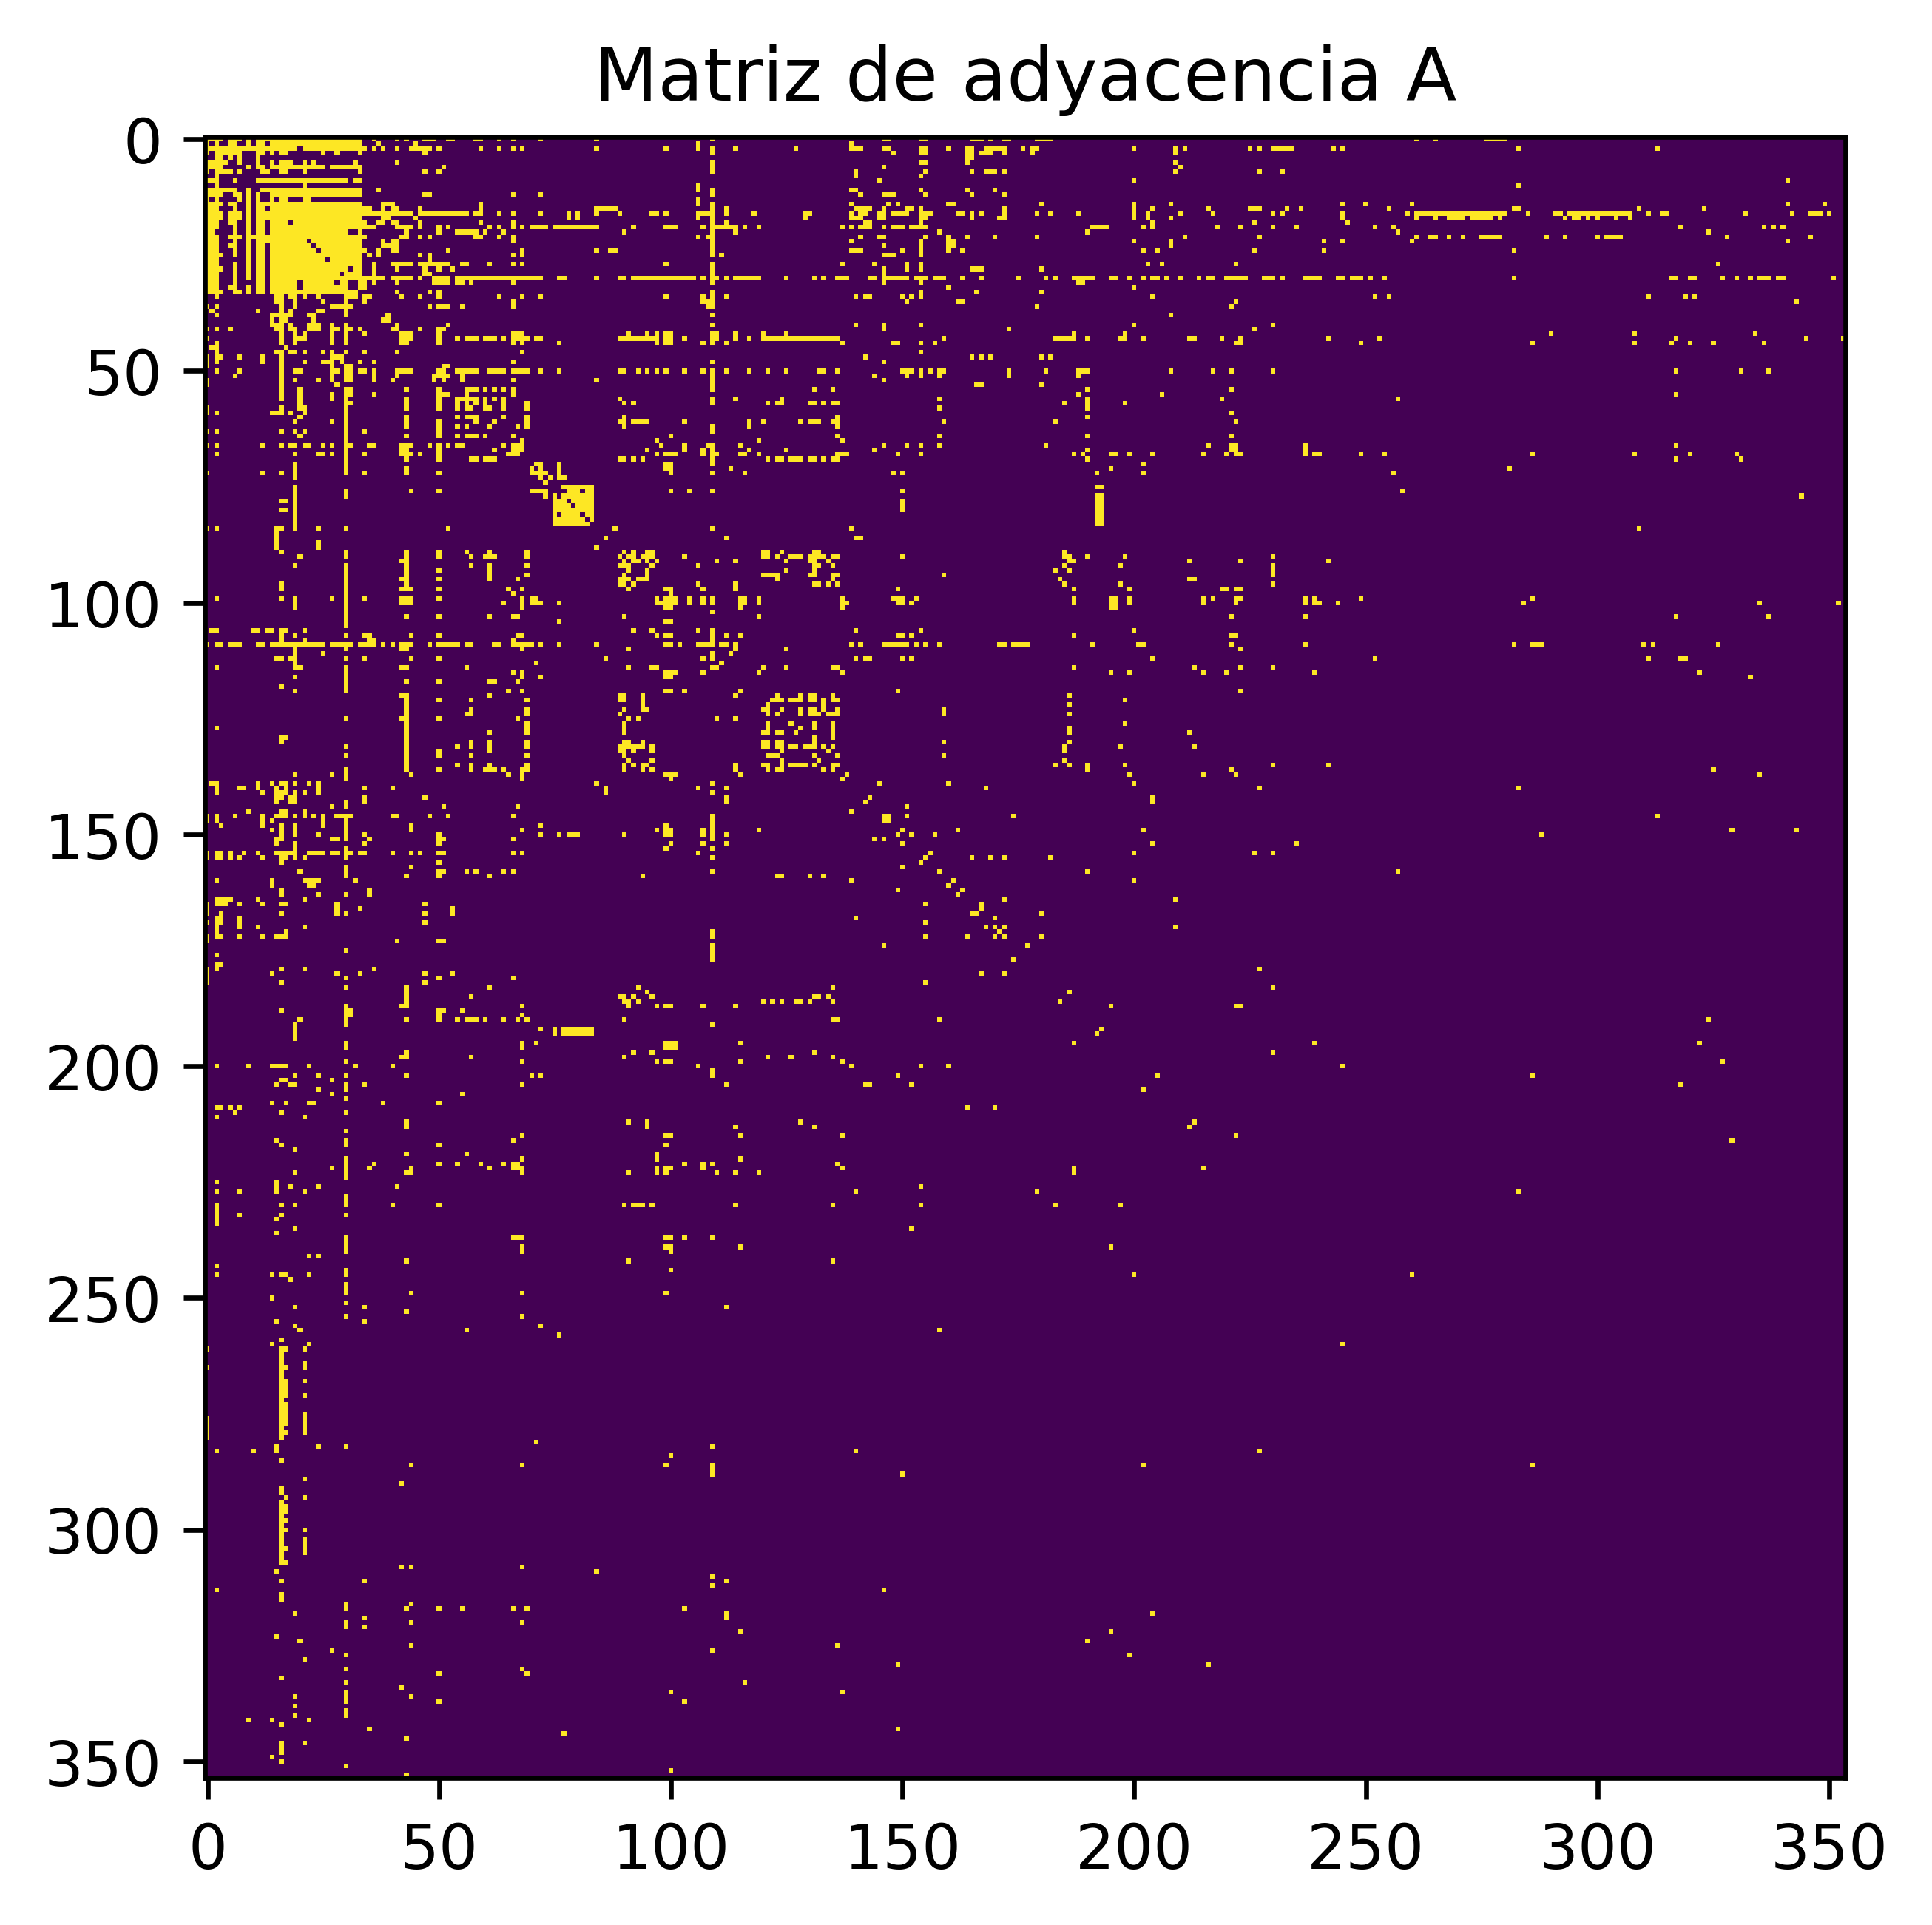

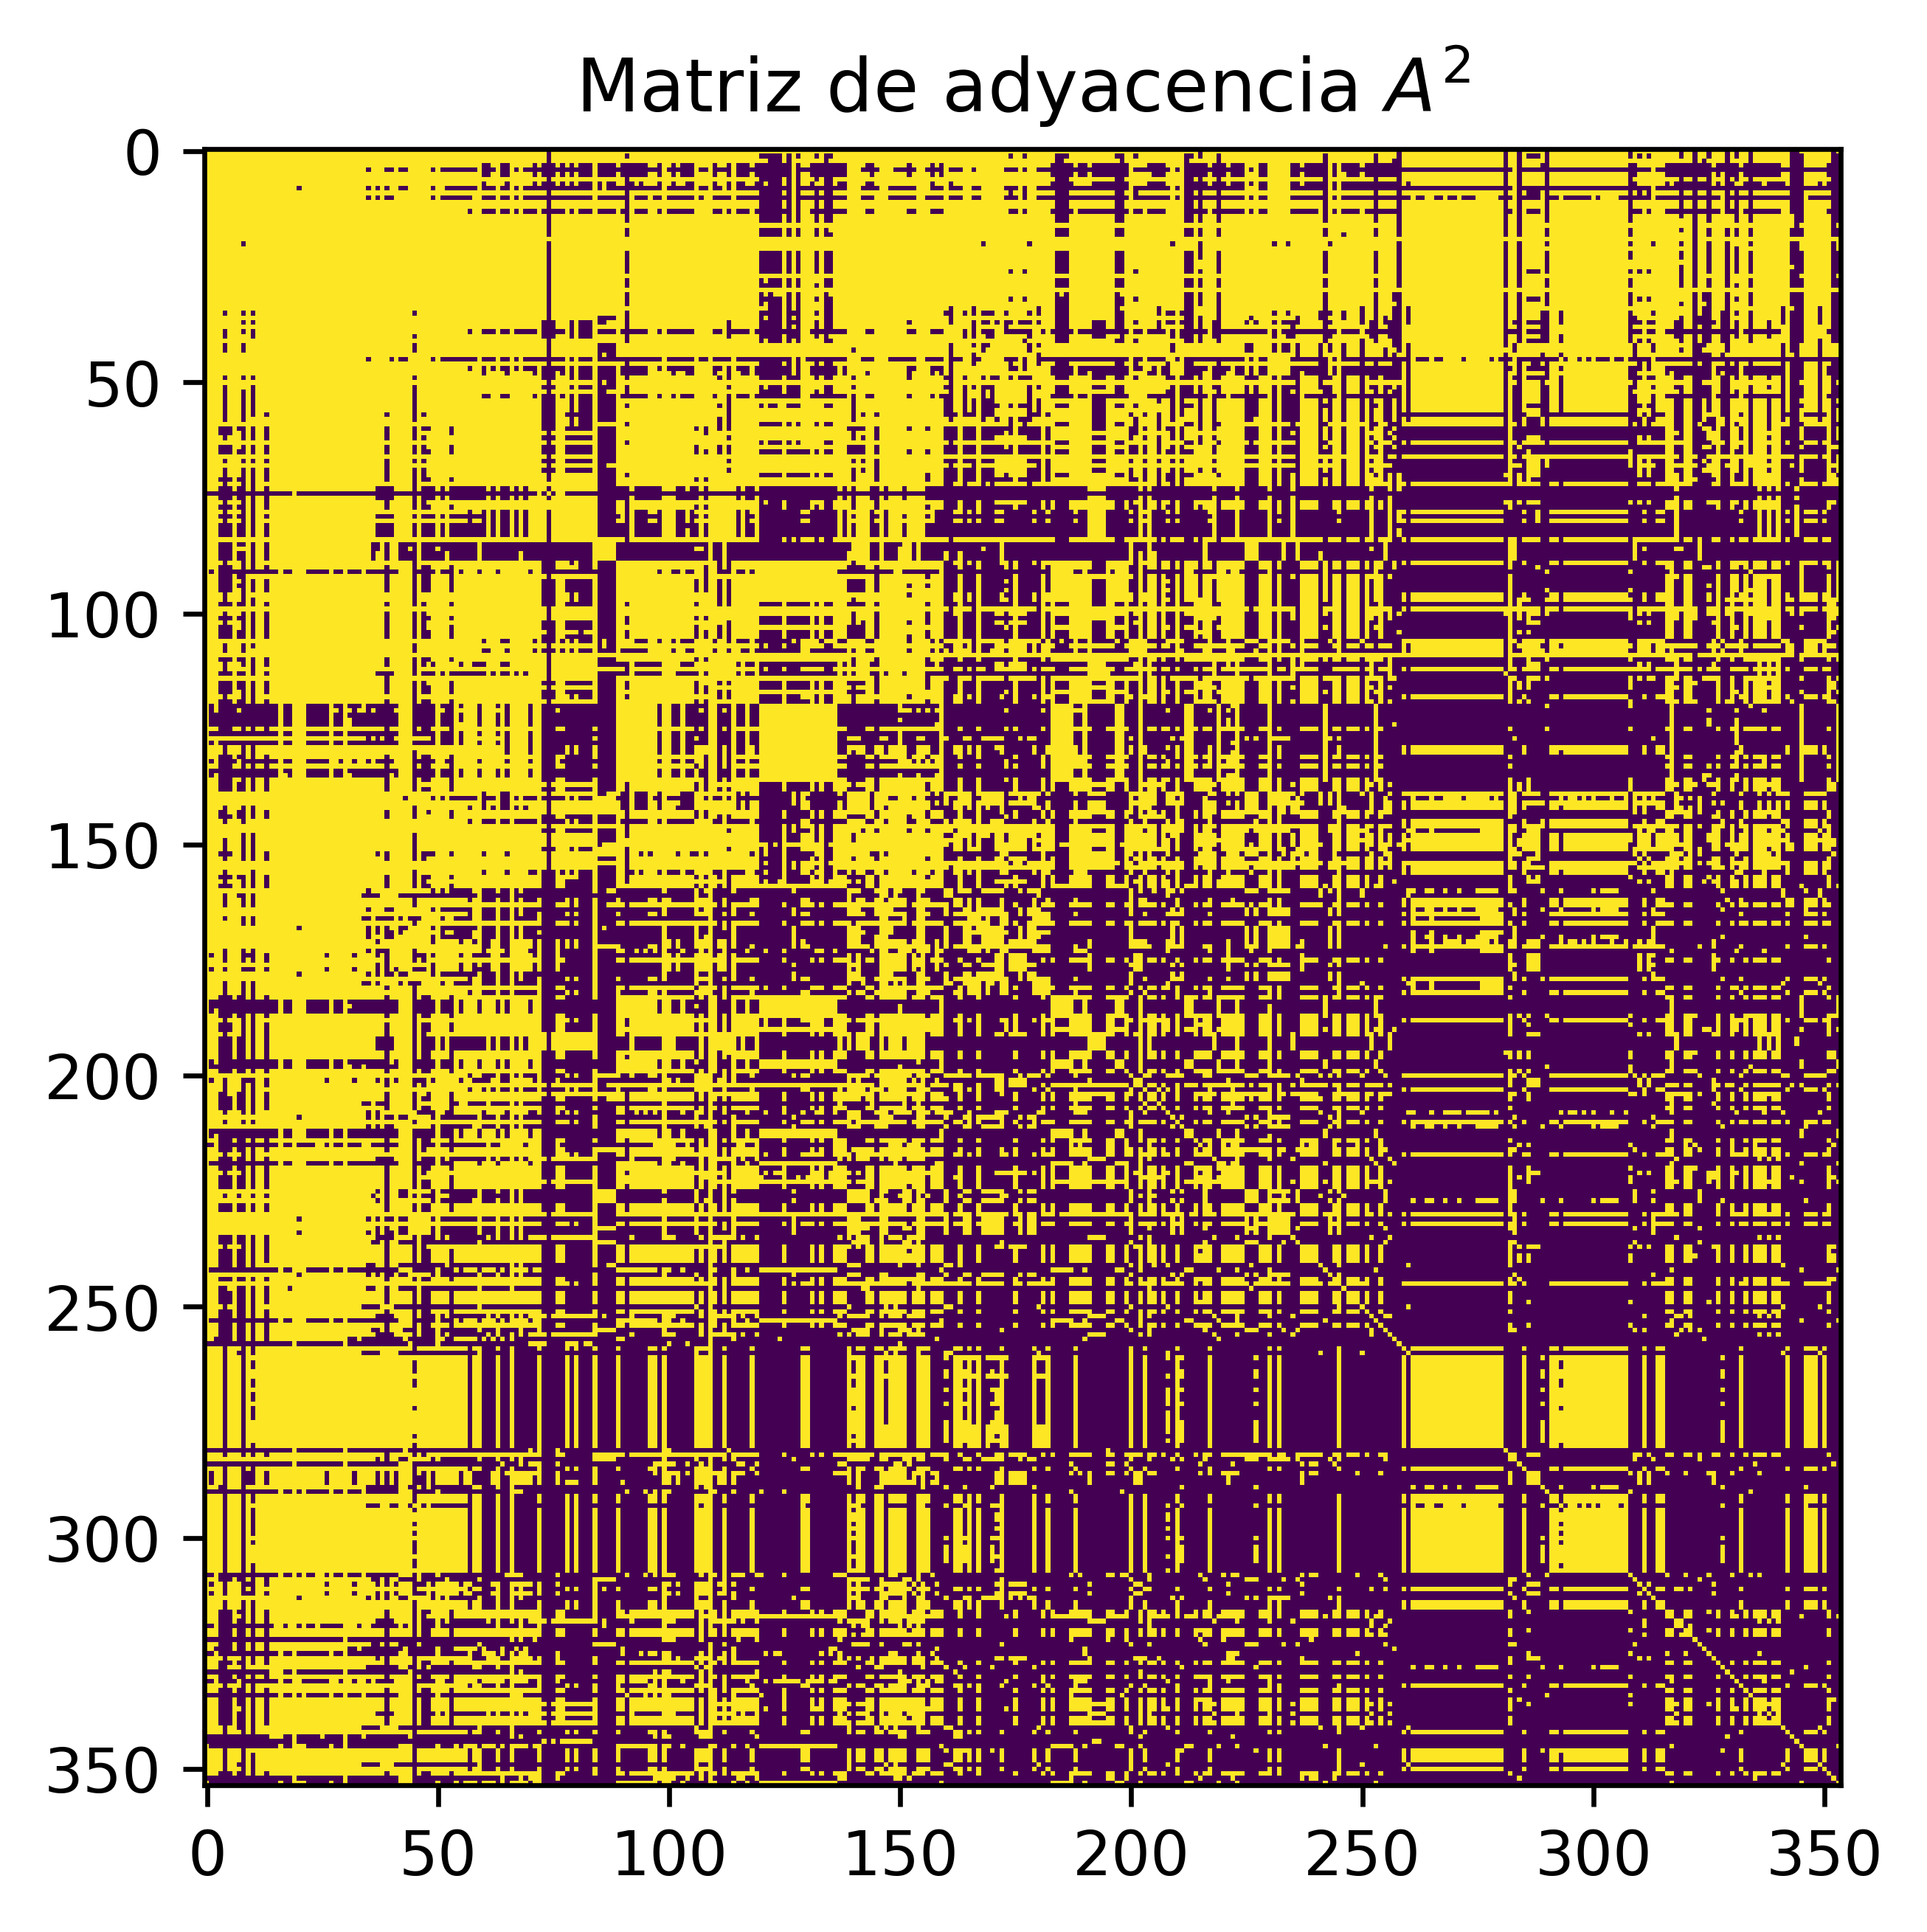

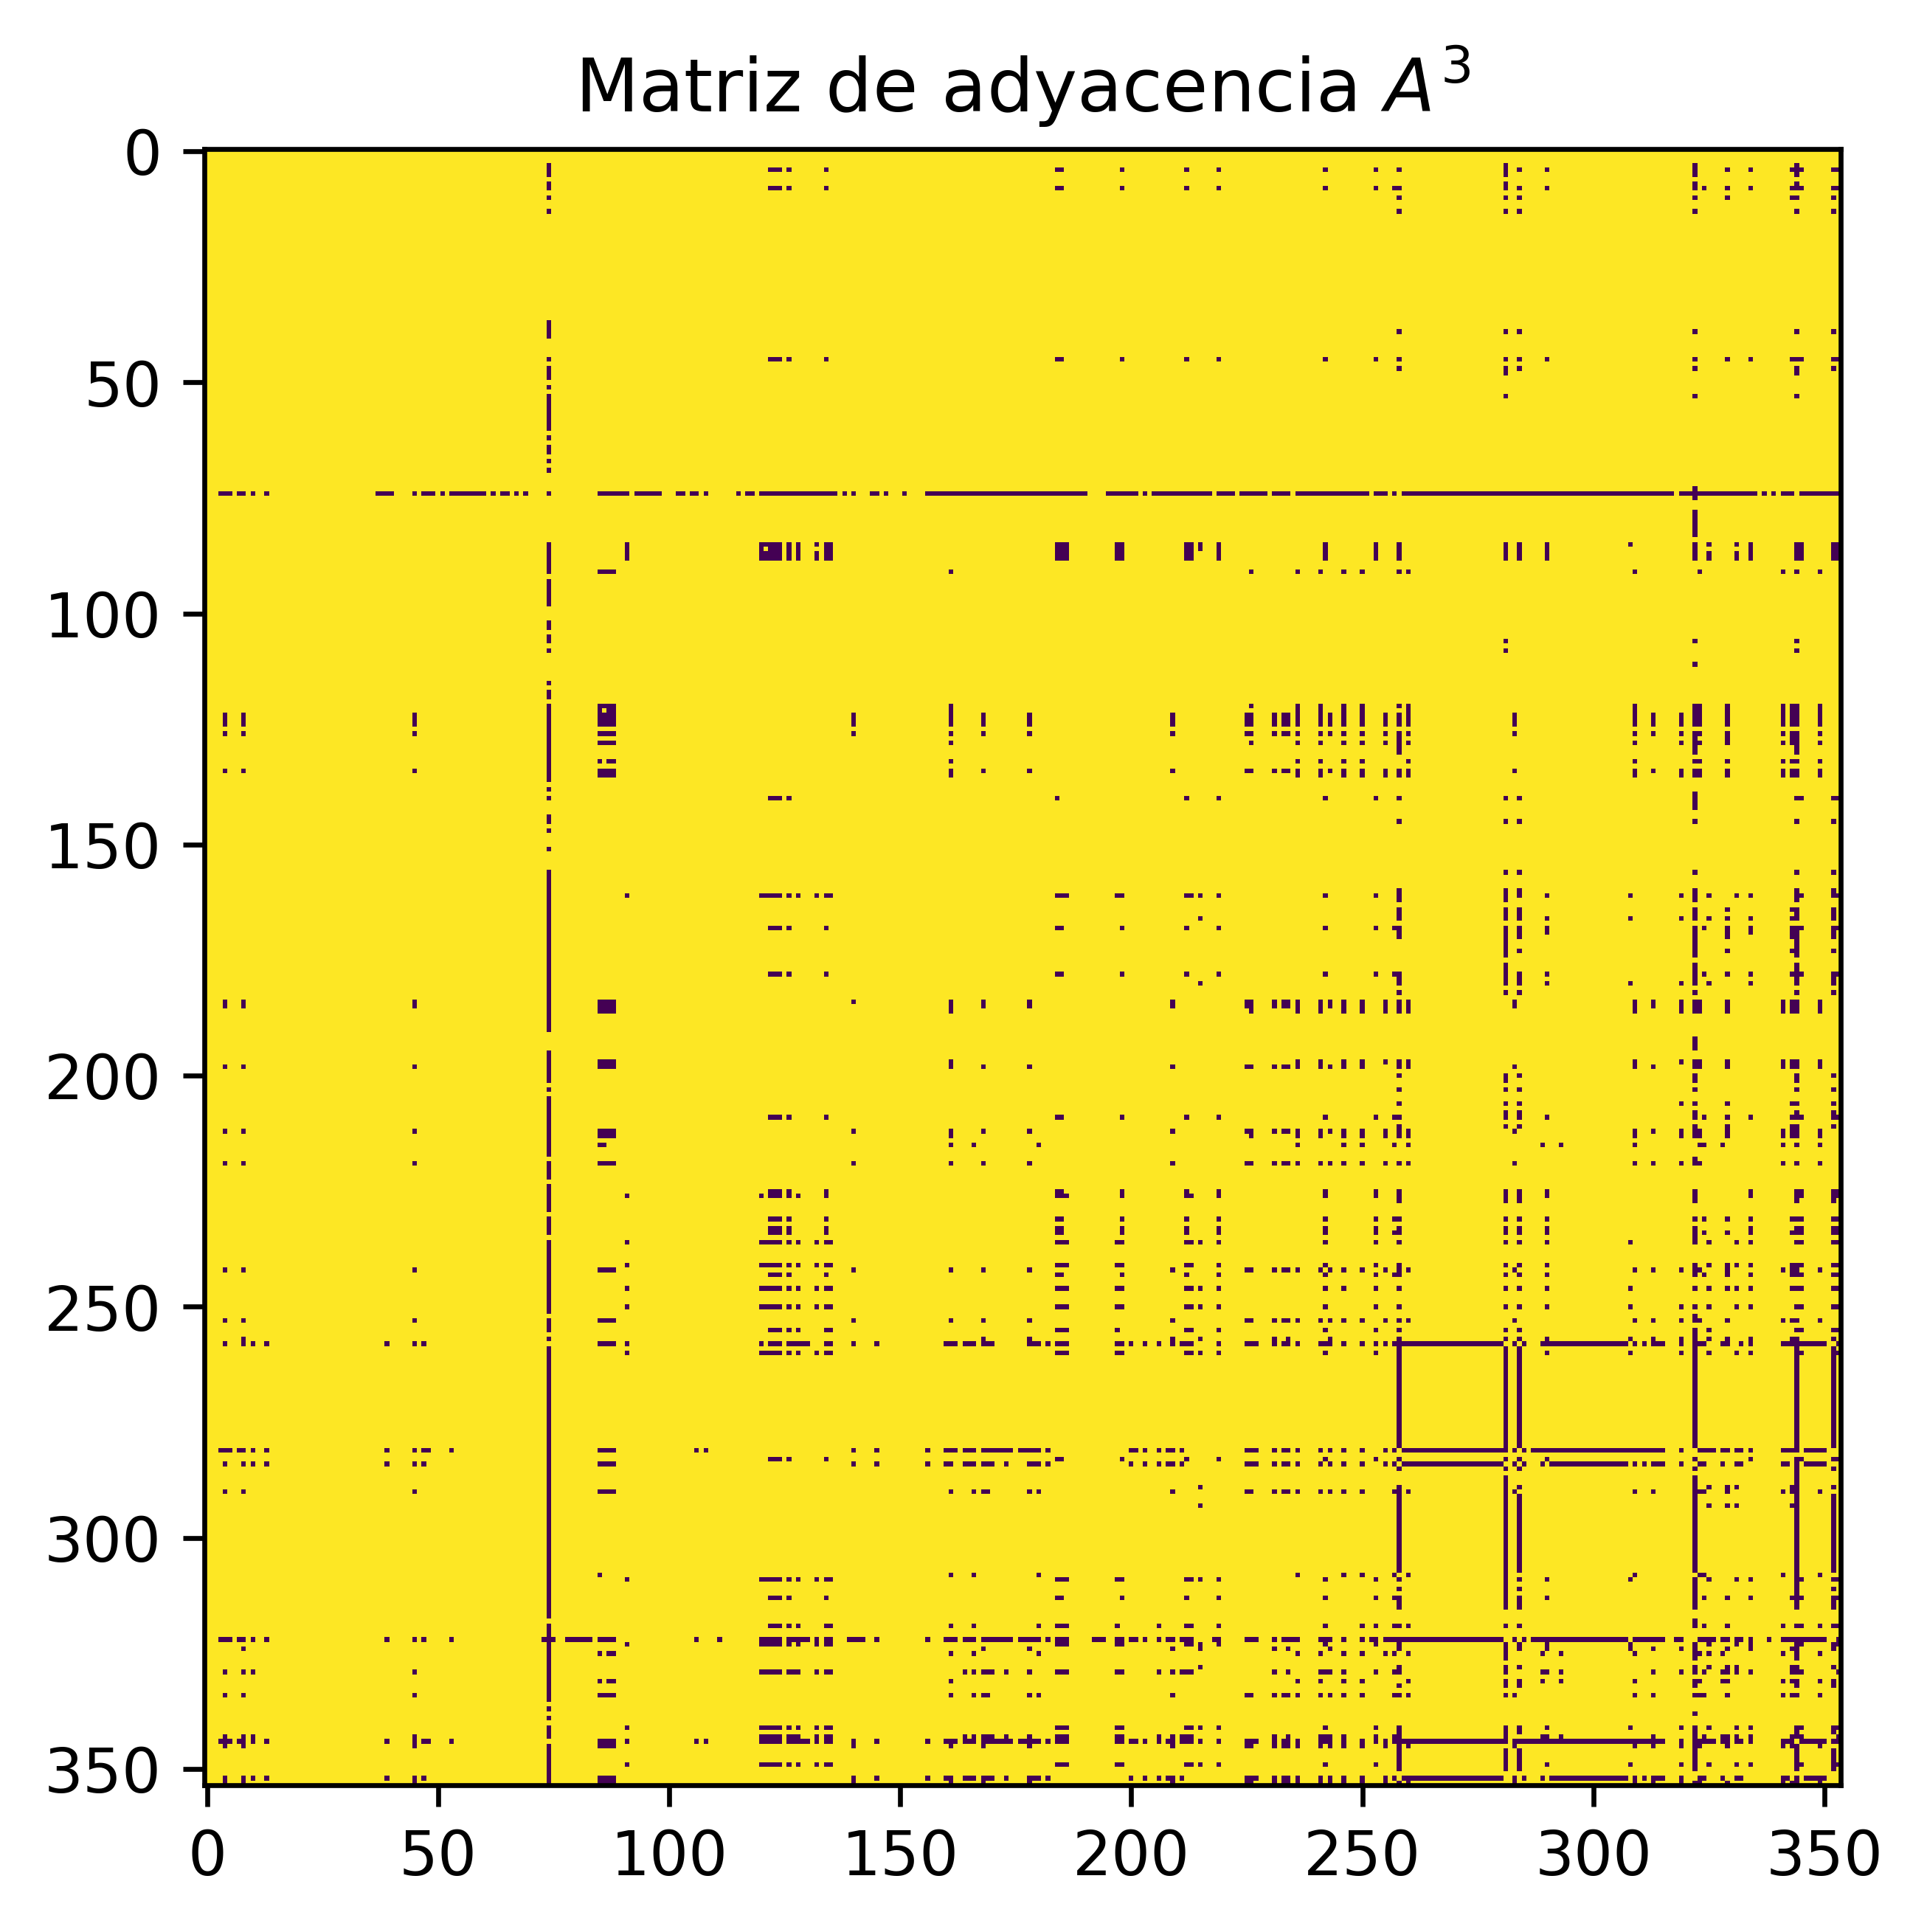

Text(0.5, 1.0, 'Matriz de adyacencia $A^4$')

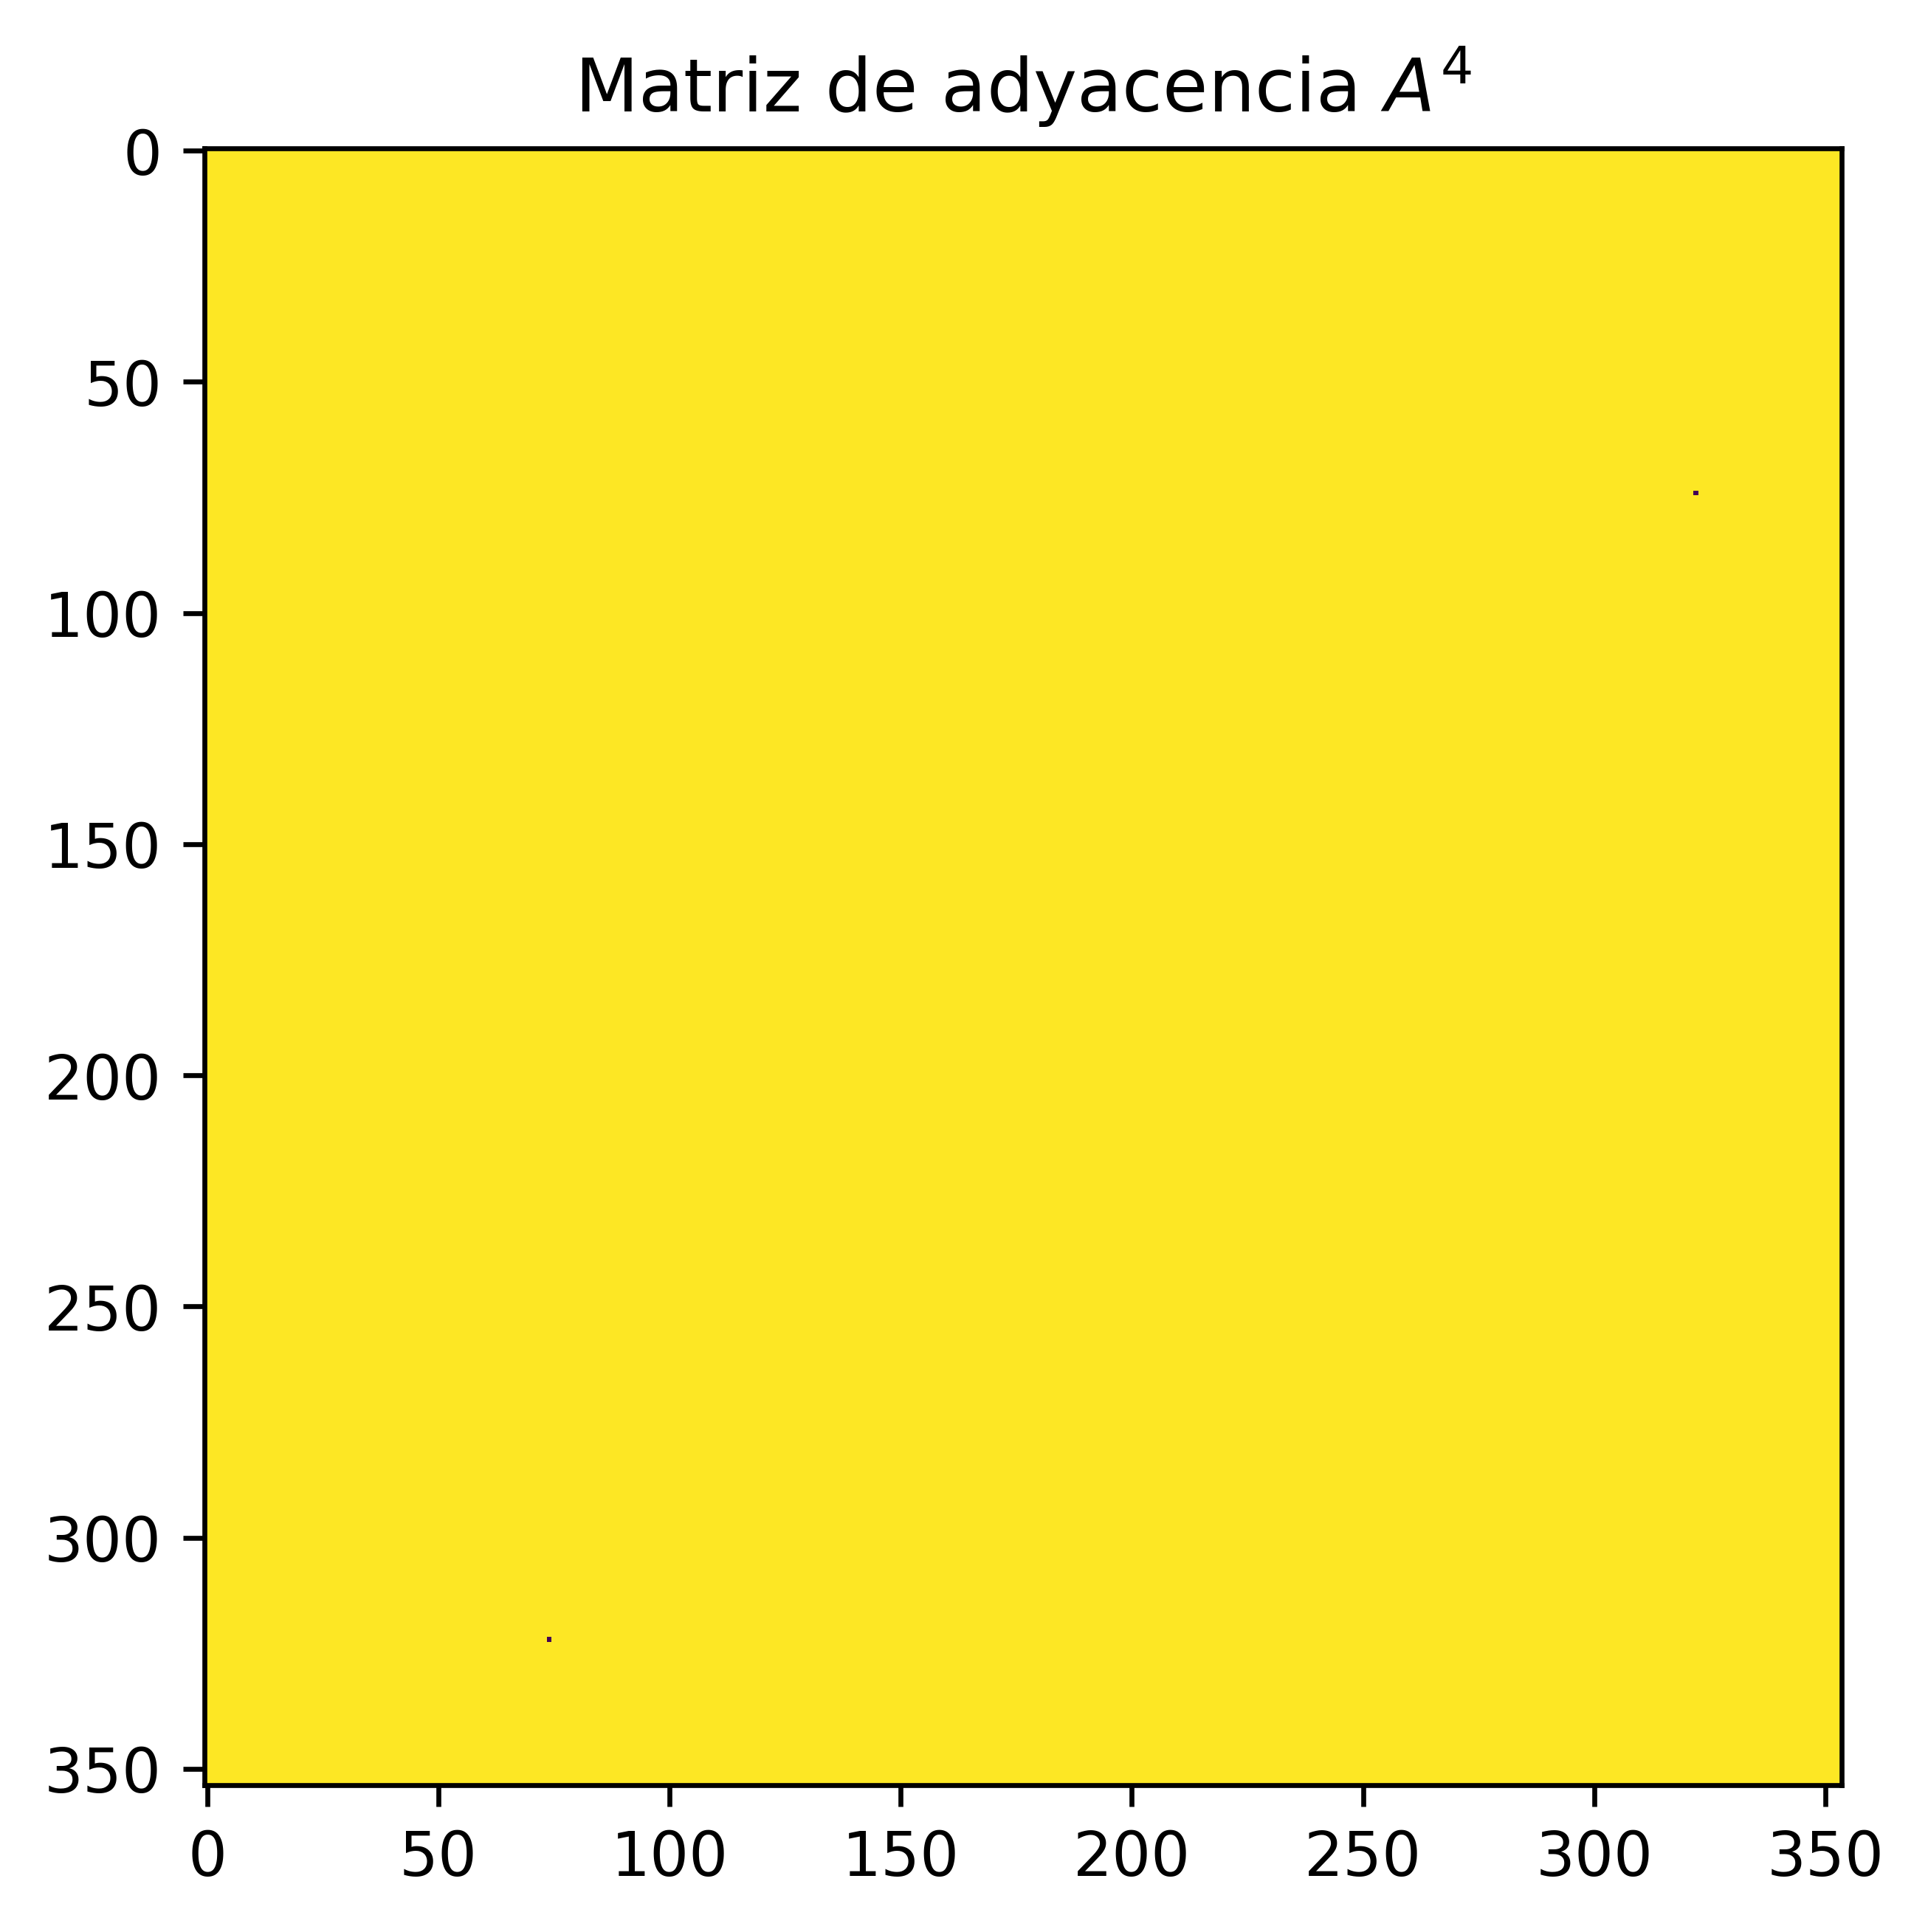

In [104]:
SP=nx.adjacency_matrix(G,weight=None).toarray()
plt.figure(dpi=600)
plt.imshow(SP)
plt.title("Matriz de adyacencia A")
plt.show()
plt.close()
SP2=np.matmul(SP,SP)
plt.figure(dpi=600)
plt.imshow(SP2,vmax=1)
plt.title(r"Matriz de adyacencia $A^2$")
plt.show()
plt.close()
SP3=np.matmul(SP2,SP)
plt.figure(dpi=600)
plt.imshow(SP3,vmax=1)
plt.title(r"Matriz de adyacencia $A^3$")
plt.show()
plt.close()
SP4=np.matmul(SP2,SP2)
plt.figure(dpi=600)
plt.imshow(SP4,vmax=1)
plt.title(r"Matriz de adyacencia $A^4$")

## Bonacich power centrality

In [58]:
# Get the adjacency matrix
A = nx.adjacency_matrix(G,weight=None)
adj = A.toarray()
centrality = np.dot(A,A).toarray()
print(centrality)
# Calculate the sum of the elements in each row of the power centrality matrix and store the result in a vector.
row_sum = np.sum(centrality, axis=1)
# normalize 
total_of_row = sum(row_sum)
row_sum_normalized = row_sum * 1/total_of_row

# print('Bonacich centrality sores are')
BC=[]
for index, el in enumerate(row_sum_normalized):
    #print(f'index - {index} is {el}')
    BC.append(el)


nx.set_node_attributes(G, BC, "Bonacich_centrality")
print(BC)

[[1 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0.01589561091340451, 0.007354685646500593, 0.020166073546856466, 0.0066429418742586, 0.00166073546856465, 0.004744958481613286, 0.0071174377224199285, 0.005931198102016607, 0.0007117437722419929, 0.006880189798339265, 0.0009489916963226571, 0.009015421115065243, 0.009489916963226572, 0.0026097271648873074, 0.01162514827995255, 0.01494661921708185, 0.034875444839857654, 0.01708185053380783, 0.010201660735468564, 0.023013048635824436, 0.009489916963226572, 0.01708185053380783, 0.0099644128113879, 0.008778173190984579, 0.011387900355871887, 0.009489916963226572, 0.006168446026097271, 0.013048635824436536, 0.009489916963226572, 0.007354685646500593, 0.03914590747330961, 0.009015421115065243, 0.0066429418742586, 0.00830367734282325, 0.008066429418742586, 0.0035587188612099642, 0.0045077105575326215, 0.00166073546856465, 0.0028469750889679717, 0.0014234875444839859, 0.0040

## Clustering

In [59]:
C=nx.clustering(G)
nx.set_node_attributes(G, C, "clustering")
print(C)

{'CLO': 0.2885780885780886, 'ADZ': 0.7526881720430108, 'EOH': 0.2033849684452094, 'UIB': 0.43304843304843305, 'ACD': 0.7619047619047619, 'APO': 0.5894736842105263, 'AXM': 0.8022988505747126, 'BSC': 0.391304347826087, 'CAQ': 0.6666666666666666, 'CZU': 0.7807881773399015, 'EBG': 0.6666666666666666, 'MTR': 0.6088193456614509, 'PEI': 0.5923076923076923, 'TLU': 0.8545454545454545, 'BAQ': 0.4122340425531915, 'BGA': 0.28397673188789, 'BOG': 0.08842701936702882, 'CTG': 0.22414486921529175, 'CUC': 0.5293466223698782, 'EYP': 0.17741228070175438, 'LET': 0.4898785425101215, 'MDE': 0.2209255533199195, 'SMR': 0.5284552845528455, 'VUP': 0.6546546546546547, 'EJA': 0.42109929078014185, 'IBE': 0.6126855600539811, 'MZL': 0.9323076923076923, 'NVA': 0.39622641509433965, 'PPN': 0.582995951417004, 'PSO': 0.821505376344086, 'VVC': 0.08581475385306, 'FLA': 0.55049786628734, 'RCH': 0.8121693121693122, 'TCO': 0.6991596638655462, 'AUC': 0.3390151515151515, 'PGT': 0.42857142857142855, 'PUU': 0.5906432748538012, 'T

## Clustering pesado


In [60]:
C1=nx.clustering(G,weight='weights')
nx.set_node_attributes(G, C1, "clustering_w")
print(C1)

{'CLO': 0.2885780885780886, 'ADZ': 0.7526881720430108, 'EOH': 0.2033849684452094, 'UIB': 0.43304843304843305, 'ACD': 0.7619047619047619, 'APO': 0.5894736842105263, 'AXM': 0.8022988505747126, 'BSC': 0.391304347826087, 'CAQ': 0.6666666666666666, 'CZU': 0.7807881773399015, 'EBG': 0.6666666666666666, 'MTR': 0.6088193456614509, 'PEI': 0.5923076923076923, 'TLU': 0.8545454545454545, 'BAQ': 0.4122340425531915, 'BGA': 0.28397673188789, 'BOG': 0.08842701936702882, 'CTG': 0.22414486921529175, 'CUC': 0.5293466223698782, 'EYP': 0.17741228070175438, 'LET': 0.4898785425101215, 'MDE': 0.2209255533199195, 'SMR': 0.5284552845528455, 'VUP': 0.6546546546546547, 'EJA': 0.42109929078014185, 'IBE': 0.6126855600539811, 'MZL': 0.9323076923076923, 'NVA': 0.39622641509433965, 'PPN': 0.582995951417004, 'PSO': 0.821505376344086, 'VVC': 0.08581475385306, 'FLA': 0.55049786628734, 'RCH': 0.8121693121693122, 'TCO': 0.6991596638655462, 'AUC': 0.3390151515151515, 'PGT': 0.42857142857142855, 'PUU': 0.5906432748538012, 'T

## Cumulative degree

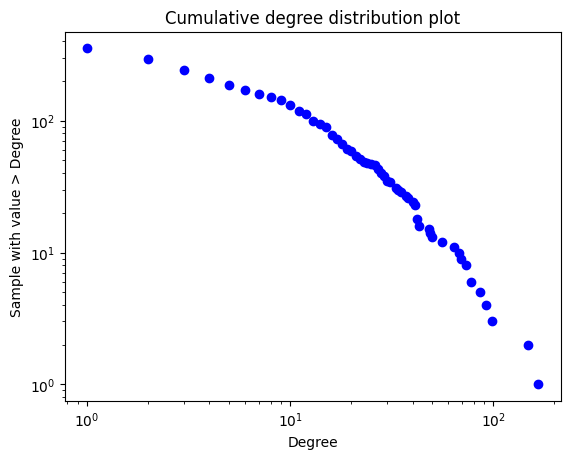

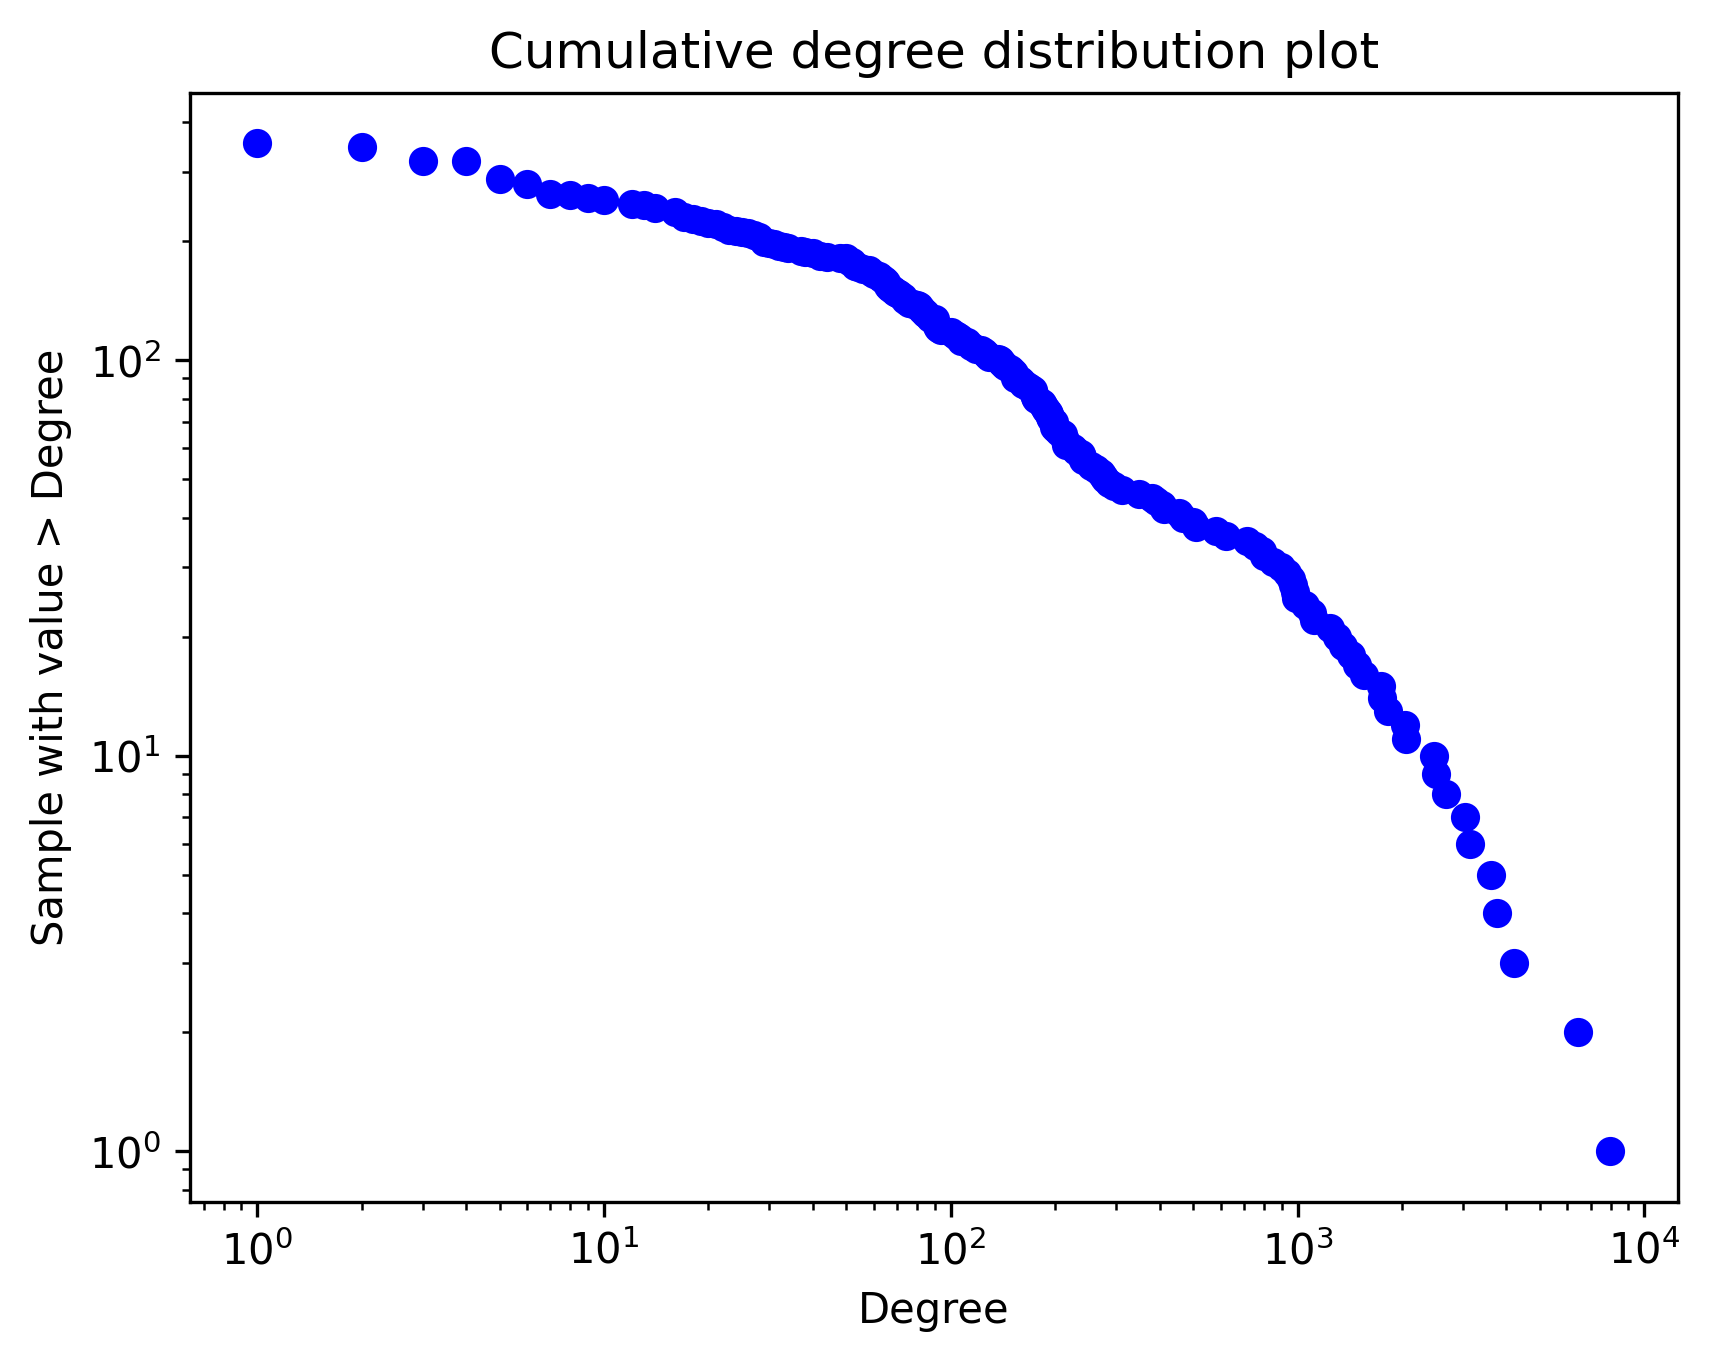

In [61]:
import collections
degree_sequence = sorted([d for n, d in G.degree(weight=None)], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.loglog(deg, cs, 'bo')
#plt.scatter(deg, cs)
plt.title("Cumulative degree distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")
plt.show()
plt.close()
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)

plt.figure(dpi=300)
plt.loglog(deg, cs,'bo')
#plt.scatter(deg, cs)
# plt.yscale('log')
# plt.xscale('log')
#plt.xlim(xmax=2000,xmin=-20)
plt.title("Cumulative degree distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")
plt.show()

# Medidas dirigido

## Medidas
1. Distribucion acumulada de grado contra grado UNDI YA
2. Distribucion acumulada pesada de grado contra peso YA
3. Fortaleza contra grado !!! YA
4. Coeficiente clustering contra grado YA
5. Coeficiente clustering pesado contra gradoYA


## Distribuciones de grado

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17504\1968071035.py:5: RuntimeWarning: divide by zero encountered in power
  plt.plot(range(len(data)),44.8*(np.arange(len(data))**(-0.804)),label=r"$44.8\cdot X^{-0.804}$")


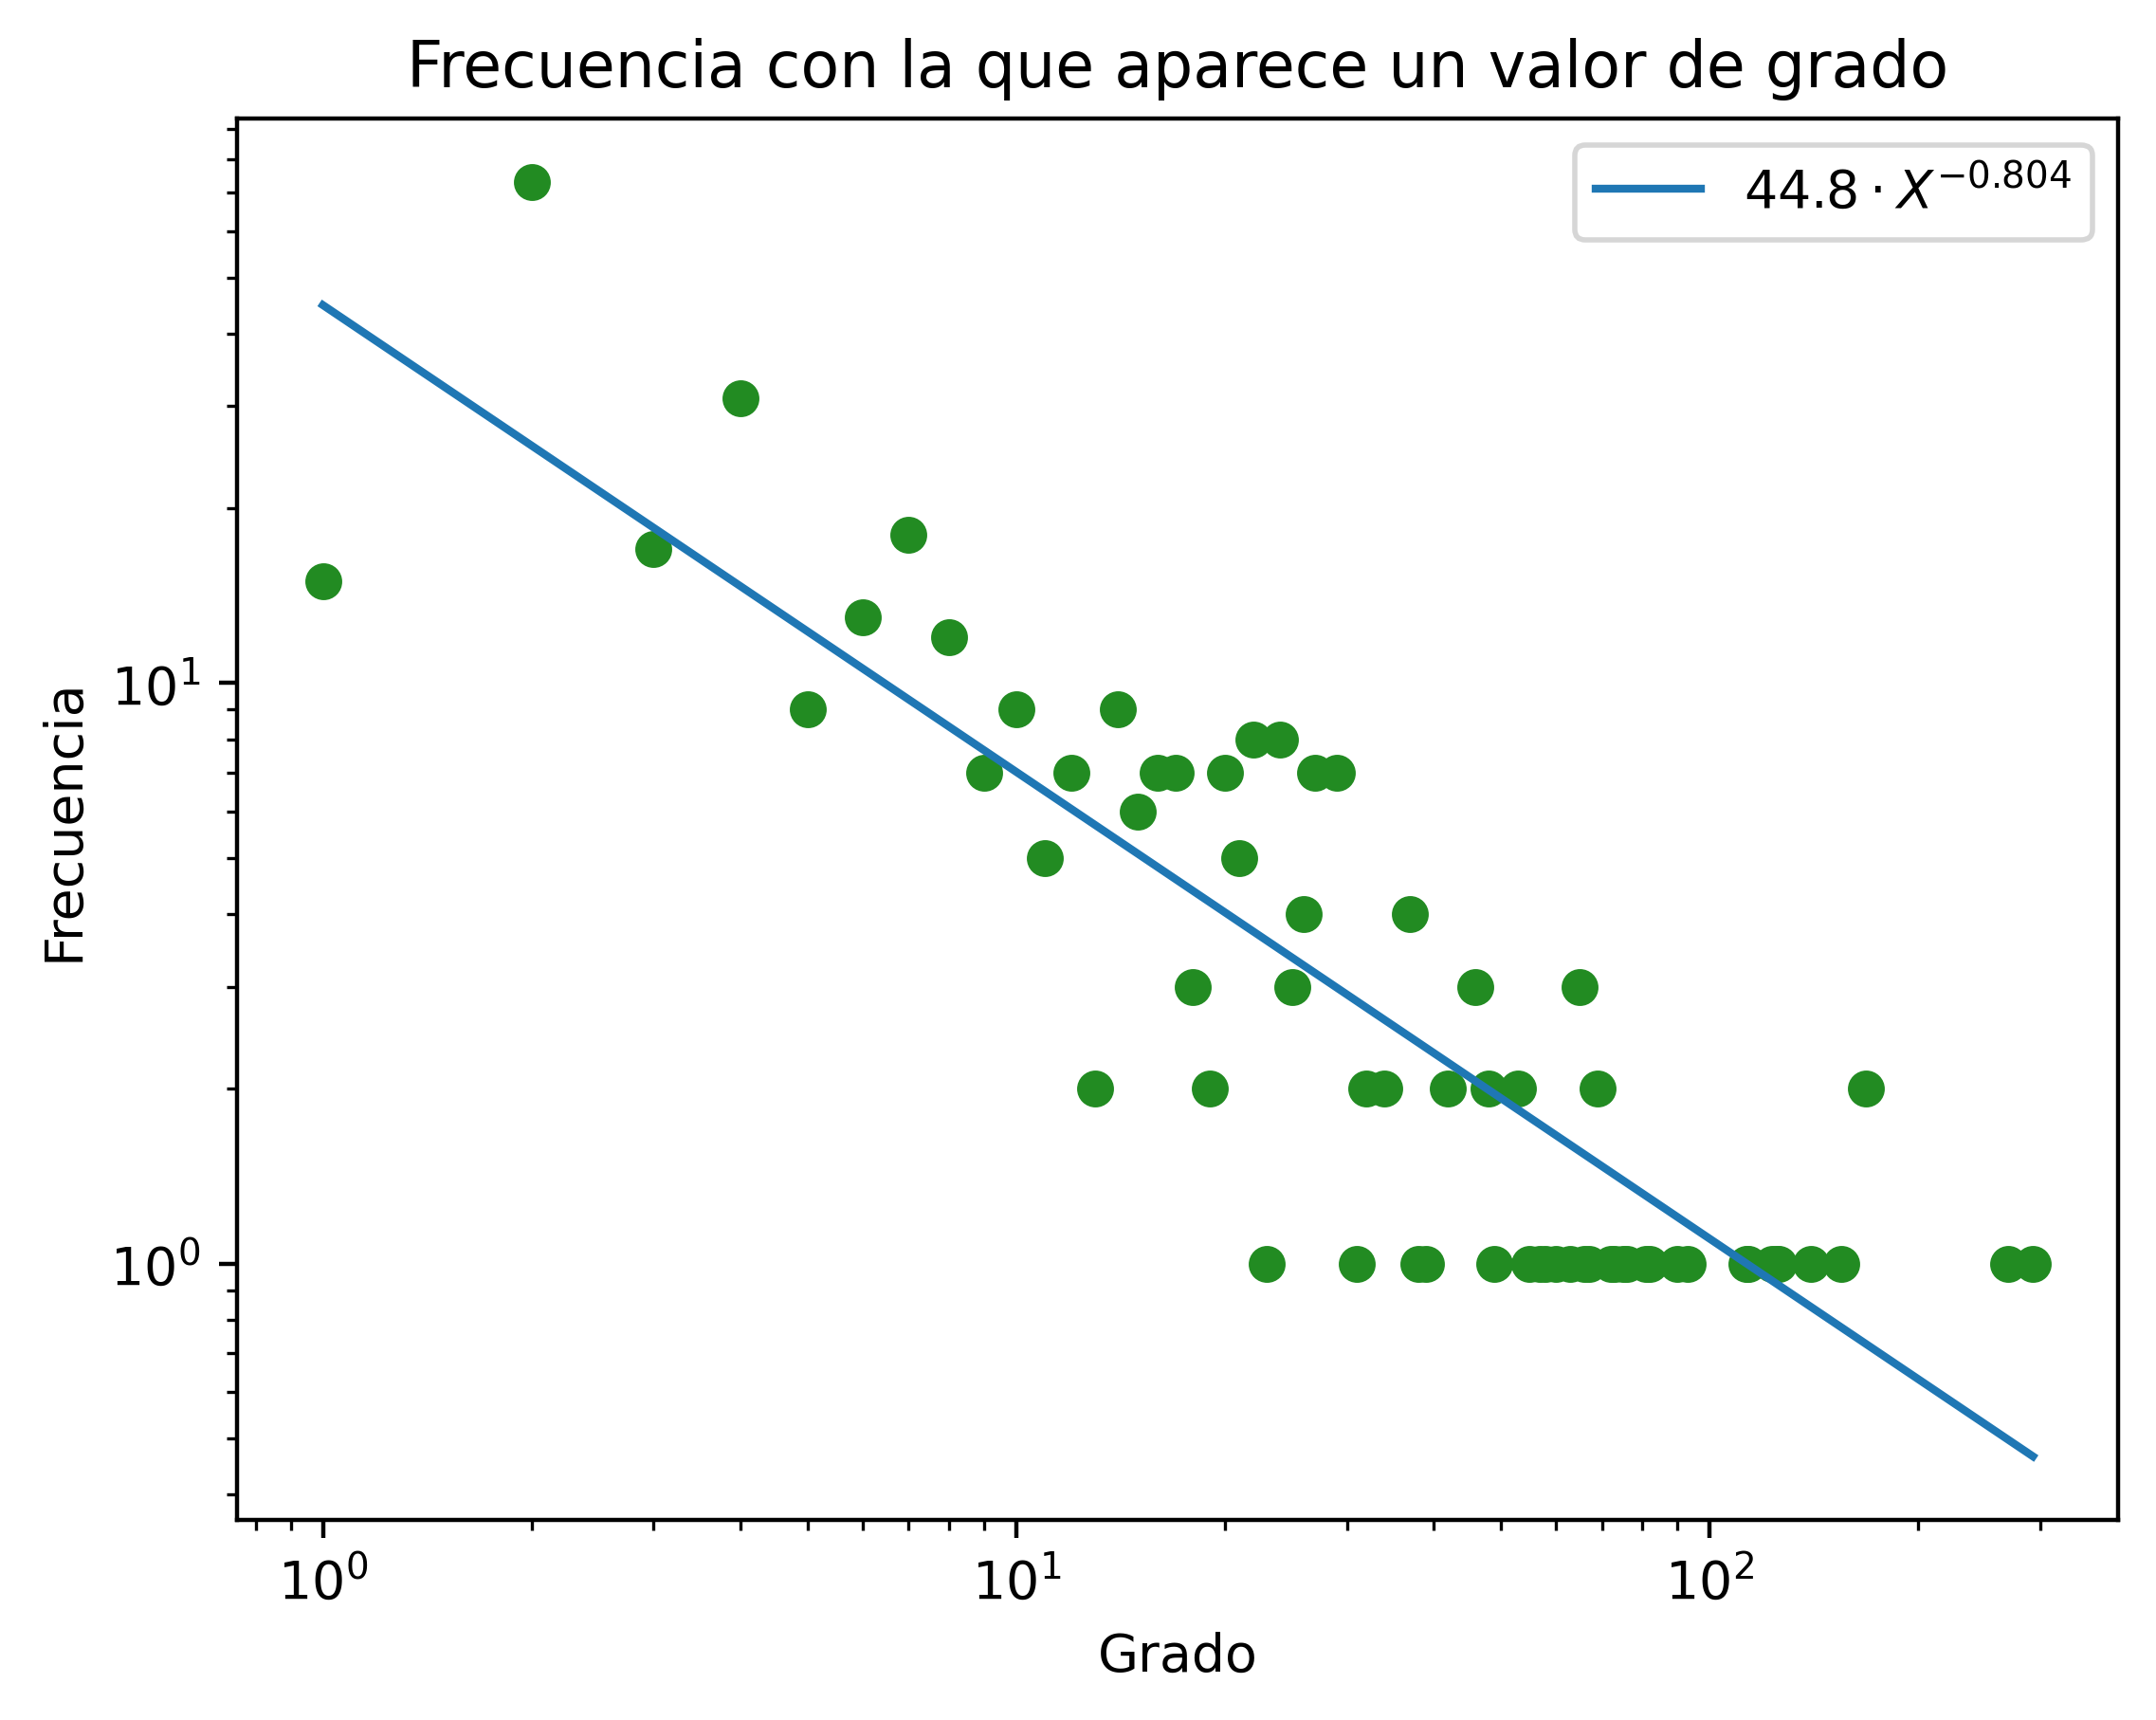

<Figure size 640x480 with 0 Axes>

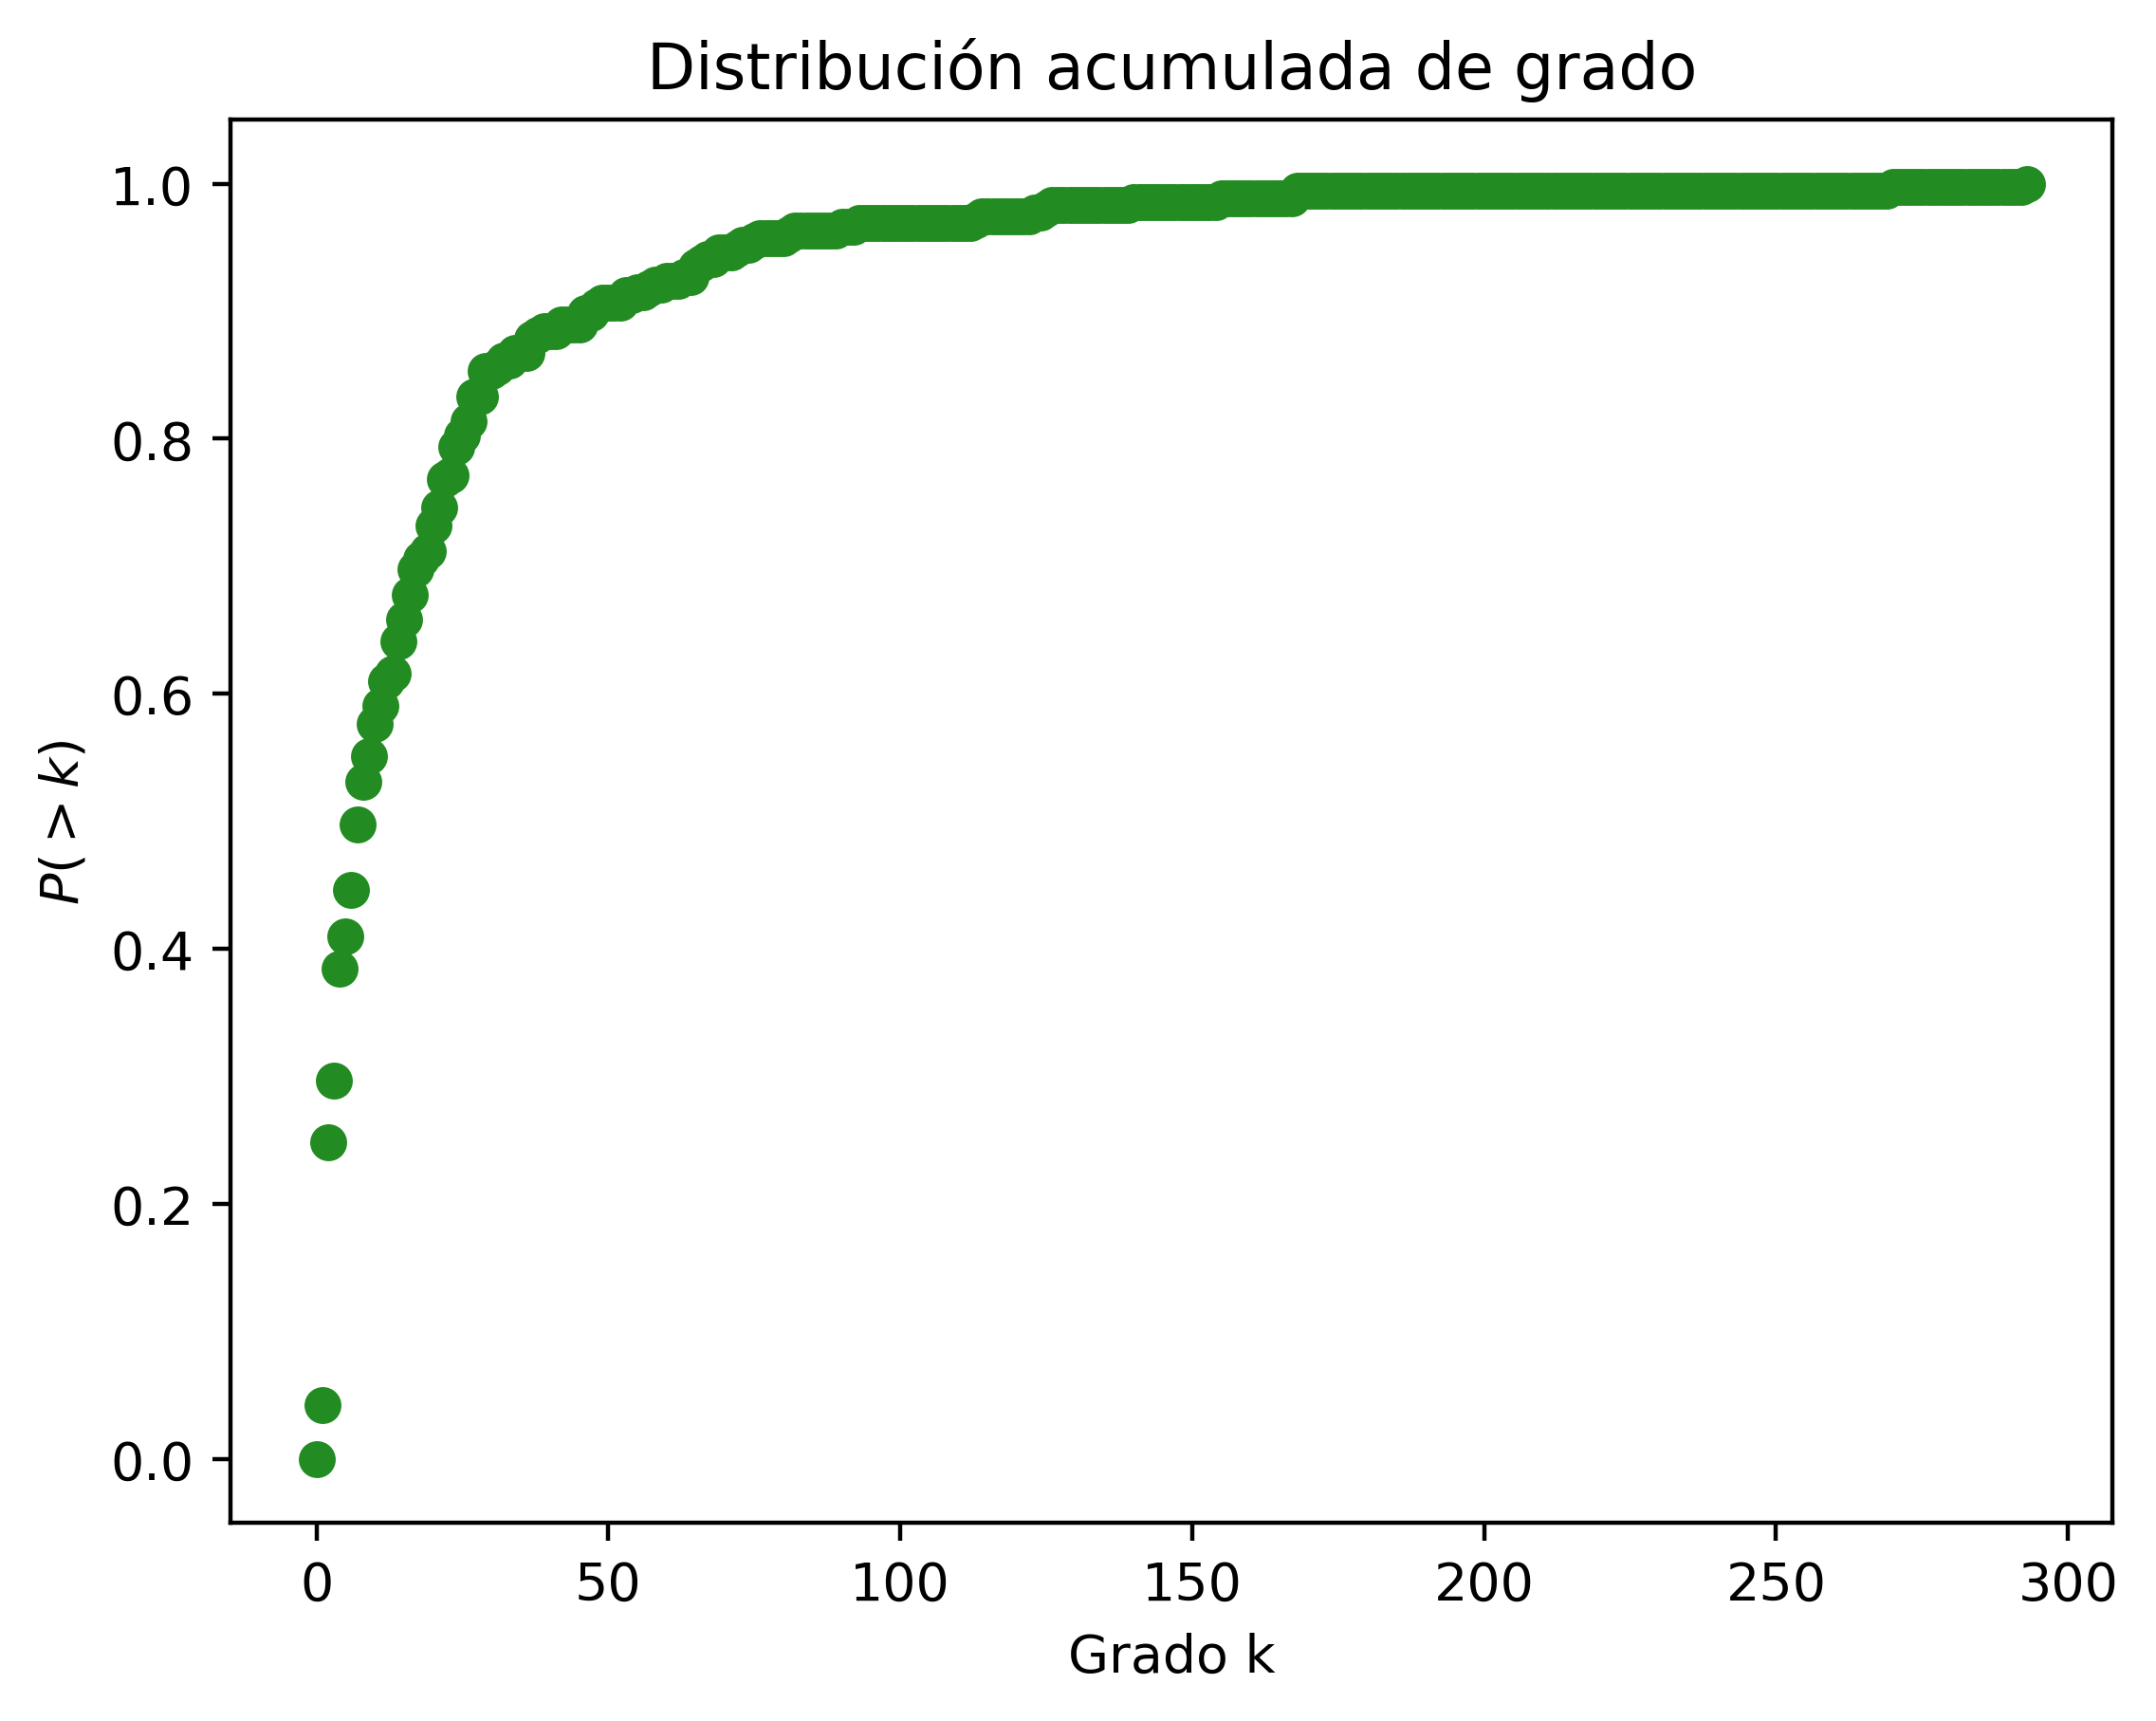

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17504\1968071035.py:38: RuntimeWarning: divide by zero encountered in power
  plt.plot(range(len(data)),218.73*(np.arange(len(data))**(-1.22)),label=r"$218.73\cdot X^{-1.22}$",color='b')


<Figure size 640x480 with 0 Axes>

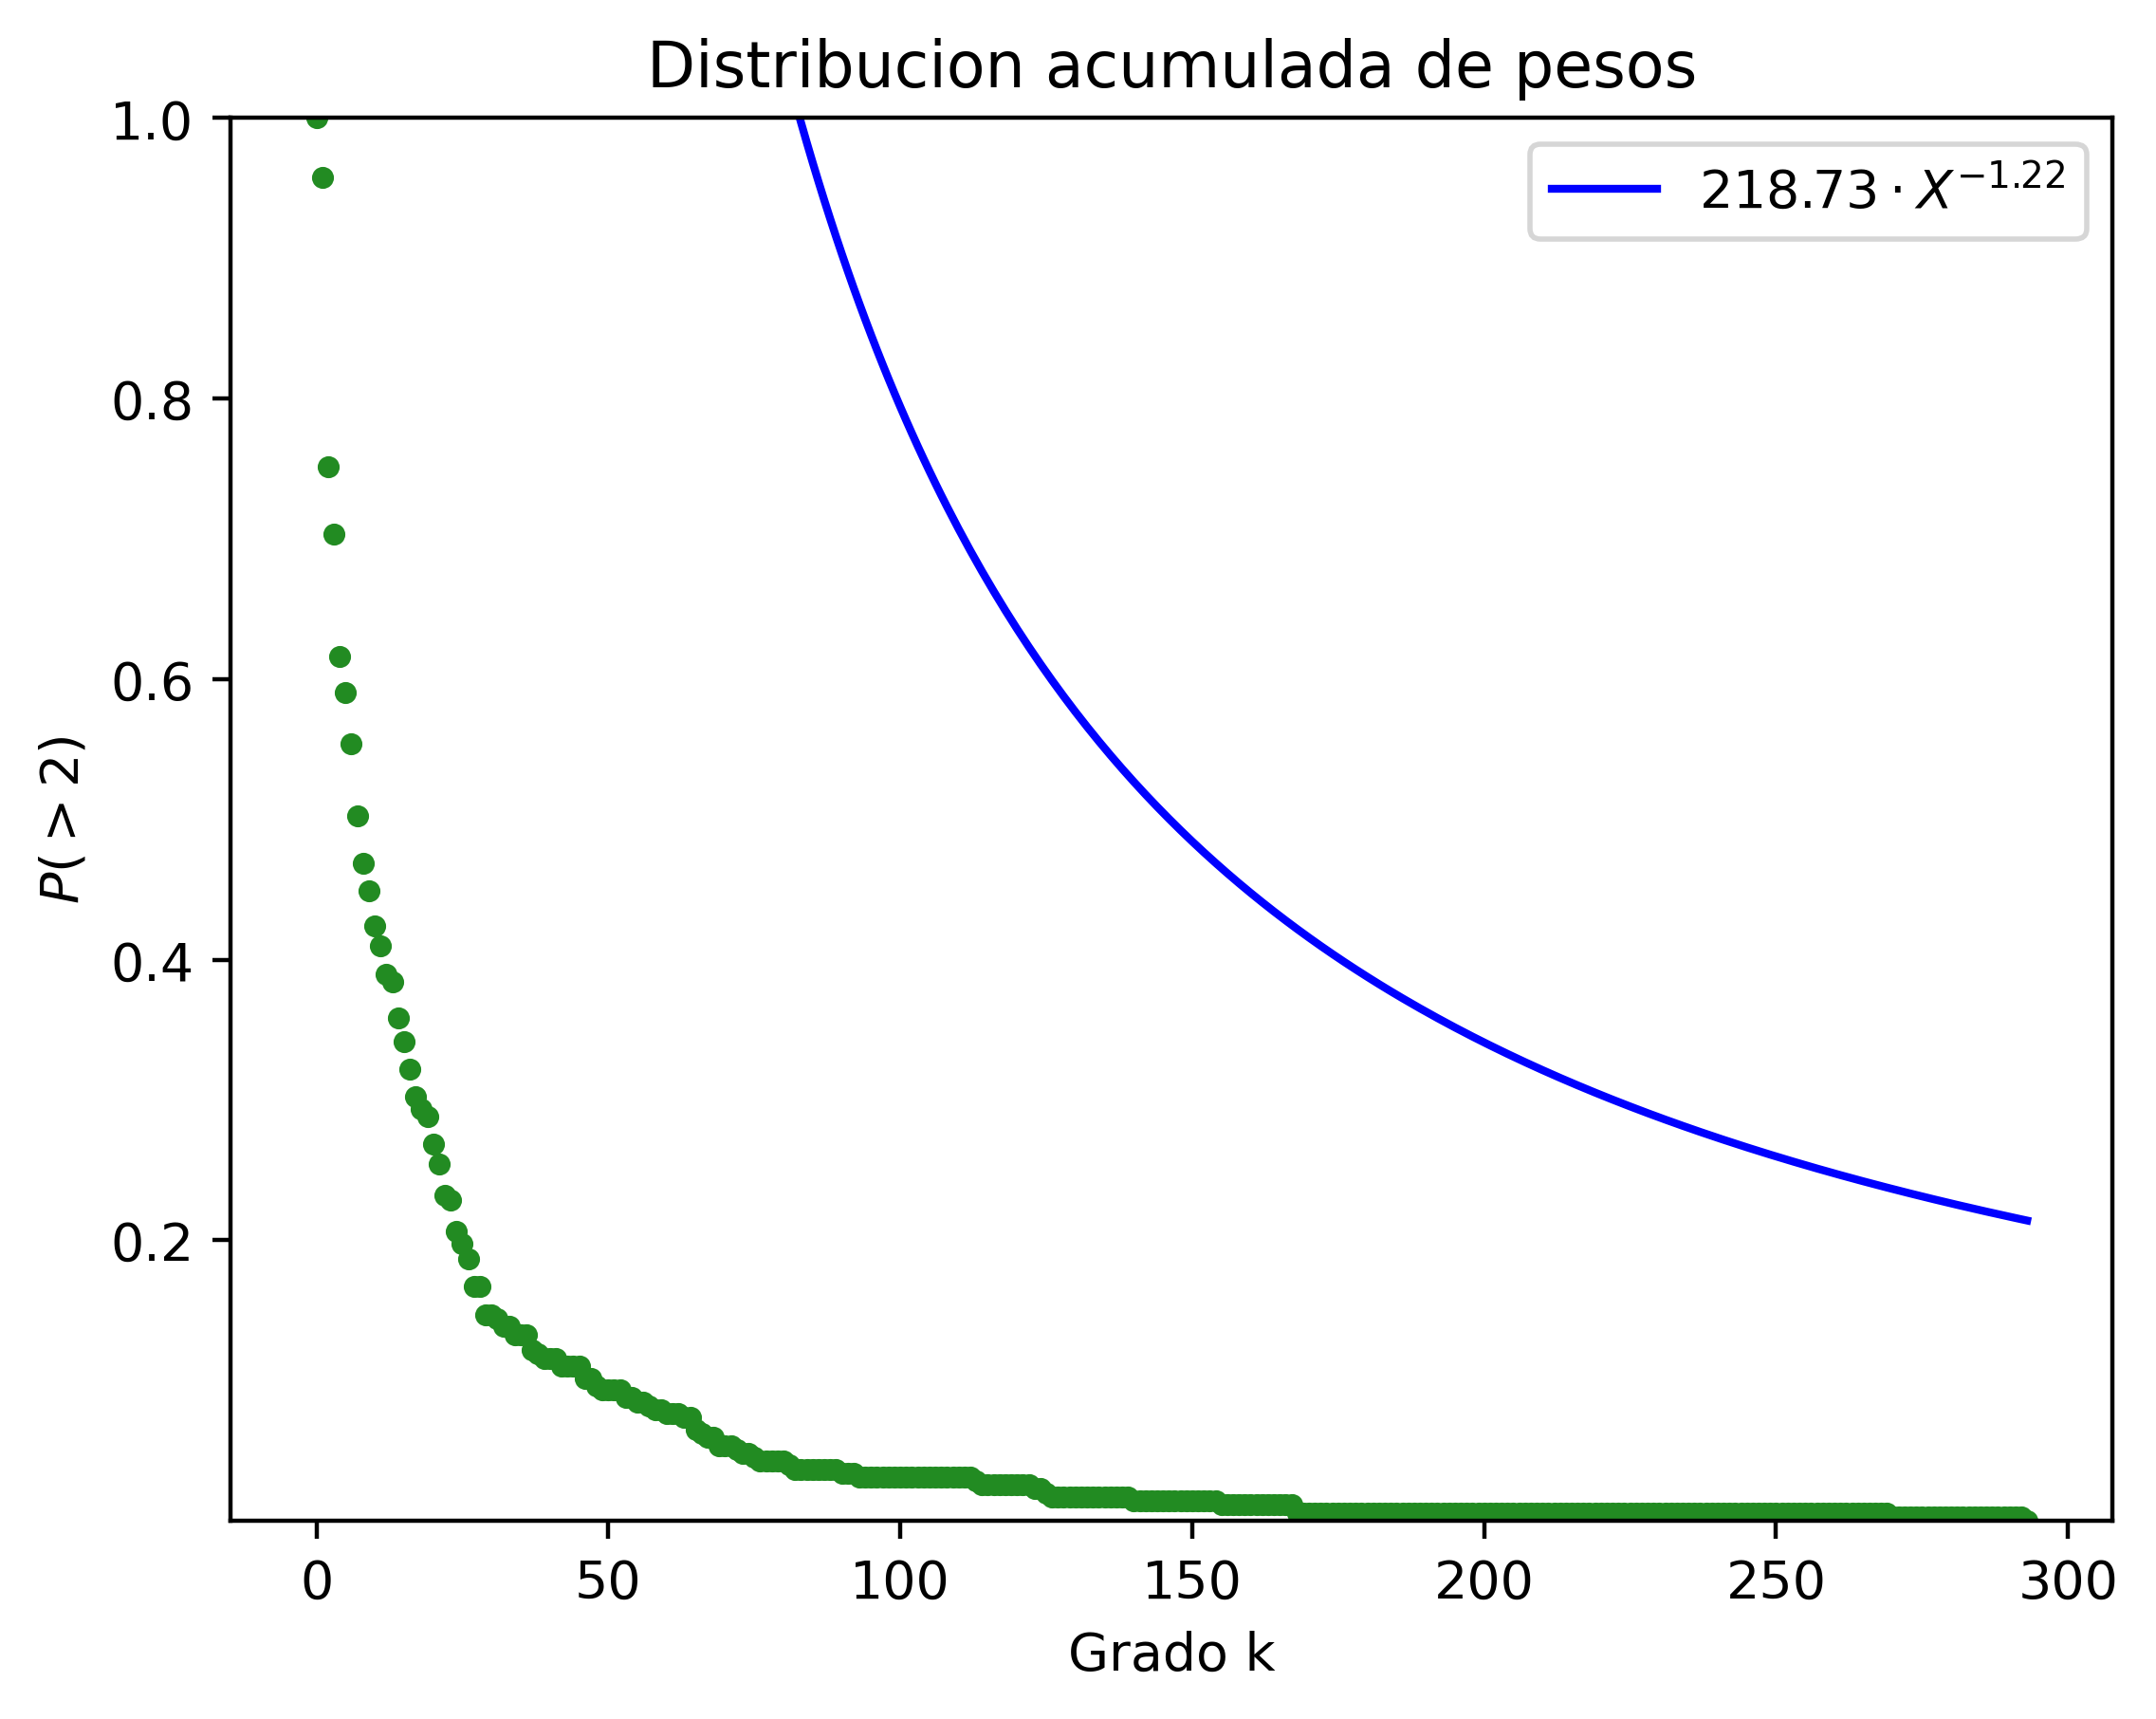

Counter({2: 73, 4: 31, 7: 18, 3: 17, 1: 15, 6: 13, 8: 12, 14: 9, 10: 9, 5: 9, 24: 8, 22: 8, 29: 7, 27: 7, 20: 7, 17: 7, 16: 7, 12: 7, 9: 7, 15: 6, 21: 5, 11: 5, 37: 4, 26: 4, 65: 3, 46: 3, 25: 3, 18: 3, 168: 2, 69: 2, 53: 2, 48: 2, 42: 2, 34: 2, 32: 2, 19: 2, 13: 2, 293: 1, 270: 1, 155: 1, 140: 1, 126: 1, 125: 1, 123: 1, 114: 1, 113: 1, 93: 1, 90: 1, 82: 1, 81: 1, 76: 1, 75: 1, 73: 1, 72: 1, 67: 1, 66: 1, 63: 1, 60: 1, 58: 1, 57: 1, 55: 1, 49: 1, 39: 1, 38: 1, 31: 1, 23: 1})


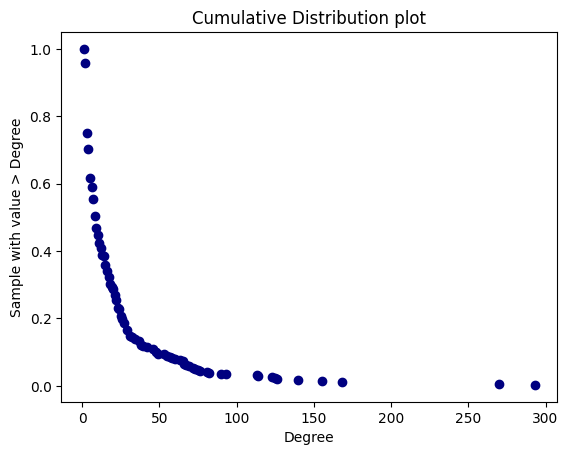

In [99]:
def plot(data,degreetype,color_r,what):
    """ Plot Distribution """
    plt.figure(dpi=400)
    plt.scatter(range(len(data)),data,color=color_r)
    plt.plot(range(len(data)),44.8*(np.arange(len(data))**(-0.804)),label=r"$44.8\cdot X^{-0.804}$")
    
    np.savetxt(f"{what}.csv", np.array((range(len(data)),data)).T, delimiter=",")
    #plt.xlim(xmin=1)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Frecuencia')
    plt.xlabel('Grado')
    plt.title("Frecuencia con la que aparece un valor de grado")
    plt.legend()
    plt.show()
    plt.clf()

    """ Plot CDF """
    plt.figure(dpi=400)
    s = float(data.sum())
    cdf = data.cumsum(0)/s
    
    plt.scatter(range(len(cdf)),cdf,color=color_r)
    # plt.xscale('log')
    # plt.yscale('log')
    #plt.ylim([0,1])
    plt.title("Distribución acumulada de grado")
    plt.ylabel('$P(>k)$')
    plt.xlabel('Grado k')
    plt.show()
    plt.clf()

    """ Plot CCDF """
    plt.figure(dpi=400)
    ccdf = 1-cdf
    np.savetxt(f"{what}_CDF.csv", np.array((range(len(ccdf)),ccdf)).T, delimiter=",")
    plt.scatter(range(len(ccdf)),ccdf,color=color_r,s=10)
    plt.plot(range(len(data)),218.73*(np.arange(len(data))**(-1.22)),label=r"$218.73\cdot X^{-1.22}$",color='b')
    plt.title("Distribucion acumulada de pesos")
    # plt.xscale('log')
    # plt.yscale('log')
    plt.ylim([0.00000001,1])
    plt.ylim(ymax=1)
    plt.ylabel('$P(>2)$')
    plt.xlabel('Grado k')
    plt.legend()
    plt.show()
    plt.clf()

edgelist_file = "./2019_undi.edgelist"
nodos=GD.nodes()
N=list(nodos)
ind_dict=GD.degree(nodos,weight=None)

degree=[]

for i in range(len(N)):
    degree.append(ind_dict[N[i]])
    

degree_distribution = np.bincount(np.array(degree))

plot(degree_distribution, edgelist_file, 'forestgreen',"Cumulative_degree_dist")

degree_sequence = sorted([d for n, d in GD.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print(degreeCount)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.scatter(deg, cs/np.max(cs),color='navy')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17504\1968071035.py:5: RuntimeWarning: divide by zero encountered in power
  plt.plot(range(len(data)),44.8*(np.arange(len(data))**(-0.804)),label=r"$44.8\cdot X^{-0.804}$")


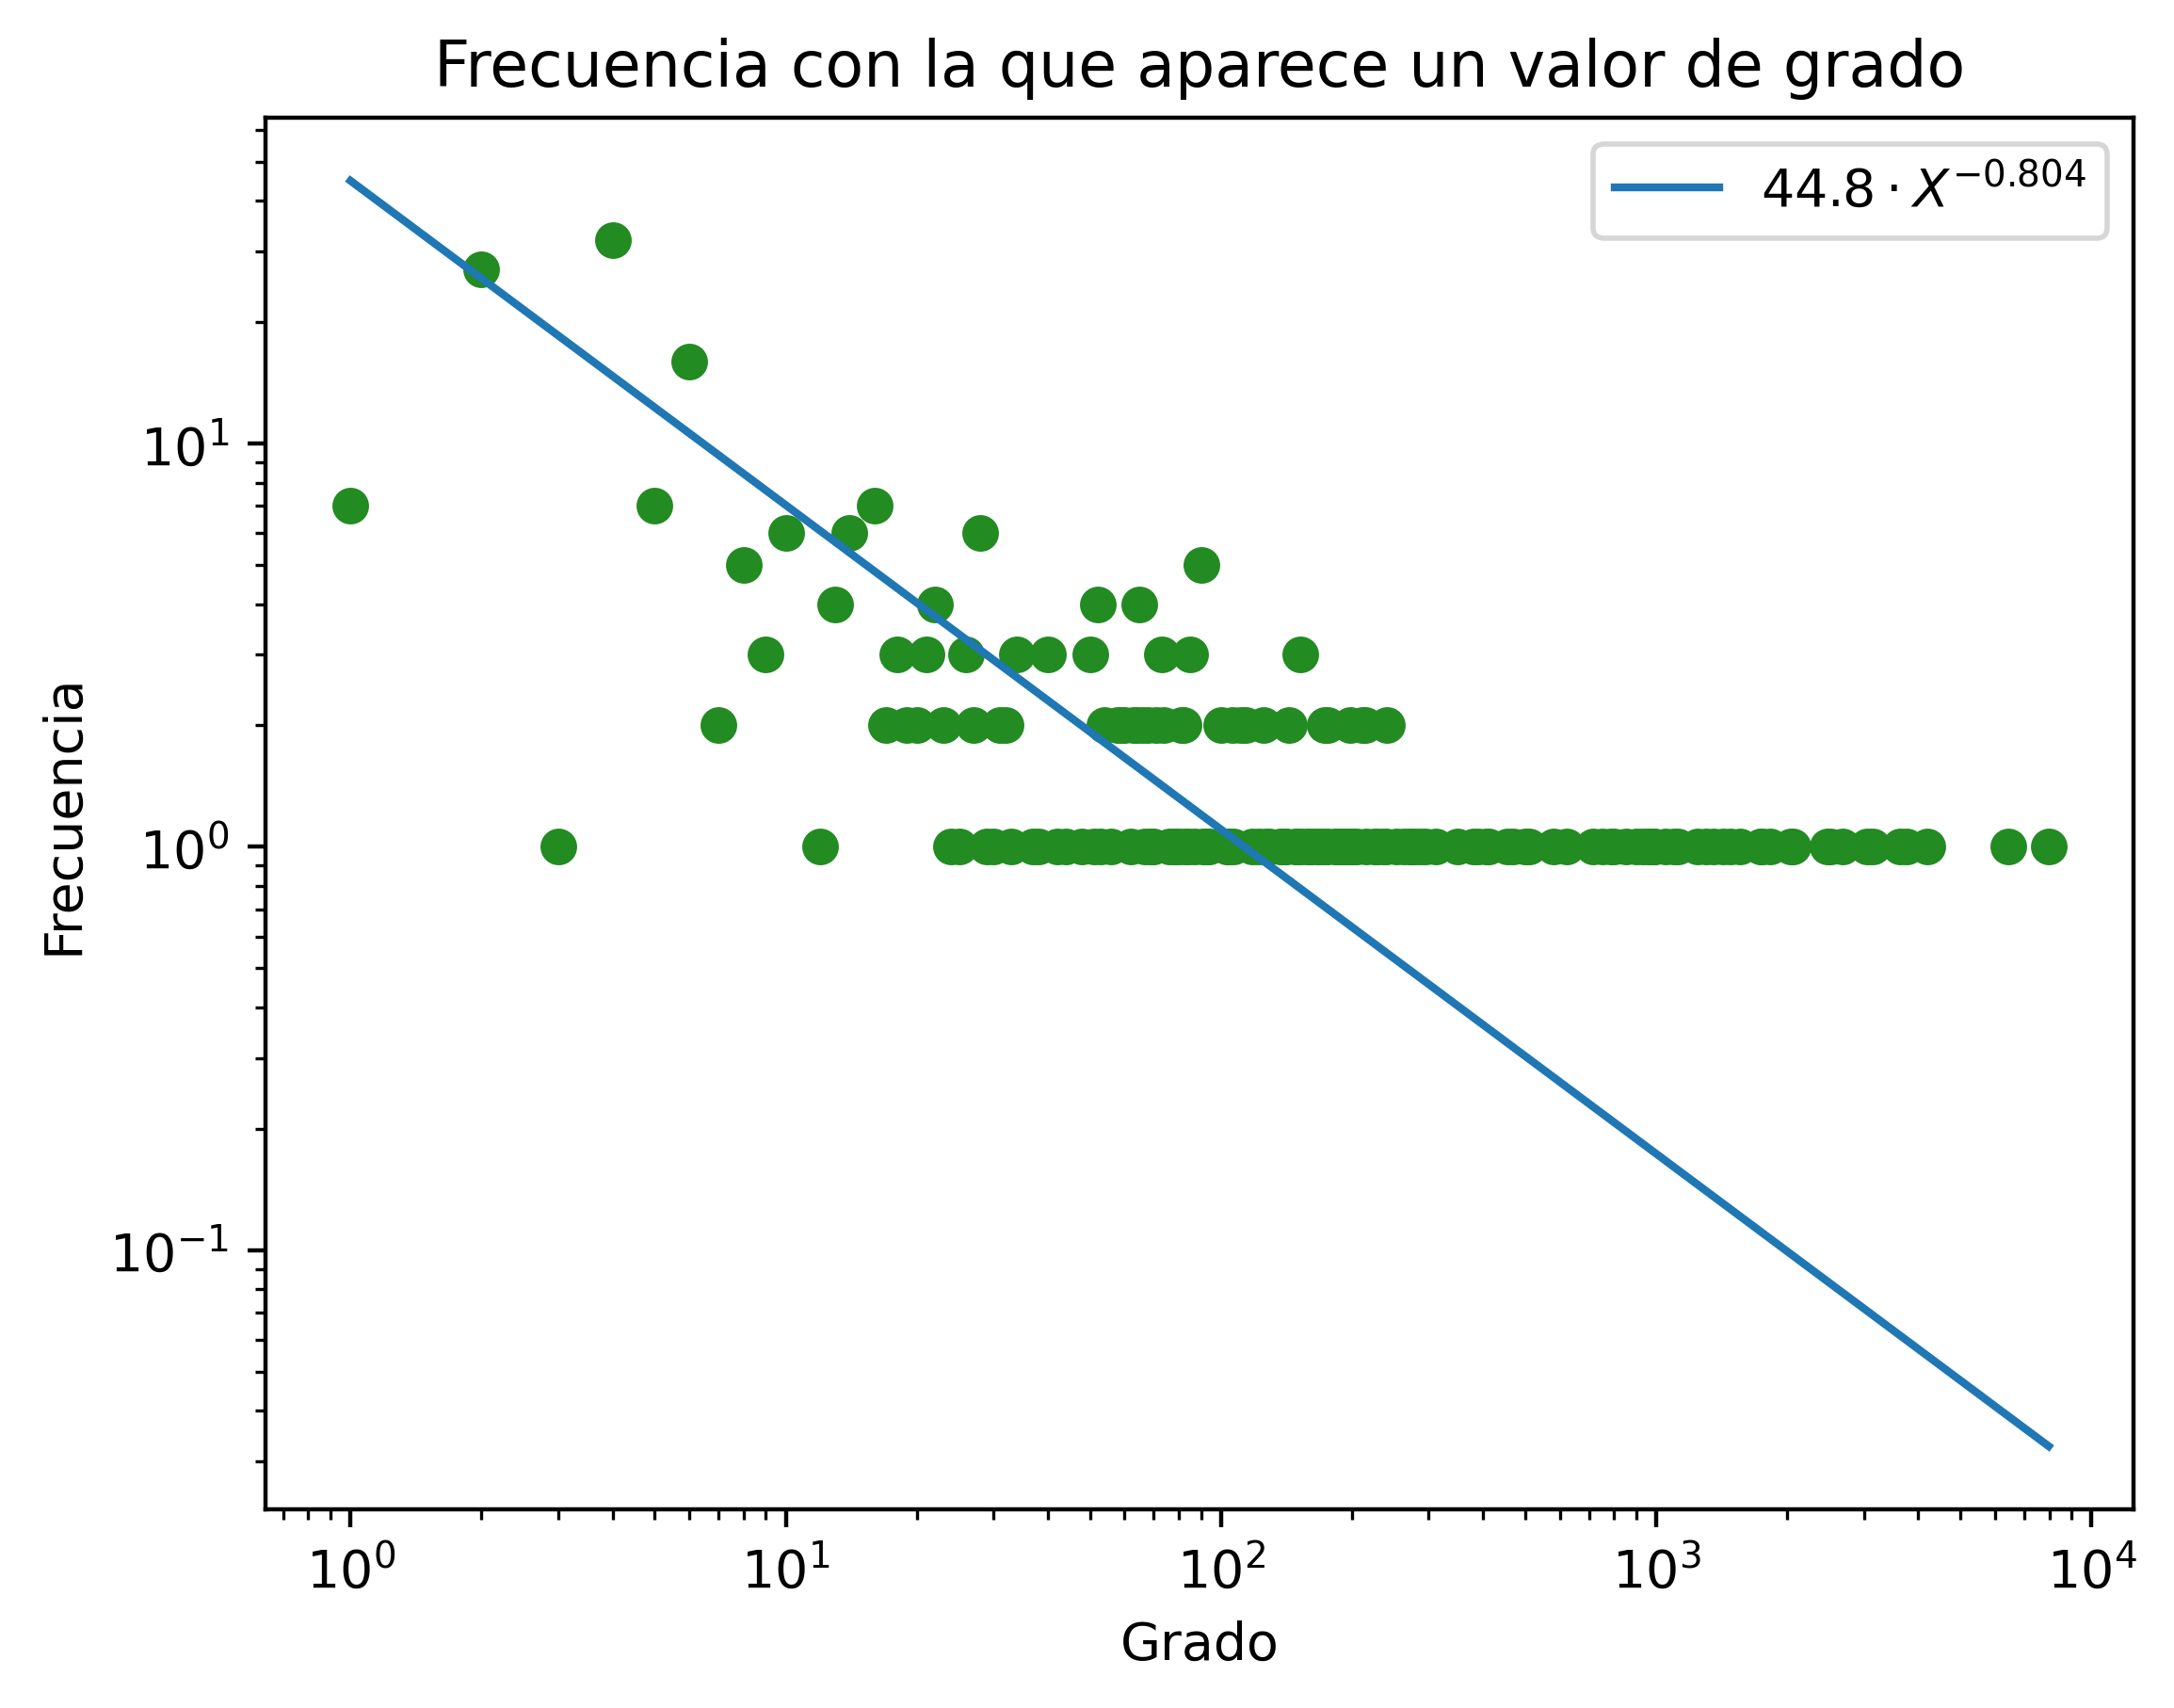

<Figure size 640x480 with 0 Axes>

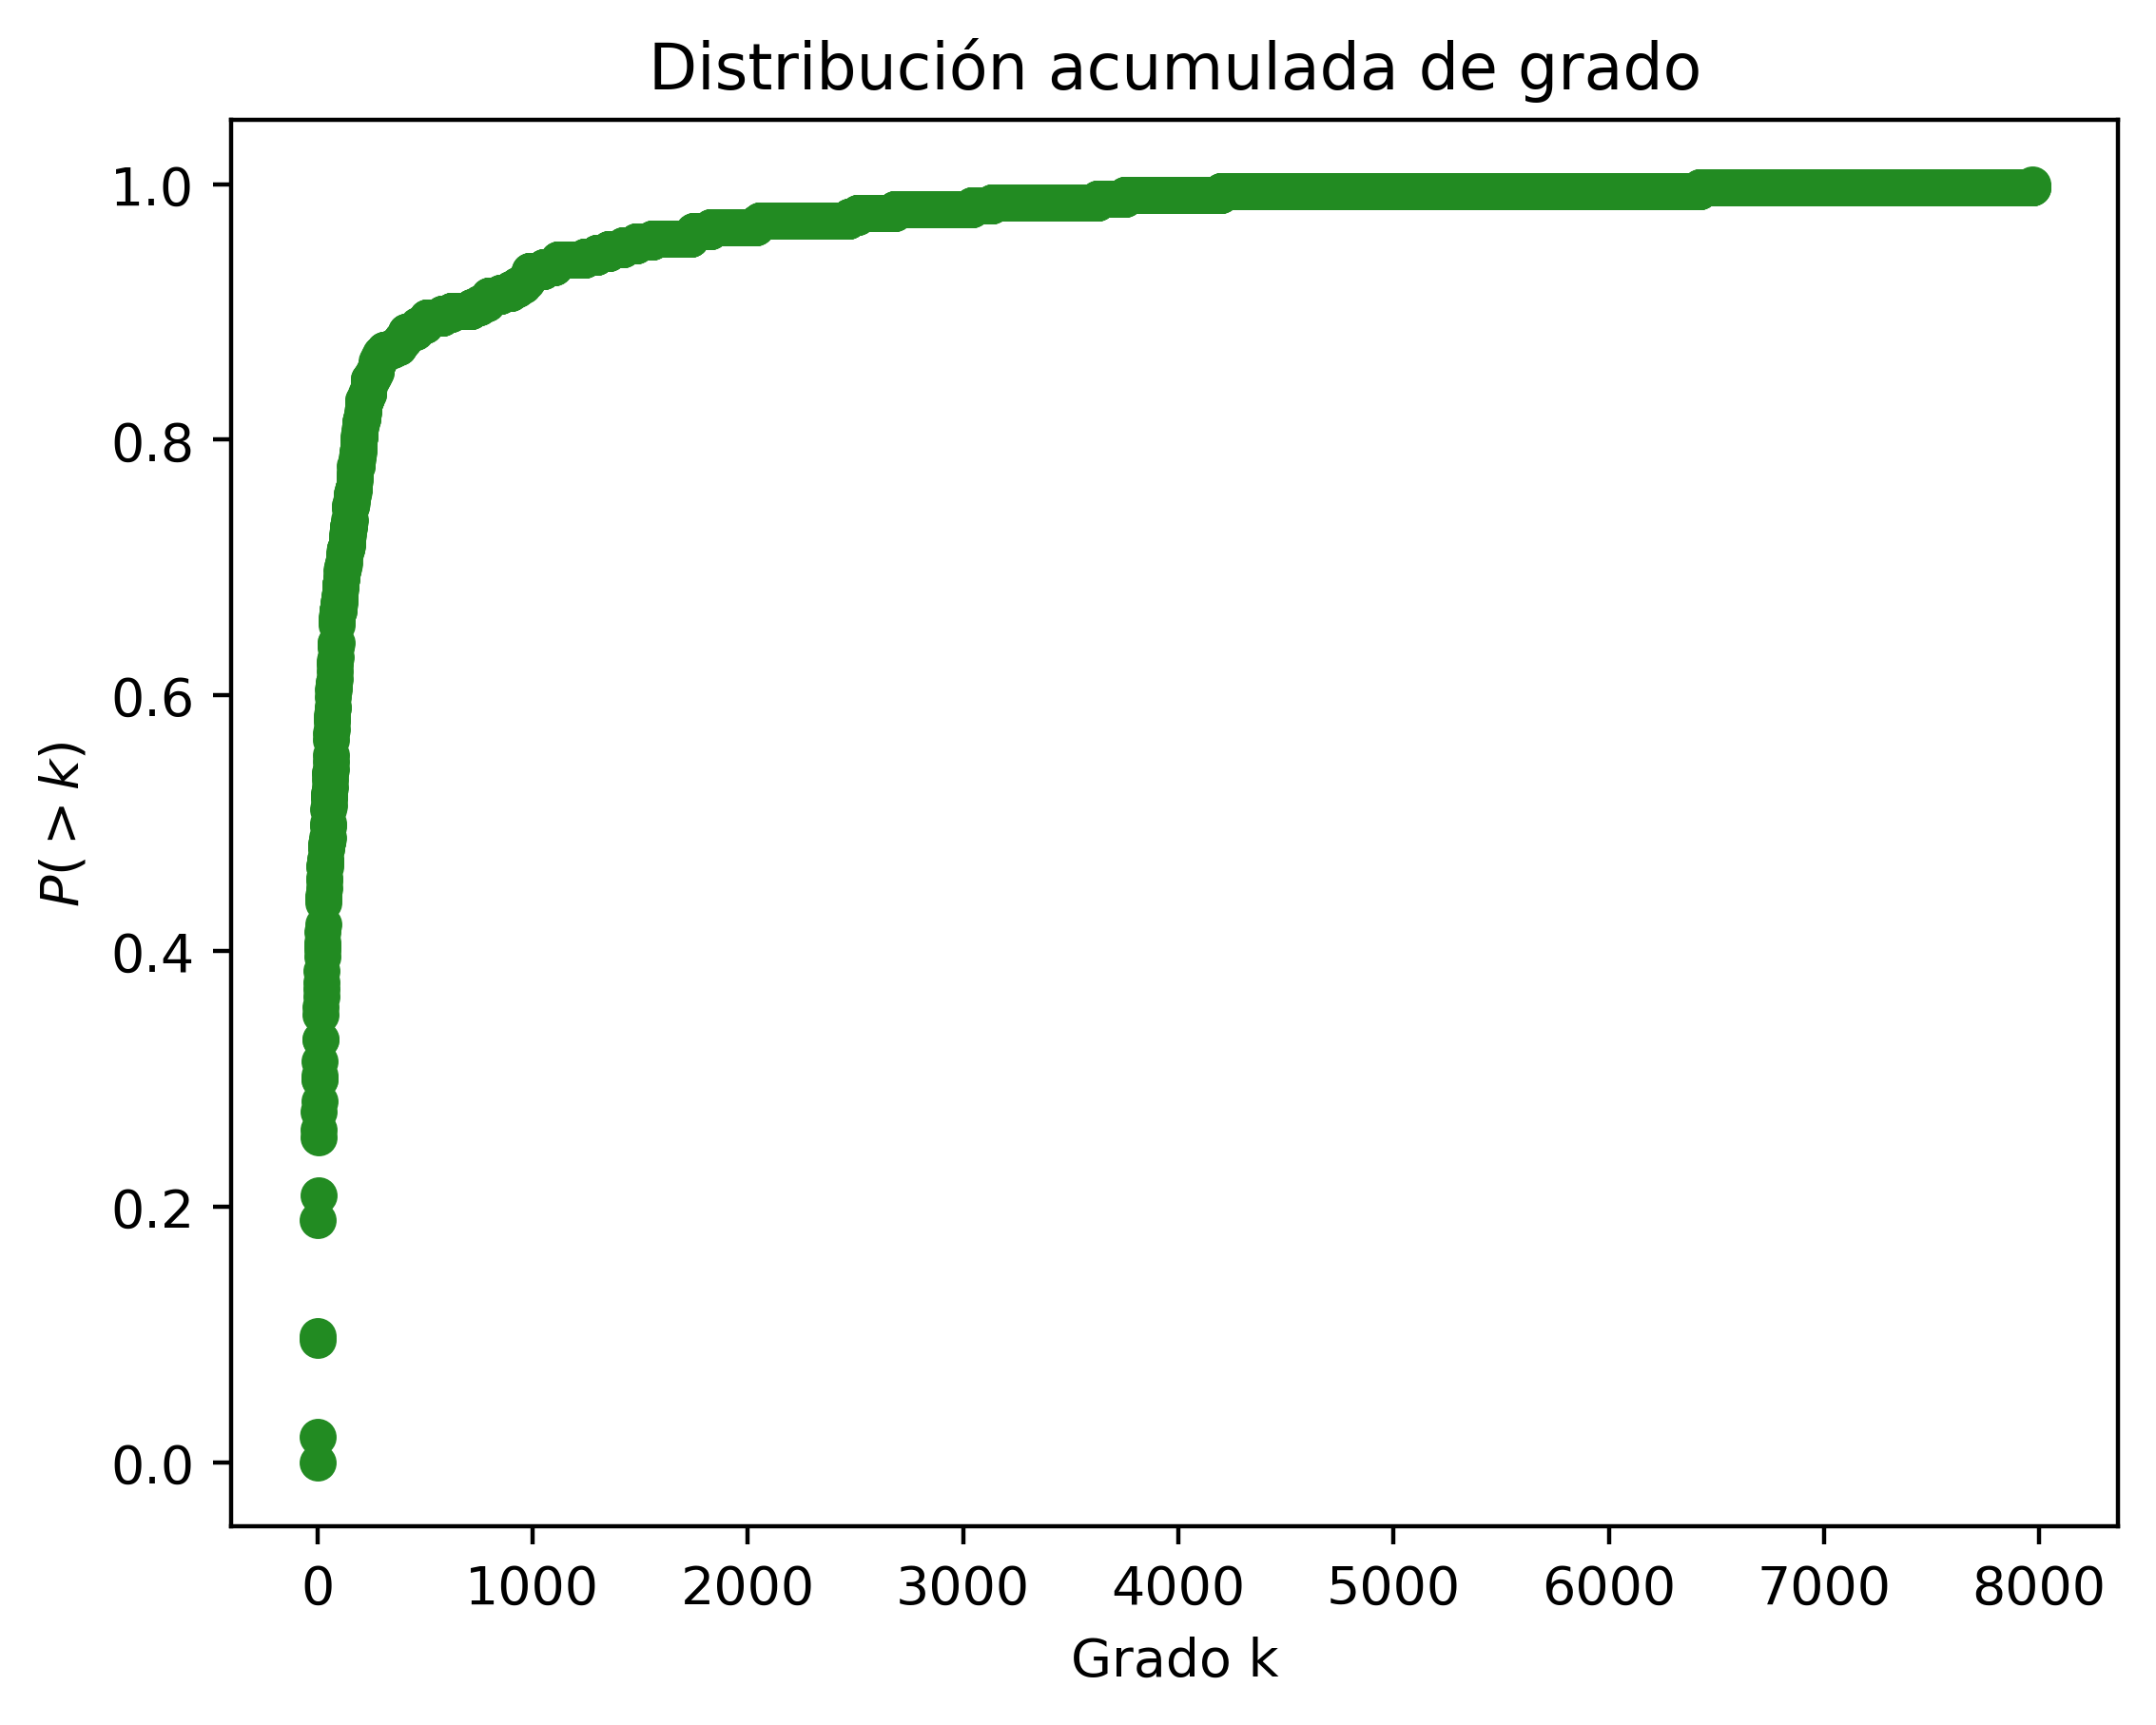

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17504\1968071035.py:38: RuntimeWarning: divide by zero encountered in power
  plt.plot(range(len(data)),218.73*(np.arange(len(data))**(-1.22)),label=r"$218.73\cdot X^{-1.22}$",color='b')


<Figure size 640x480 with 0 Axes>

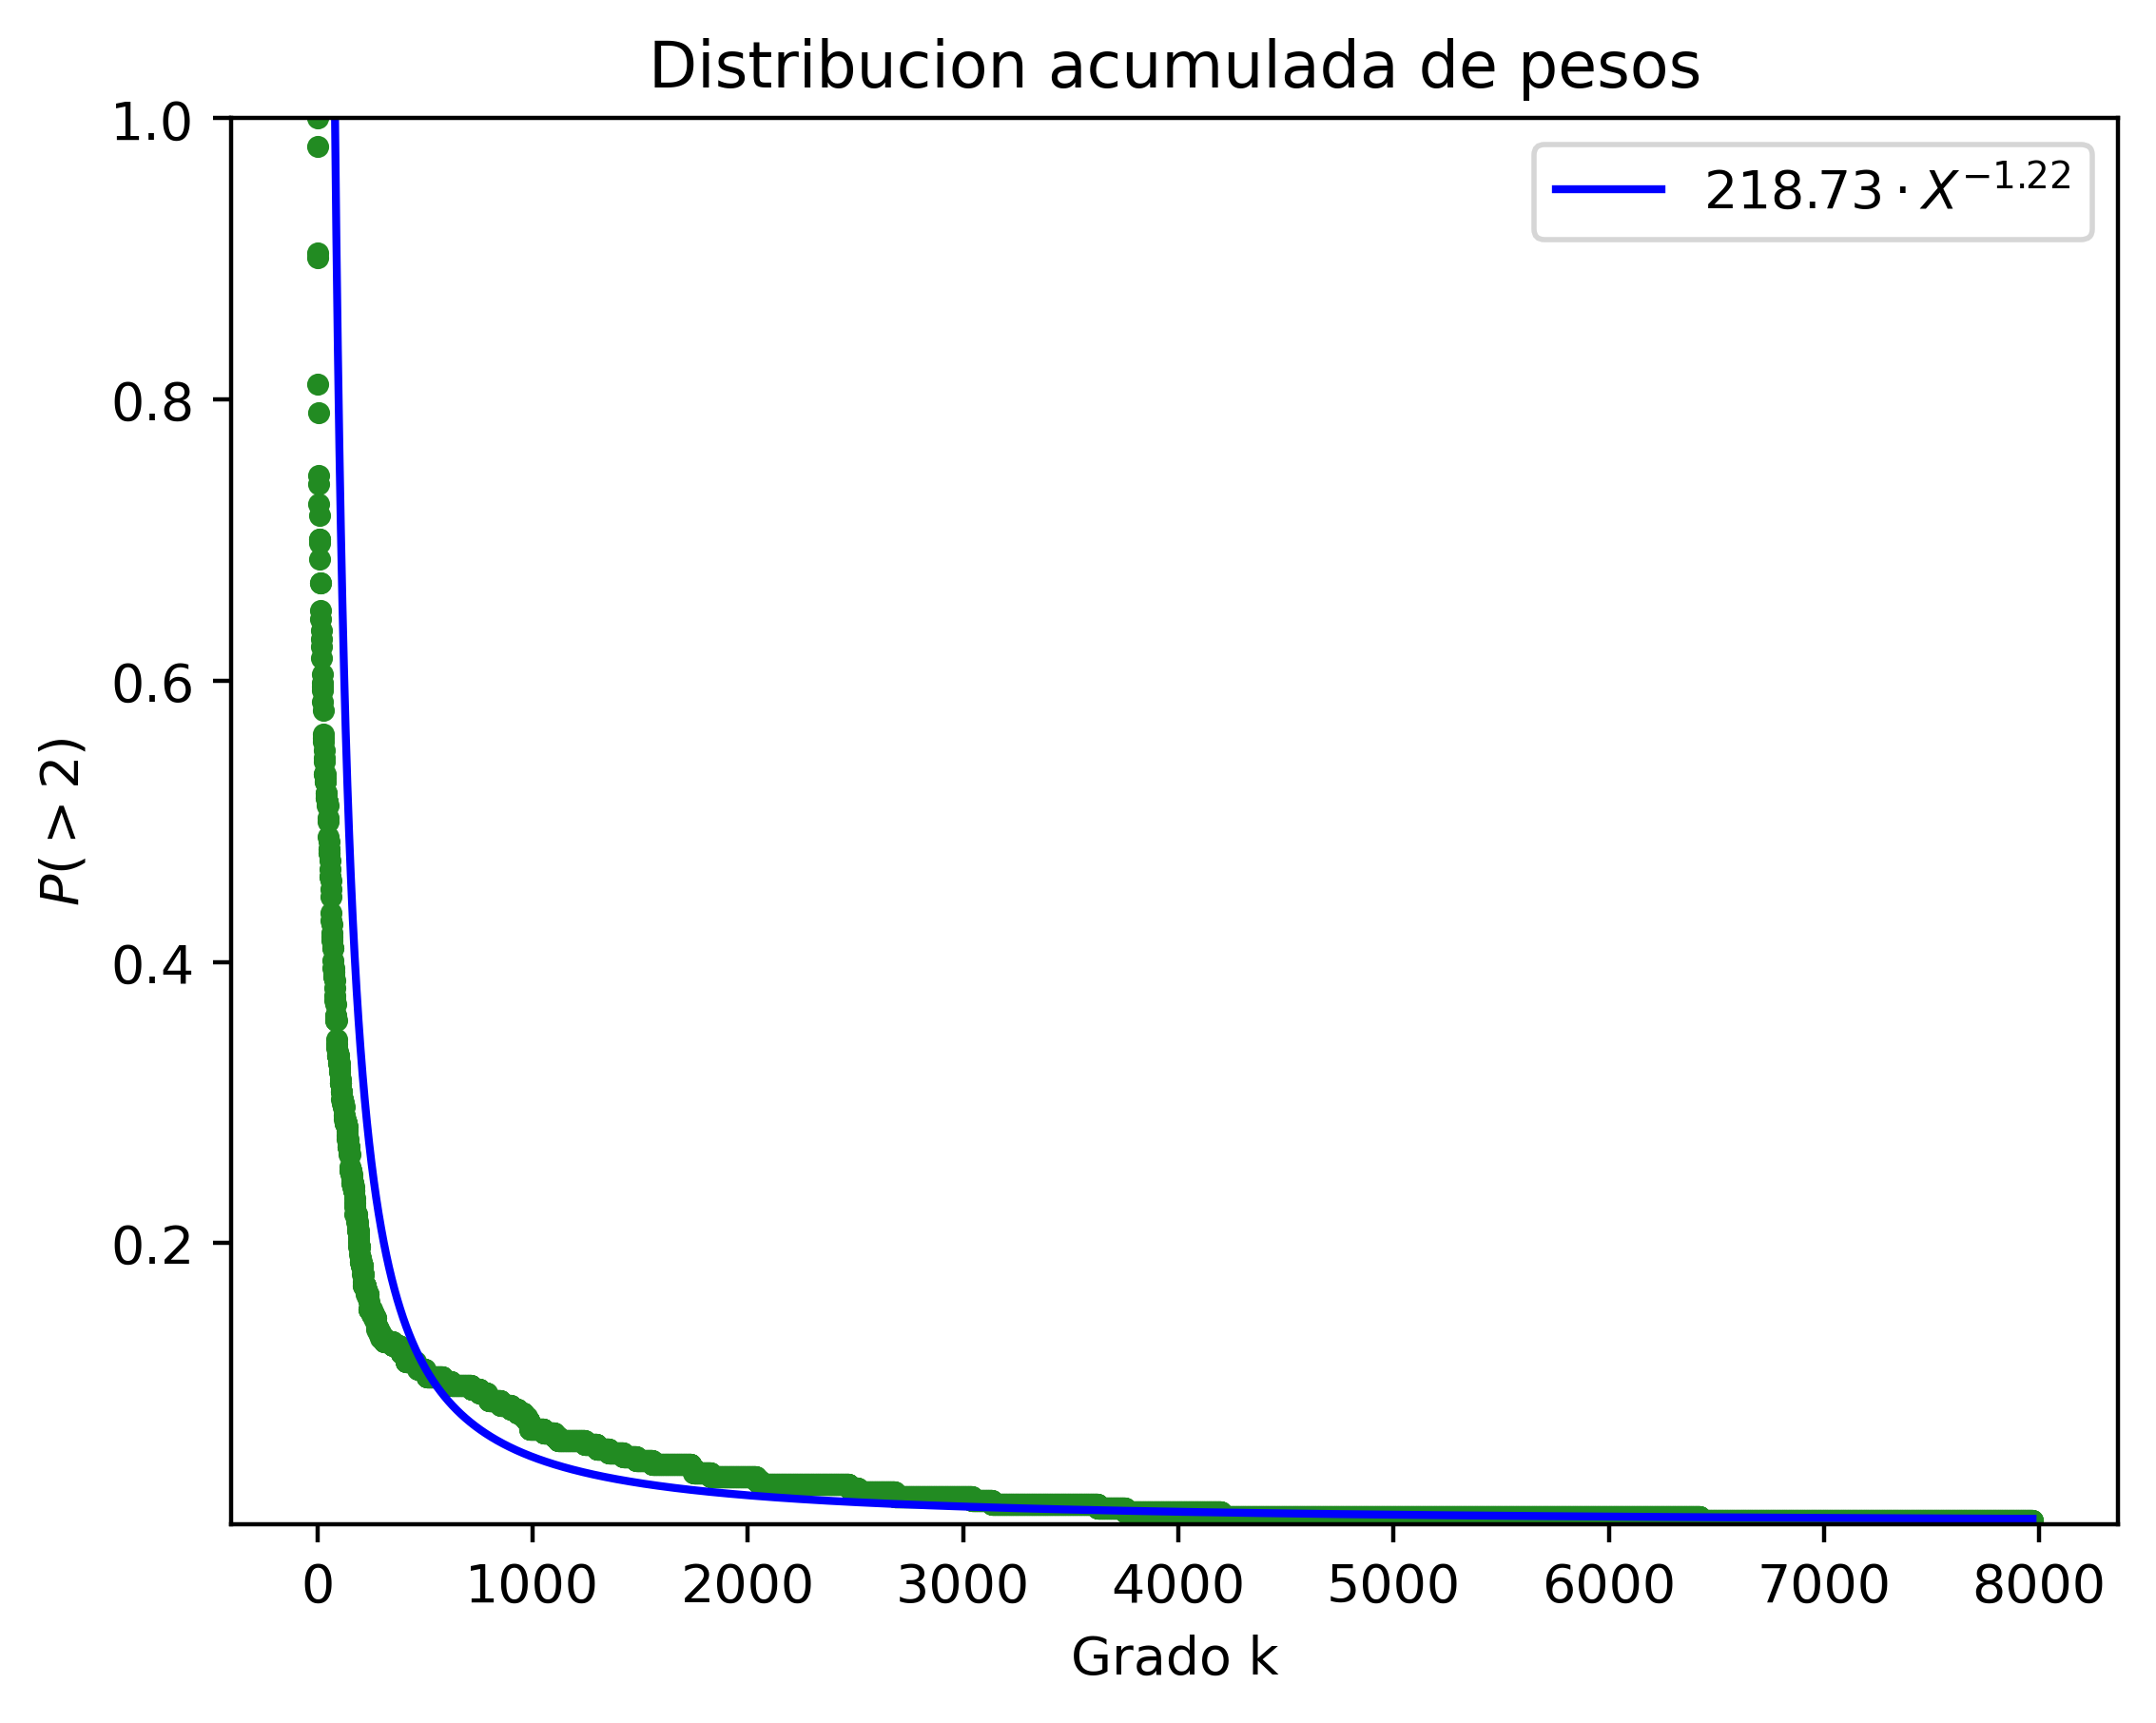

<Figure size 640x480 with 0 Axes>

In [101]:
edgelist_file = "./2019_undi.edgelist"
nodos=G.nodes()
N=list(nodos)
ind_dict=GD.degree(nodos,weight="weight")

degree=[]

for i in range(len(N)):
    degree.append(ind_dict[N[i]])
    

degree_distribution = np.bincount(np.array(degree))

plot(degree_distribution, edgelist_file, 'forestgreen',"Cumulative_degree_weight_dist")



## In-Out degree por separado

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17504\3958978844.py:5: RuntimeWarning: divide by zero encountered in power
  plt.plot(range(len(data)),44.8*(np.arange(len(data))**(-0.804)),label=r"$44.8\cdot X^{-0.804}$")


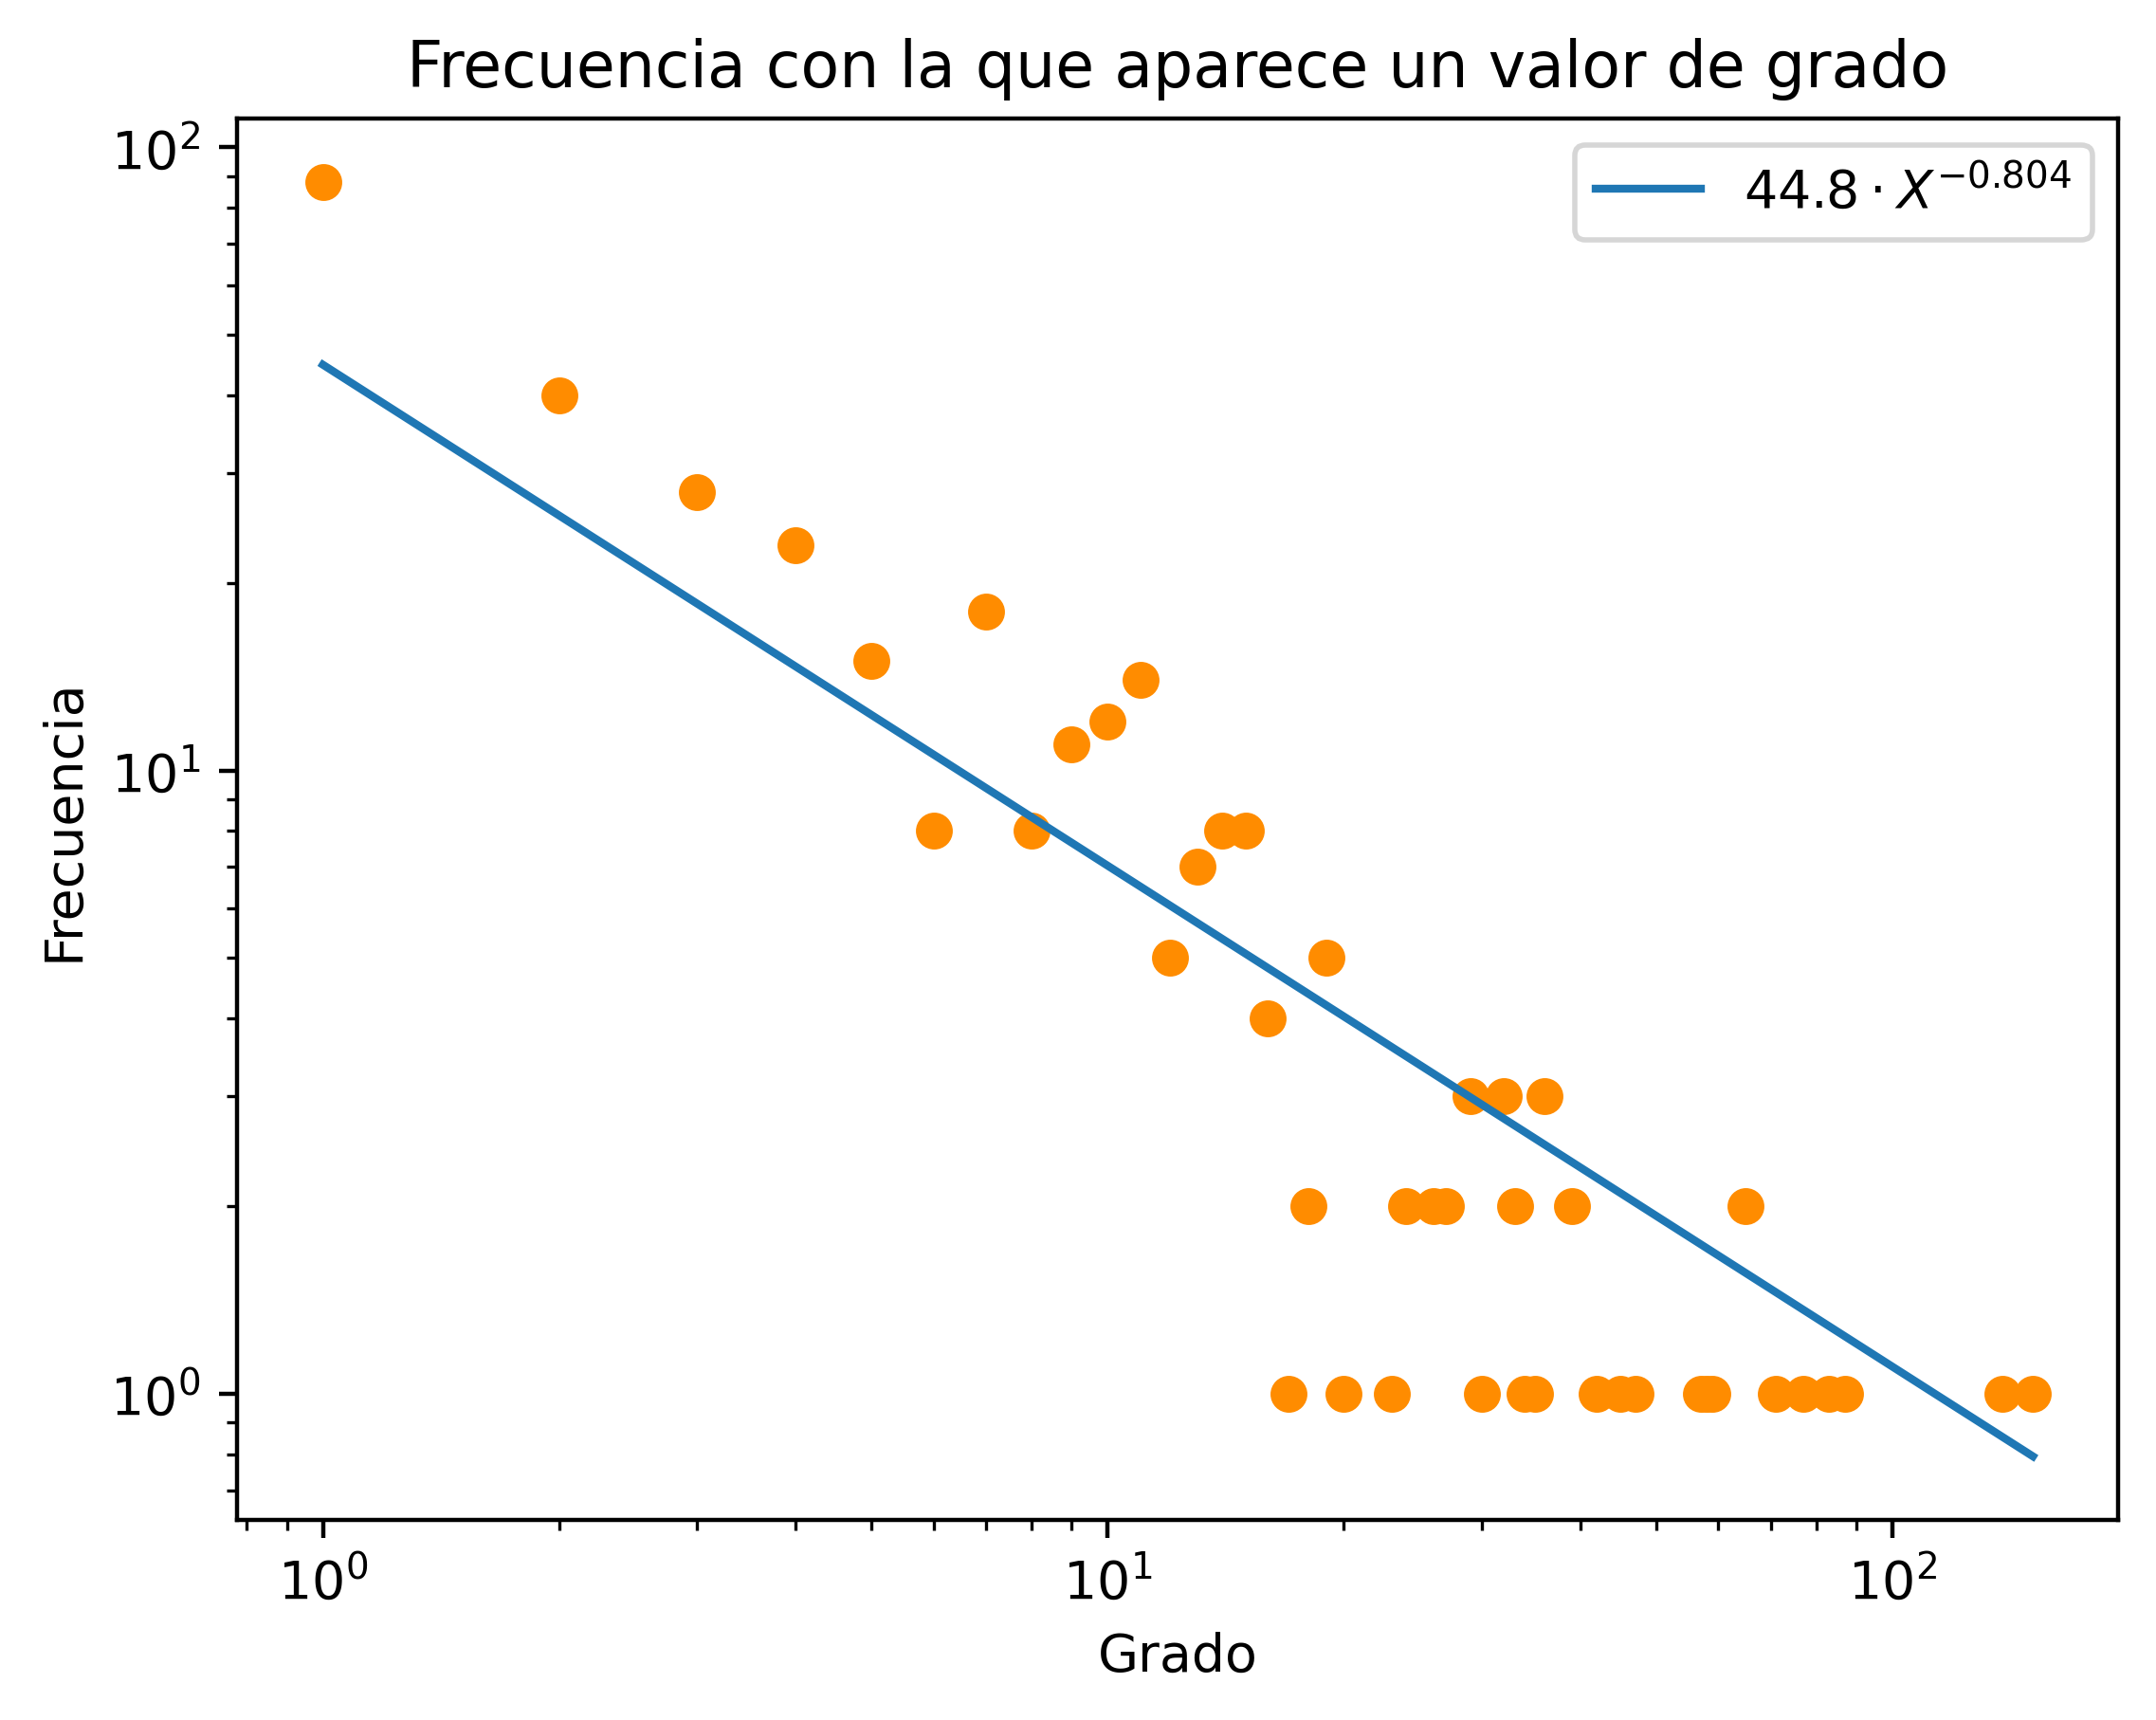

<Figure size 640x480 with 0 Axes>

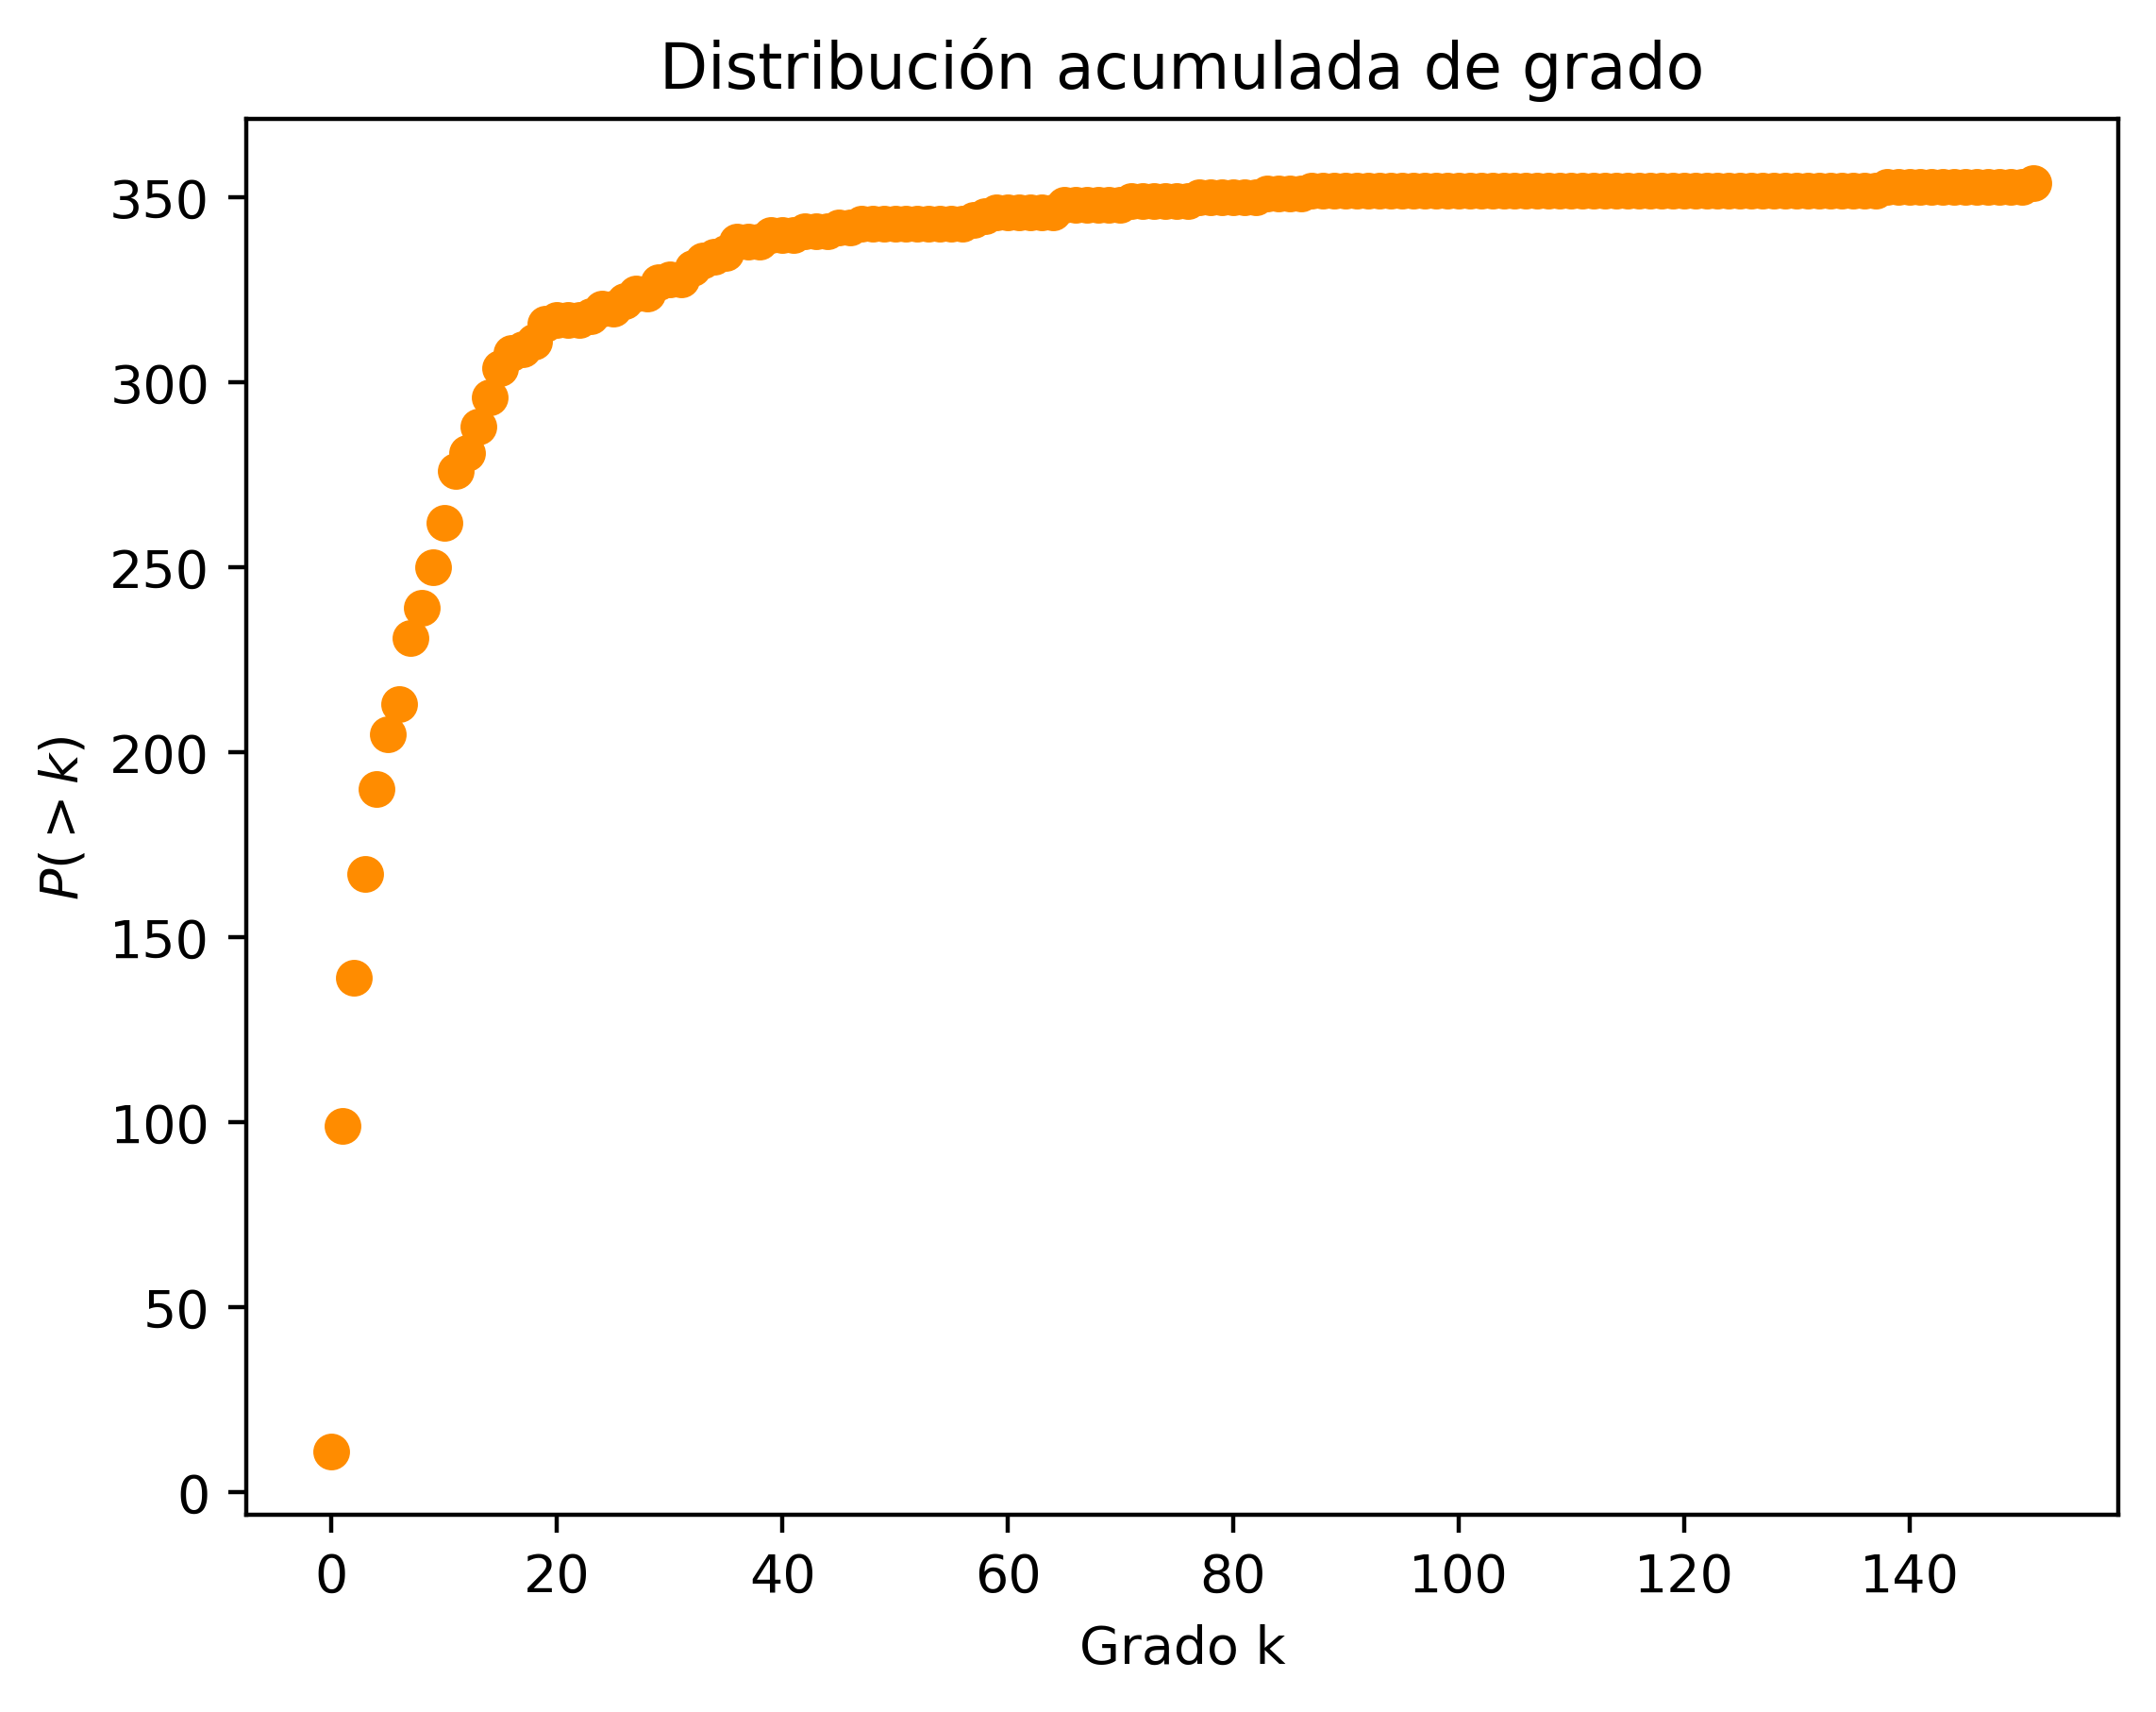

<Figure size 640x480 with 0 Axes>

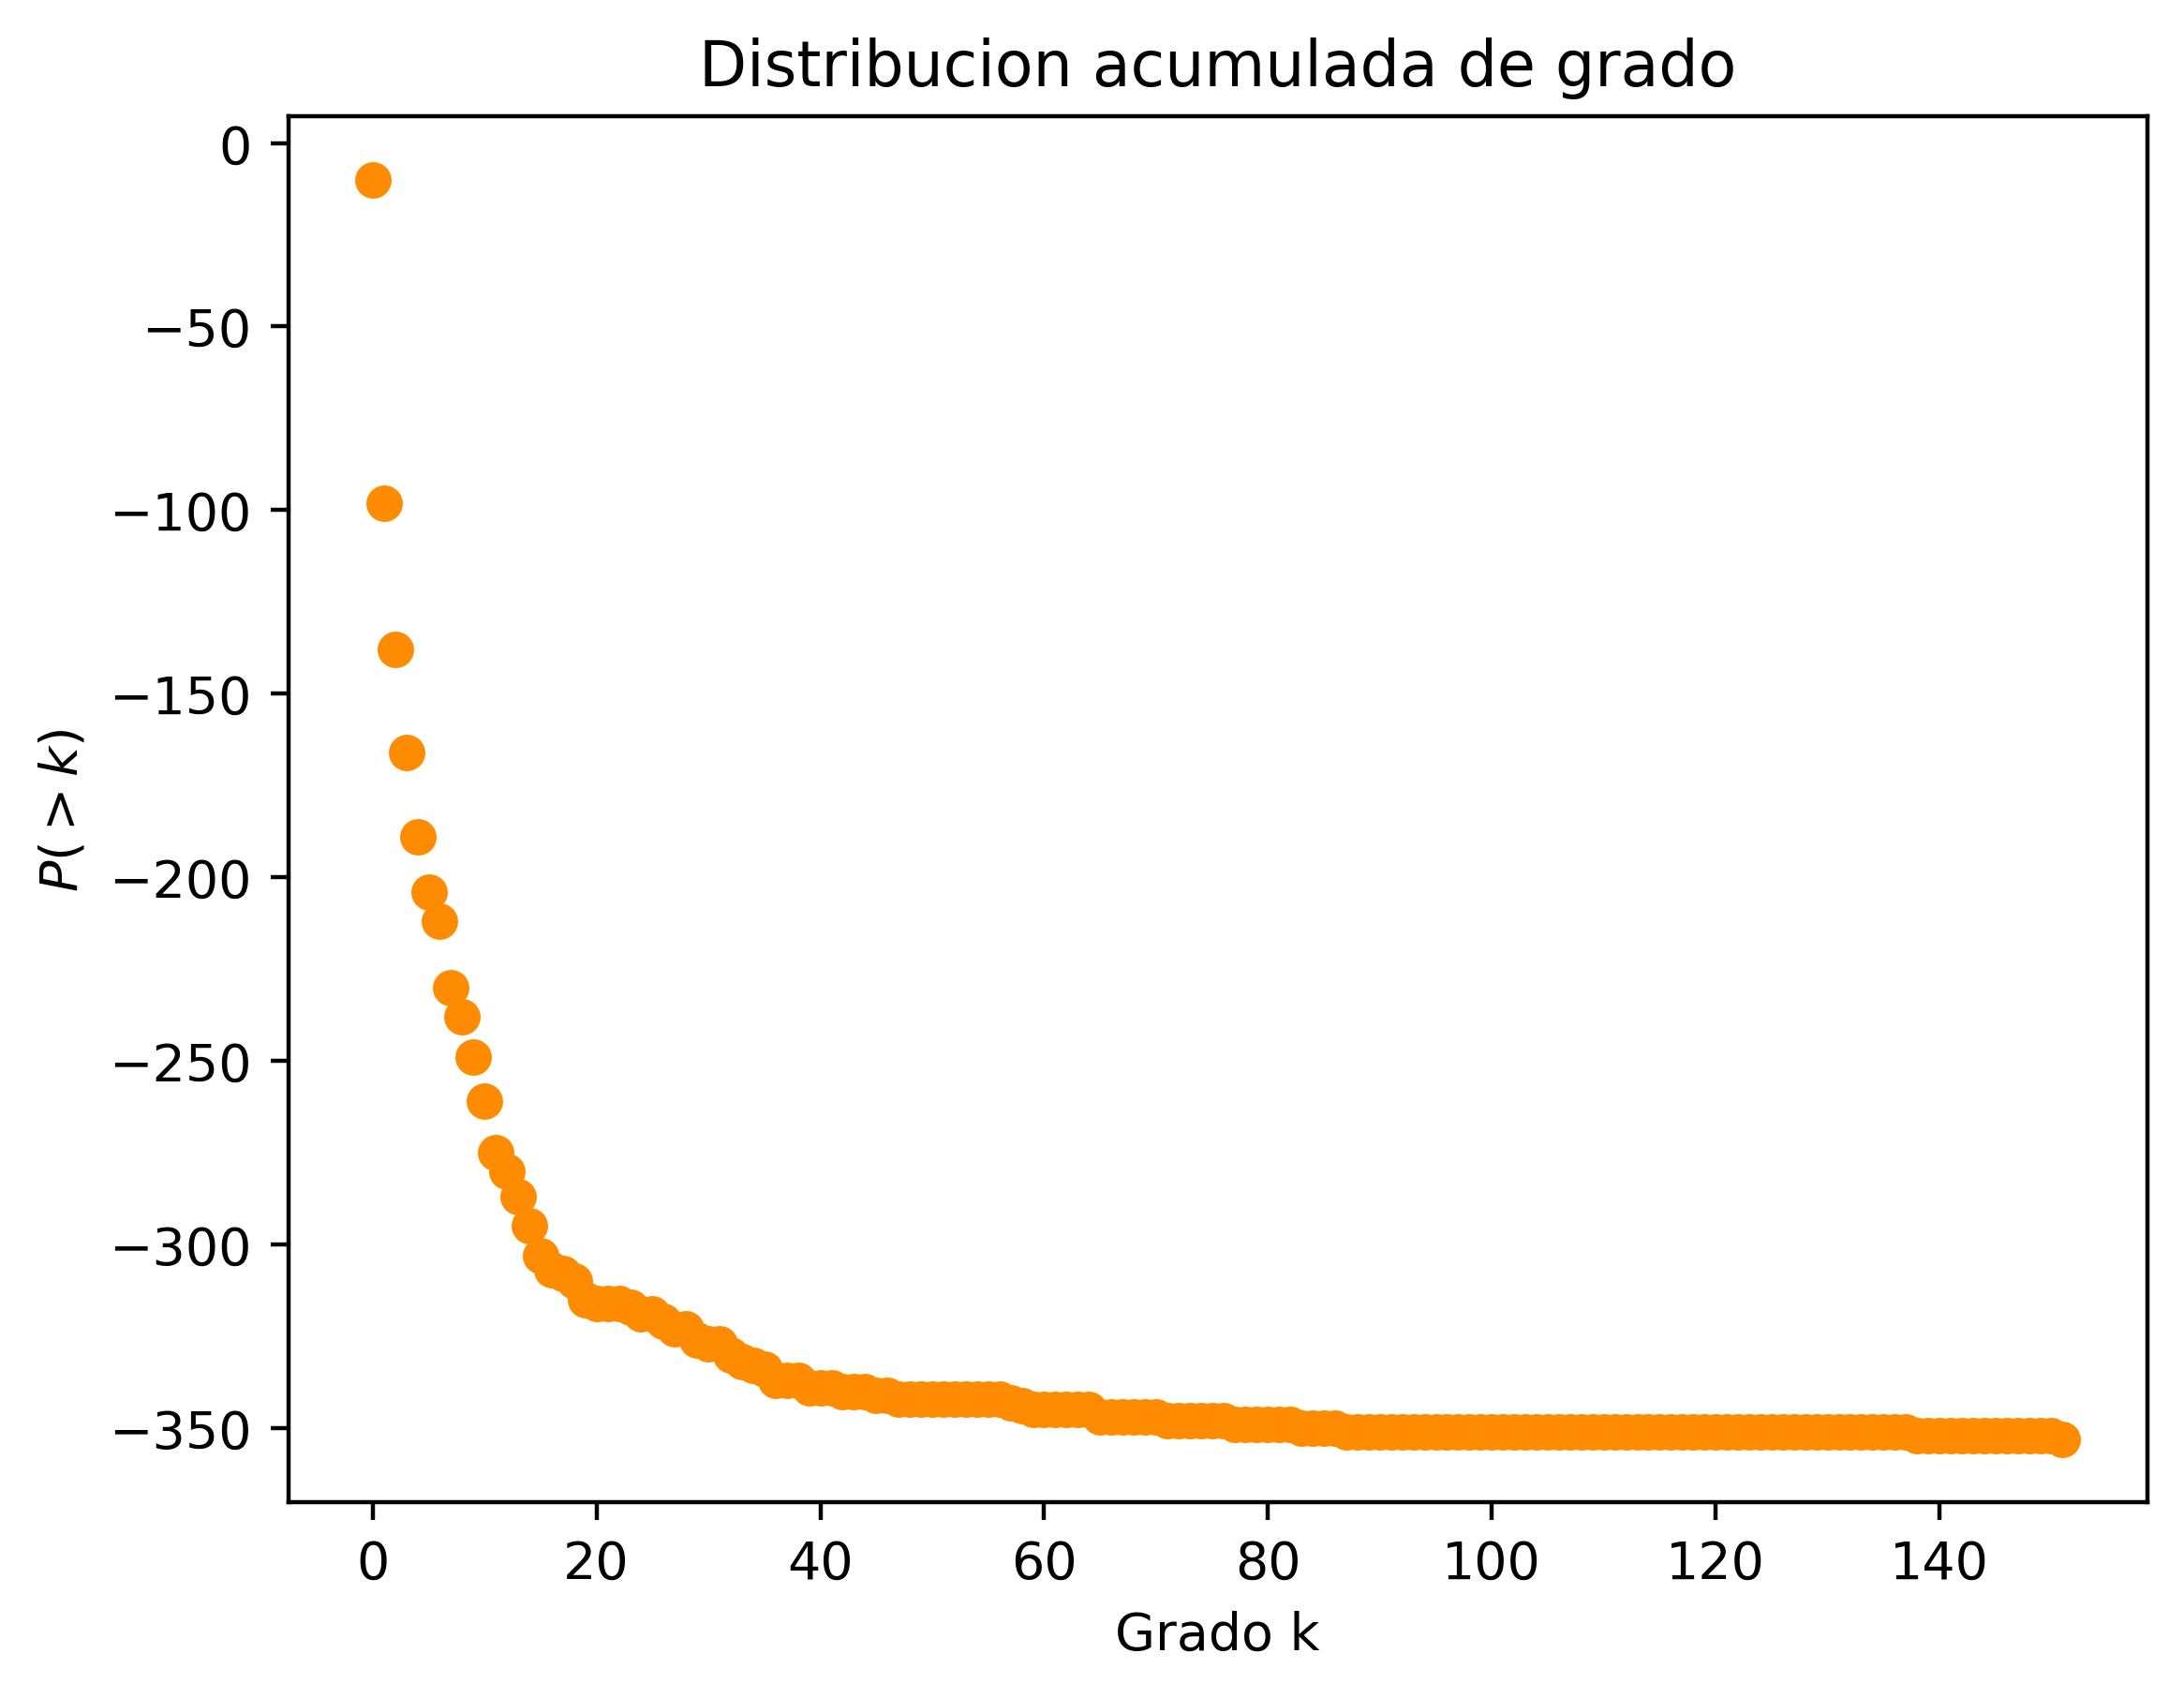

<Figure size 640x480 with 0 Axes>

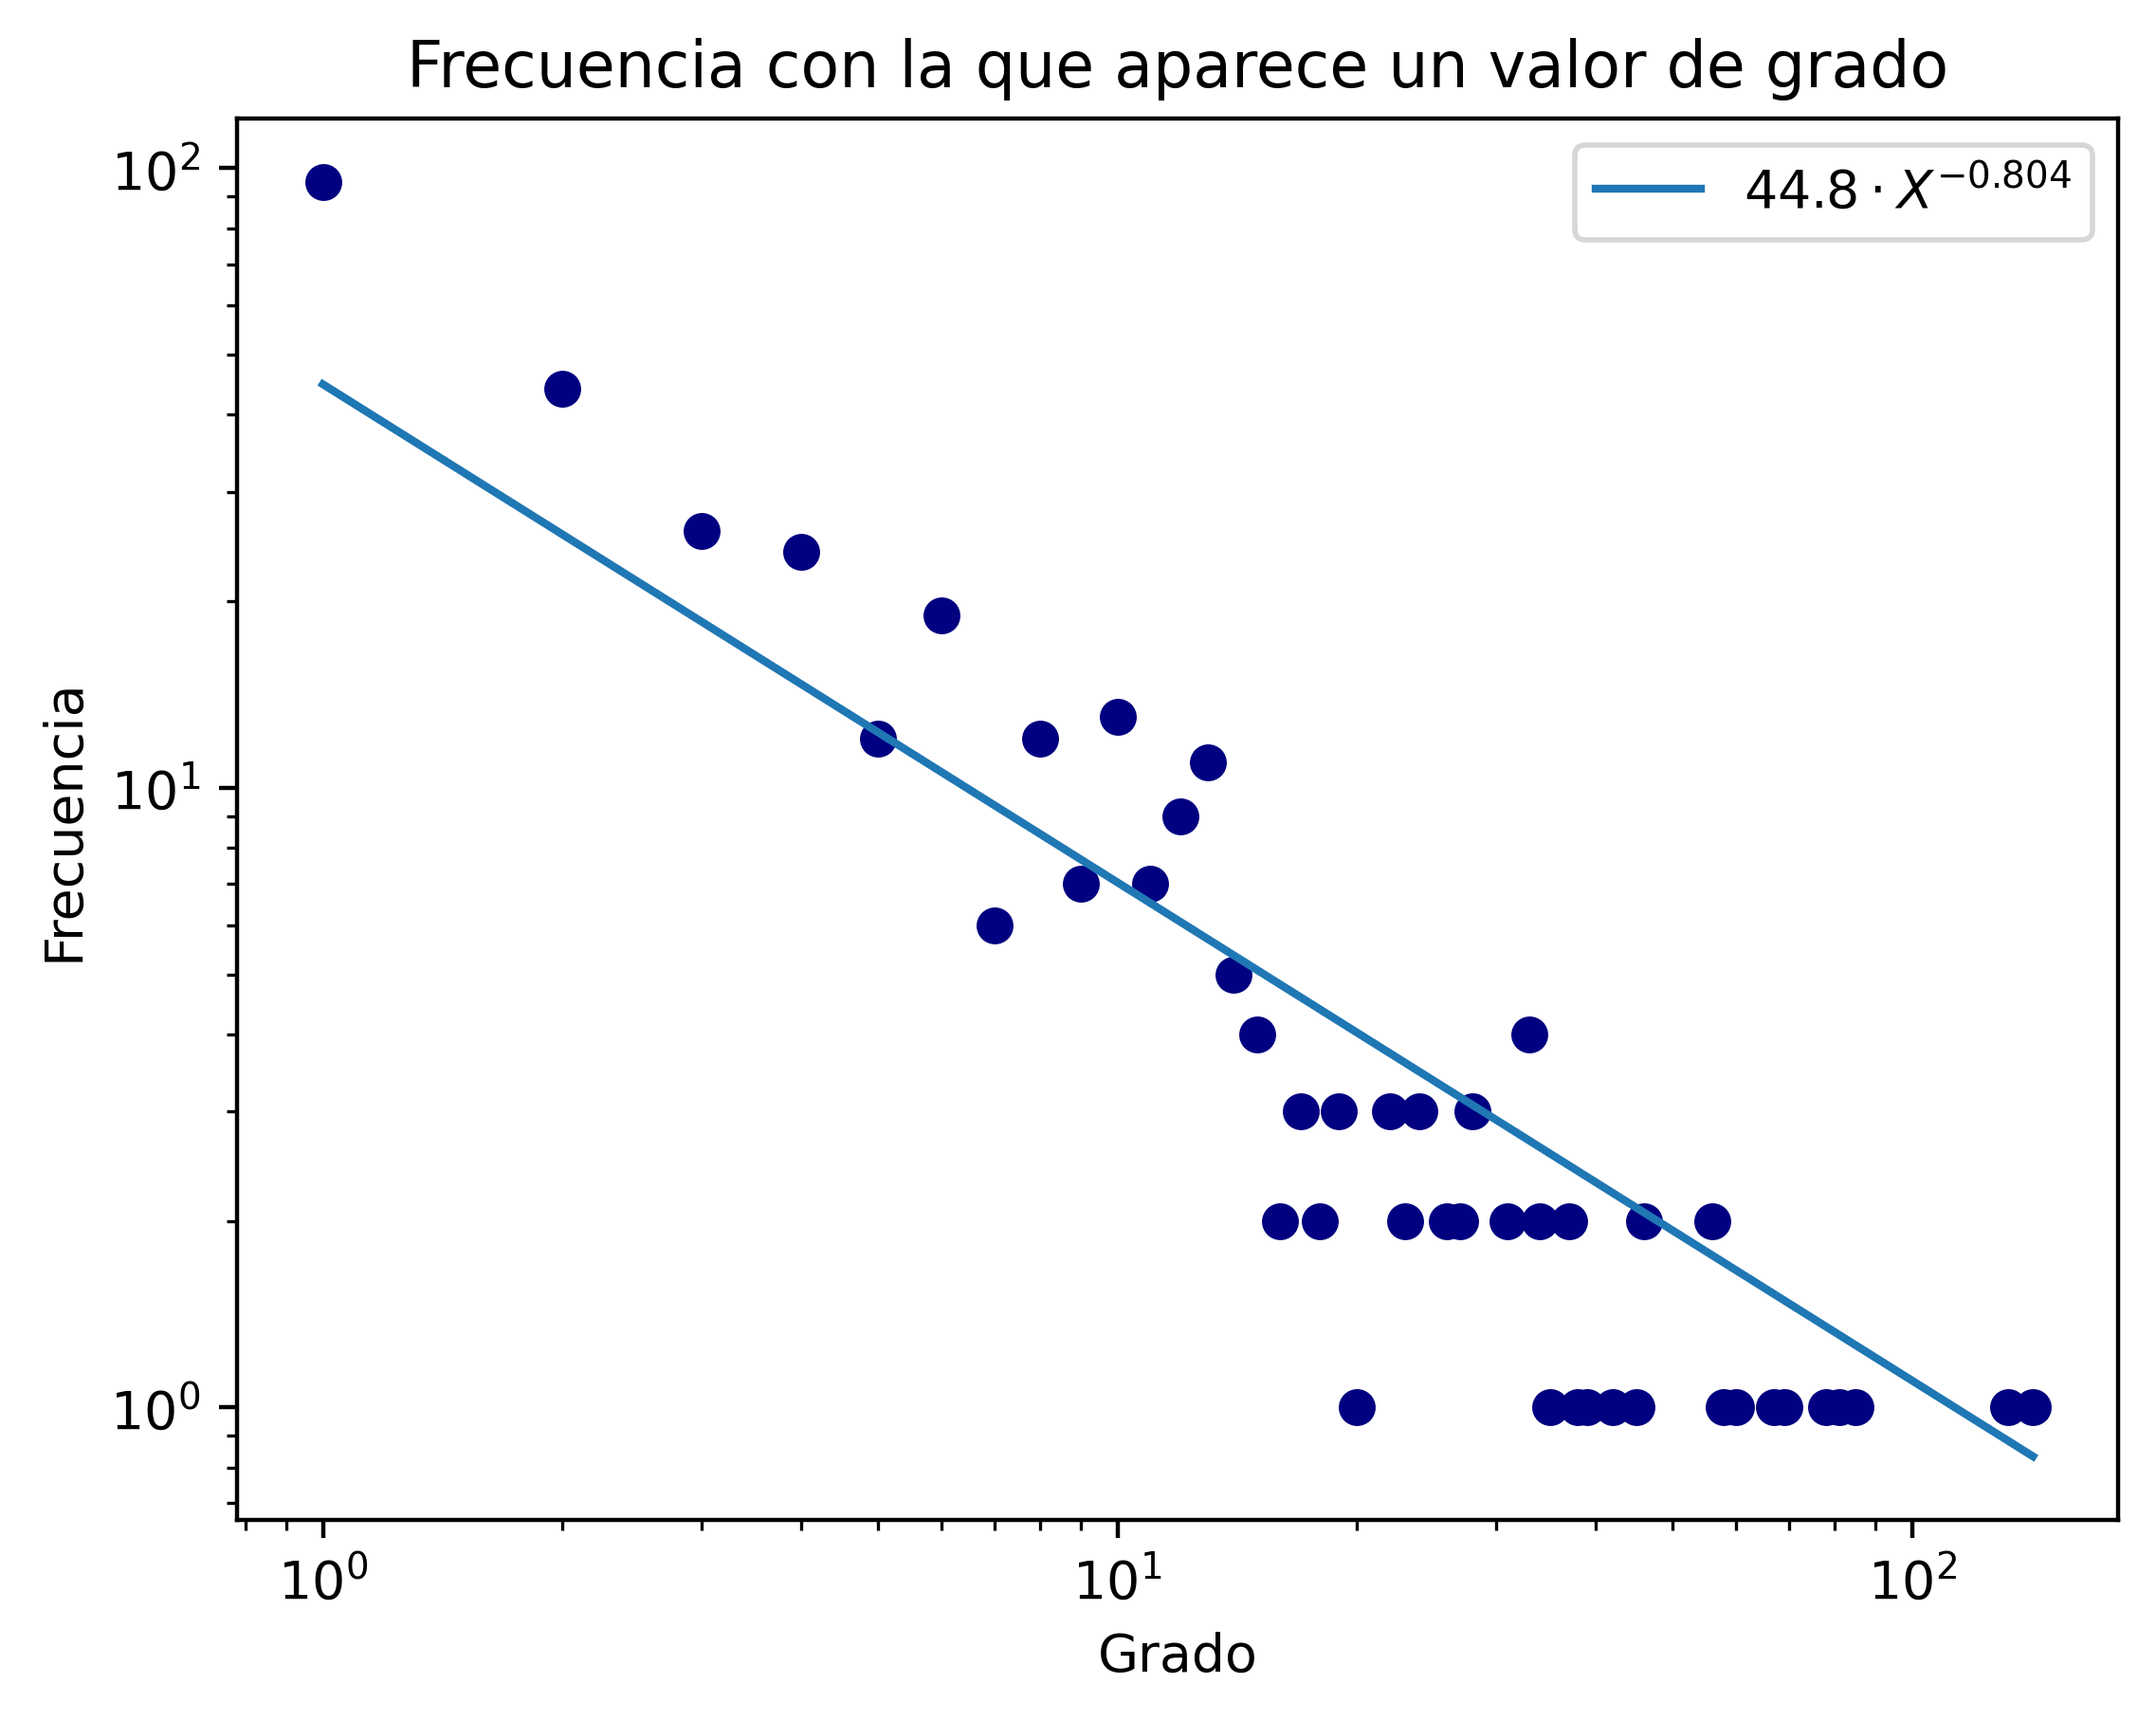

<Figure size 640x480 with 0 Axes>

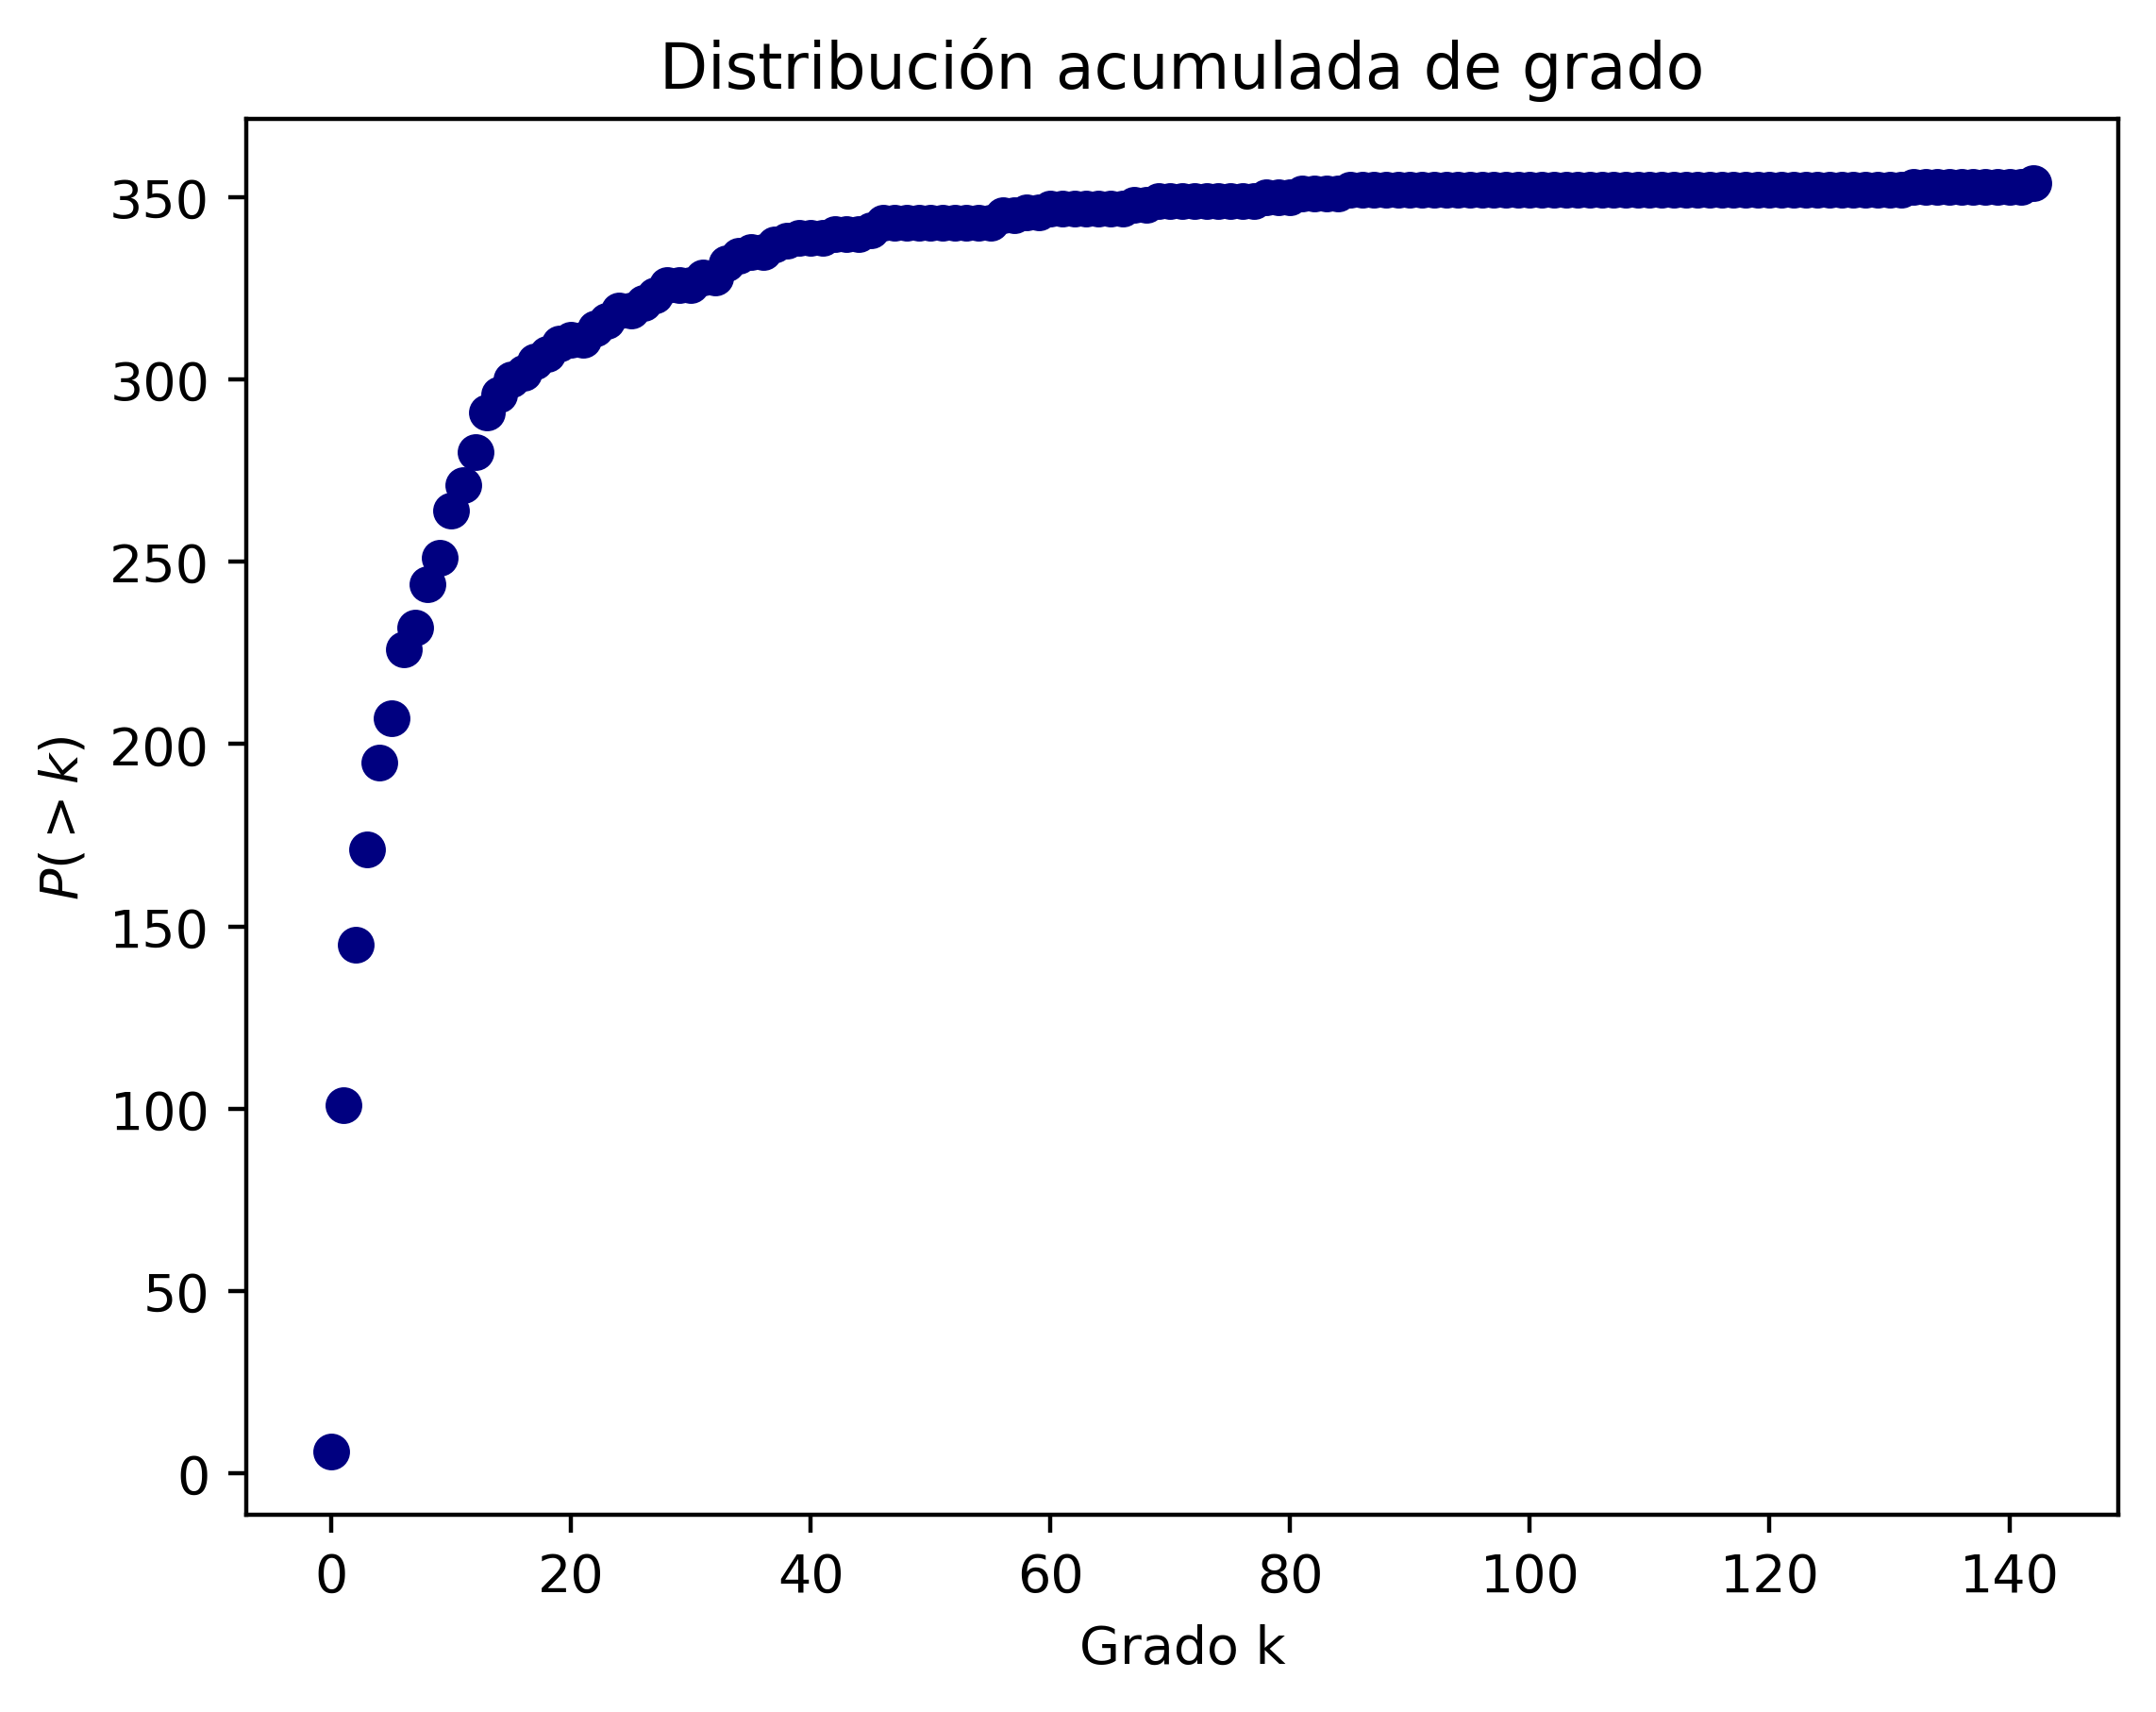

<Figure size 640x480 with 0 Axes>

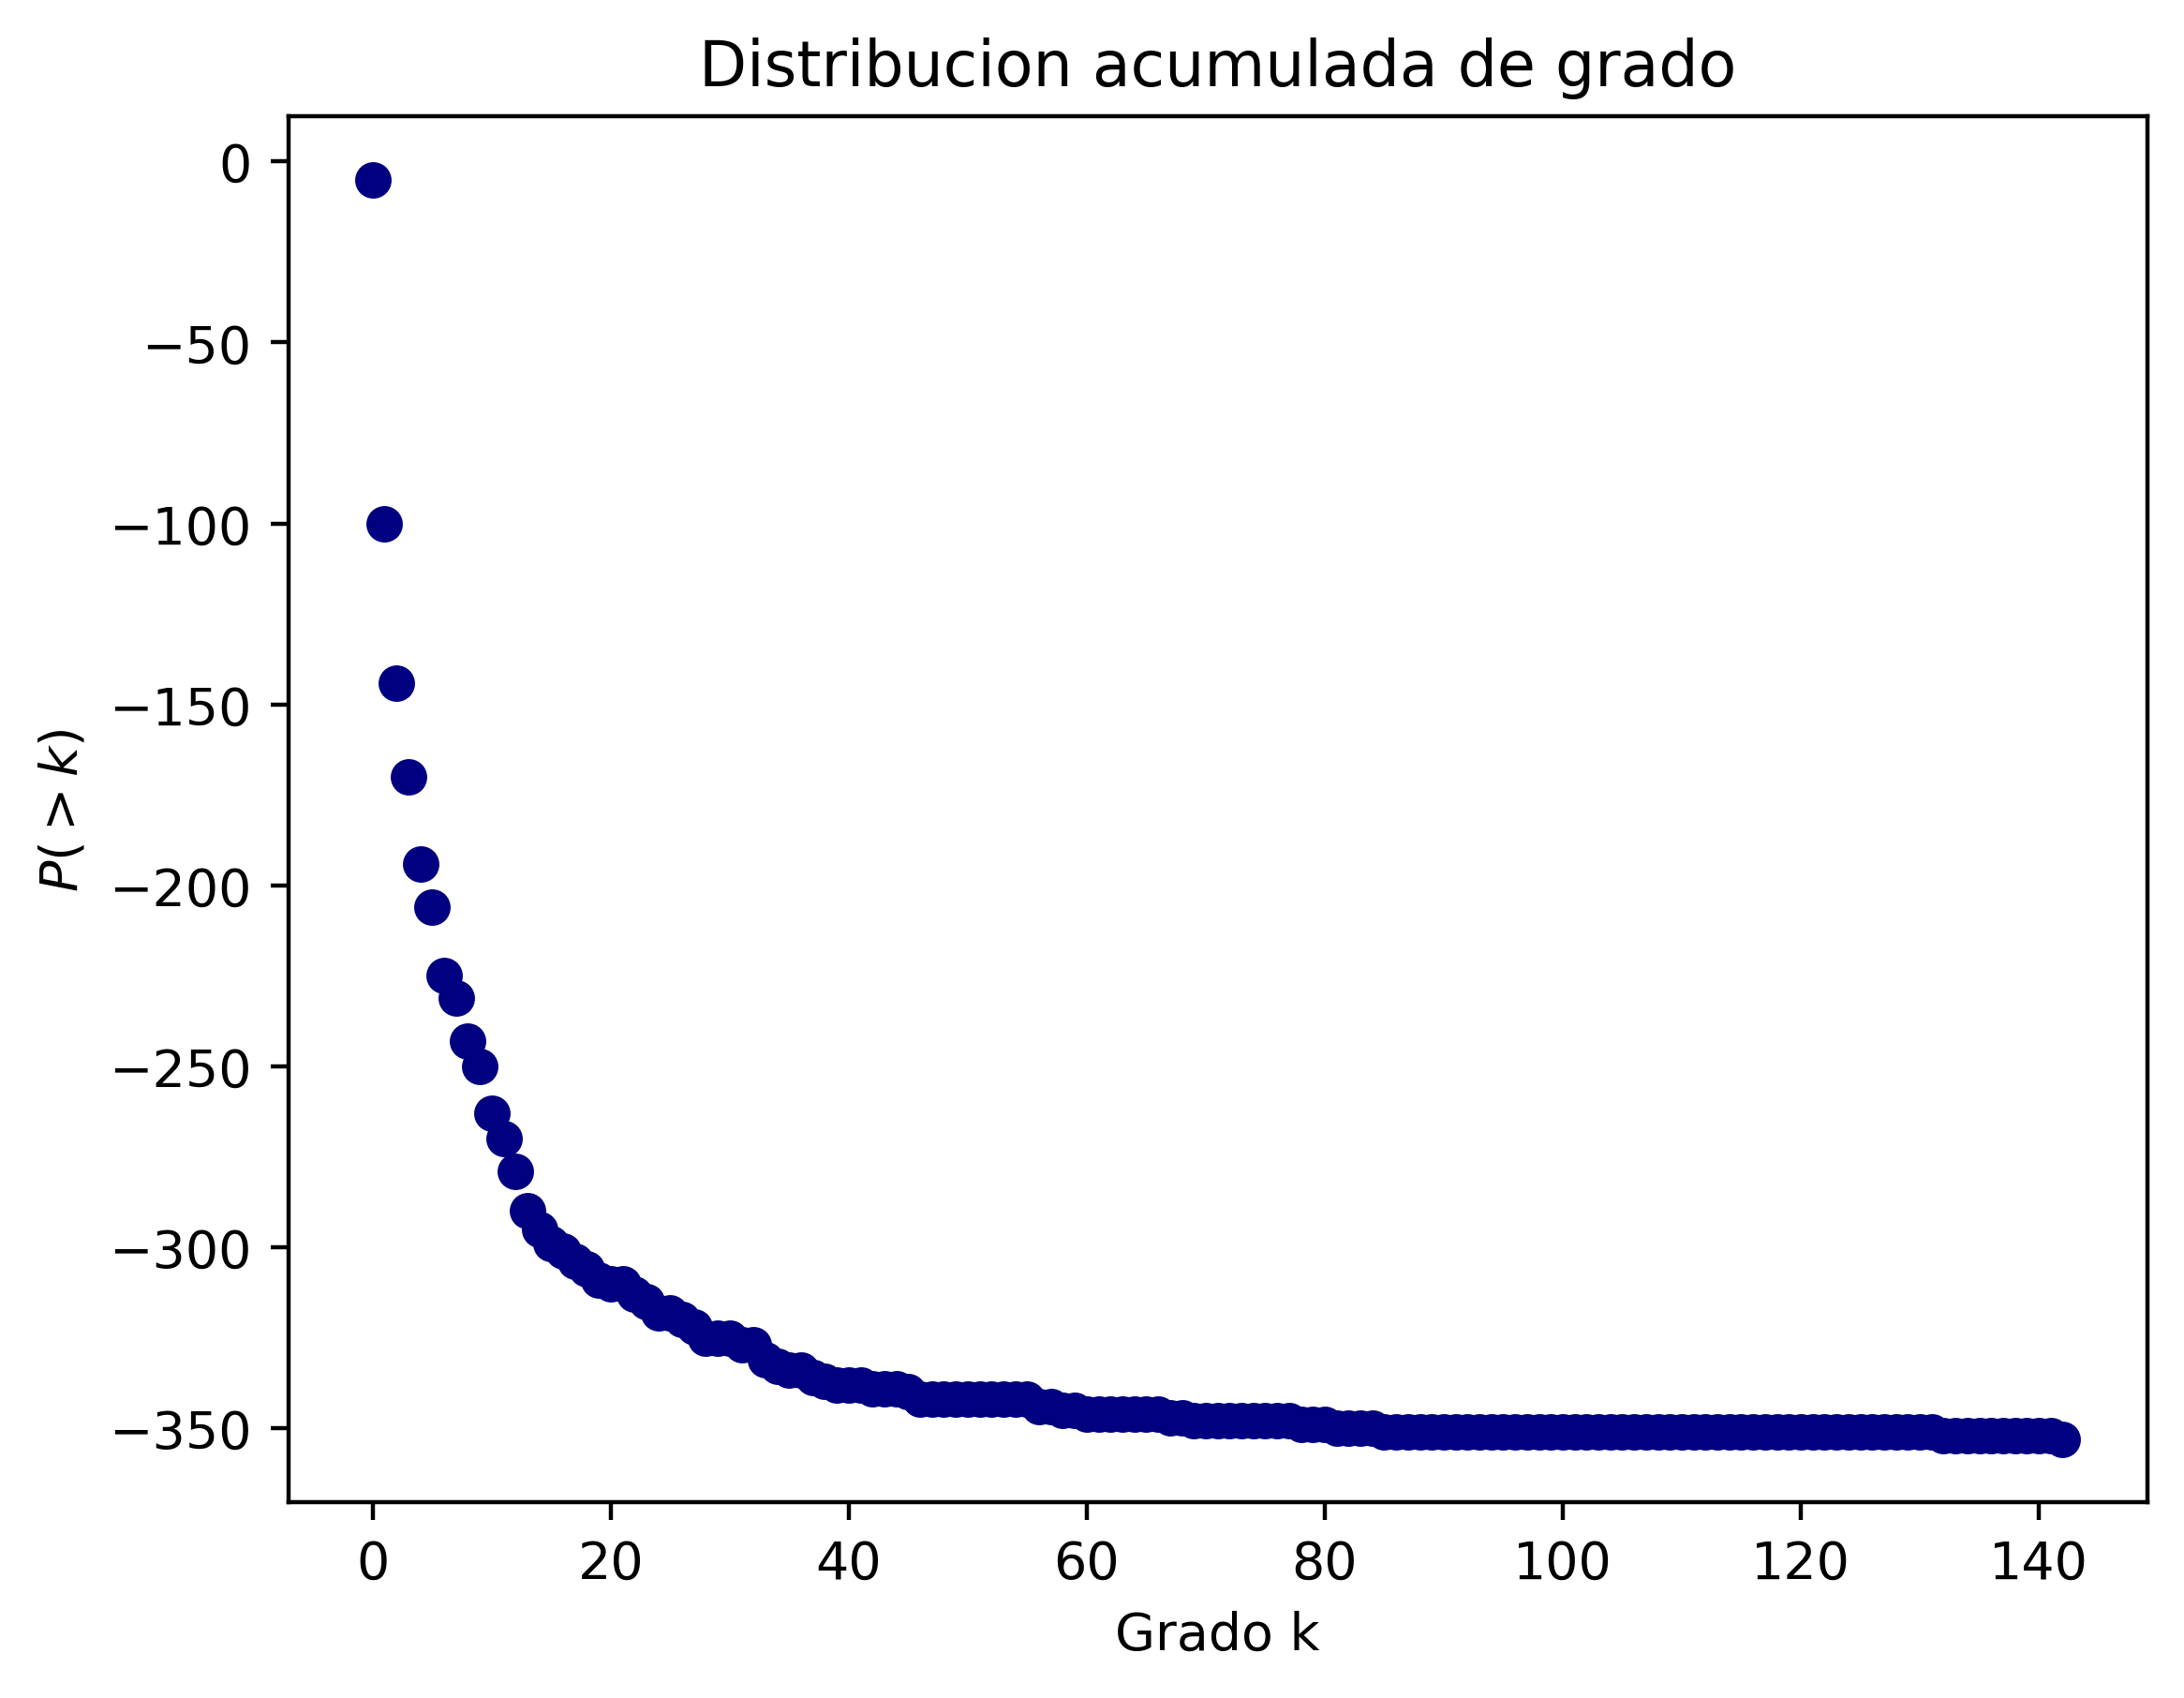

<Figure size 640x480 with 0 Axes>

In [79]:
nodos=GD.nodes()
N=list(nodos)
ind_dict=GD.in_degree(nodos,weight=None)
outd_dict=GD.out_degree(nodos,weight=None)
in_degree=[]
out_degree=[]
for i in range(len(N)):
    in_degree.append(ind_dict[N[i]])
    out_degree.append(outd_dict[N[i]])

indegree_distribution = np.bincount(np.array(in_degree))
outdegree_distribution = np.bincount(np.array(out_degree))
plot(indegree_distribution, edgelist_file, "darkorange","in_degree")
plot(outdegree_distribution, edgelist_file, "navy","out_degree")


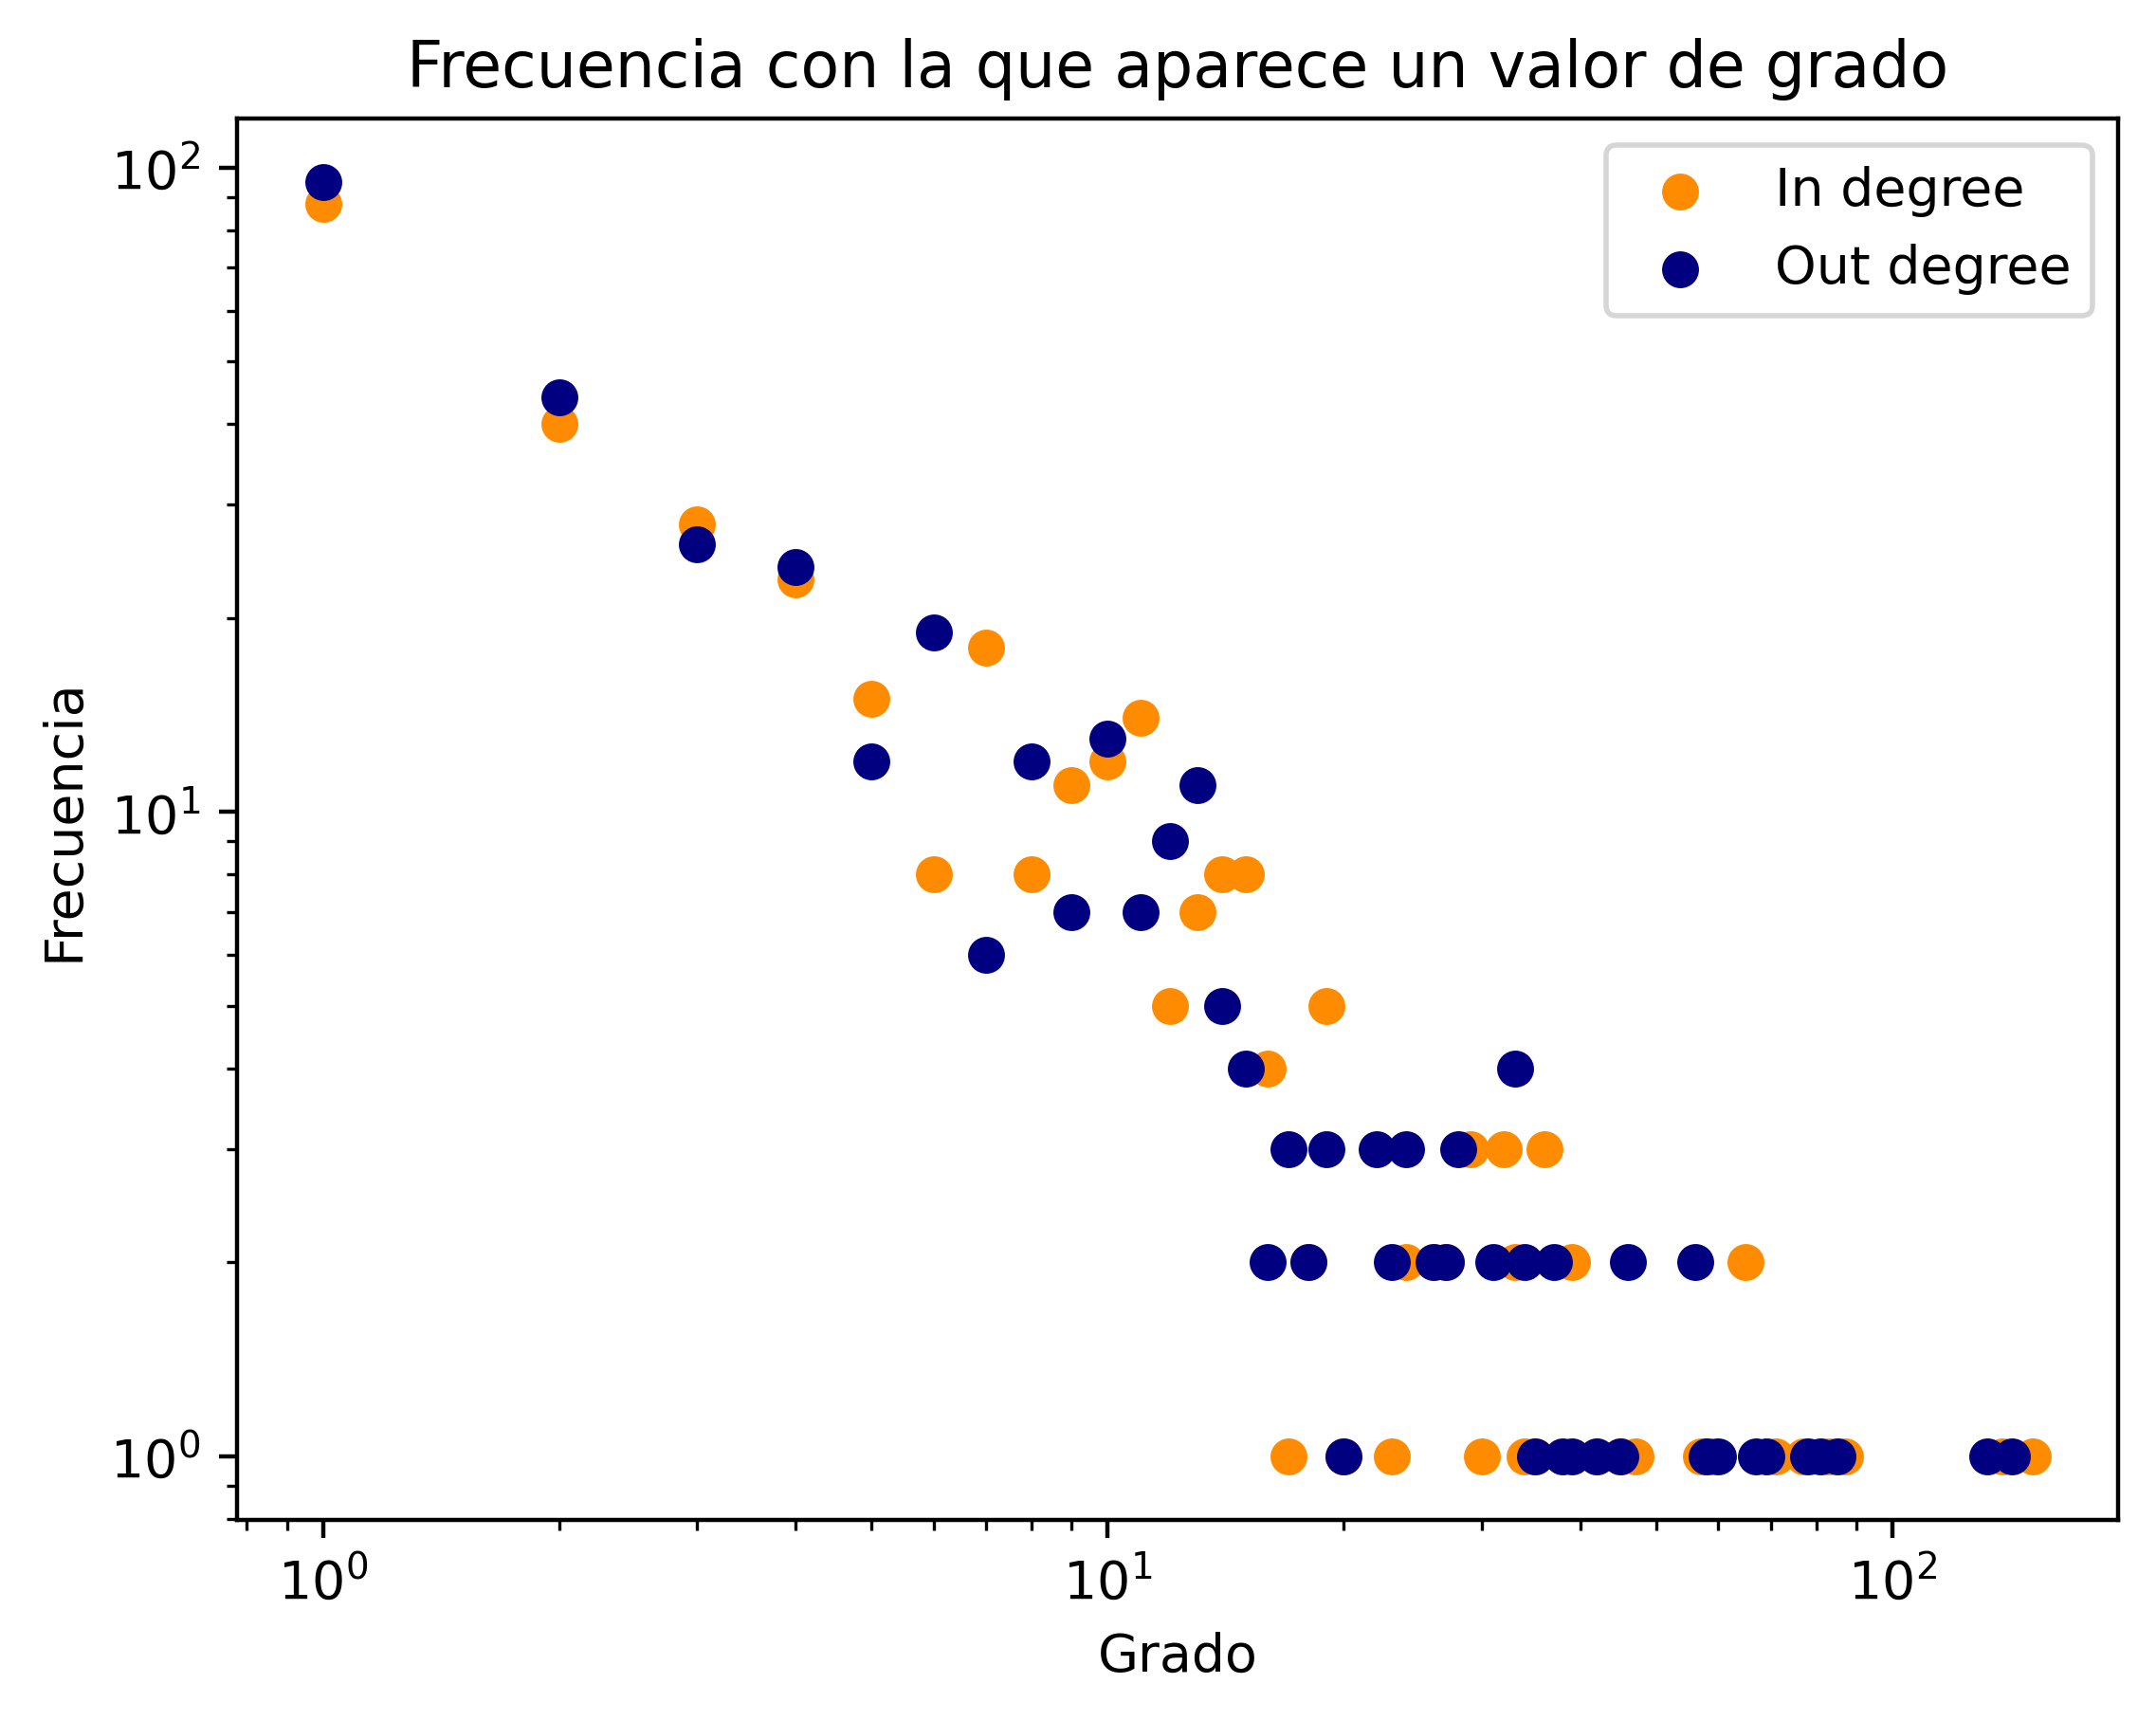

<Figure size 640x480 with 0 Axes>

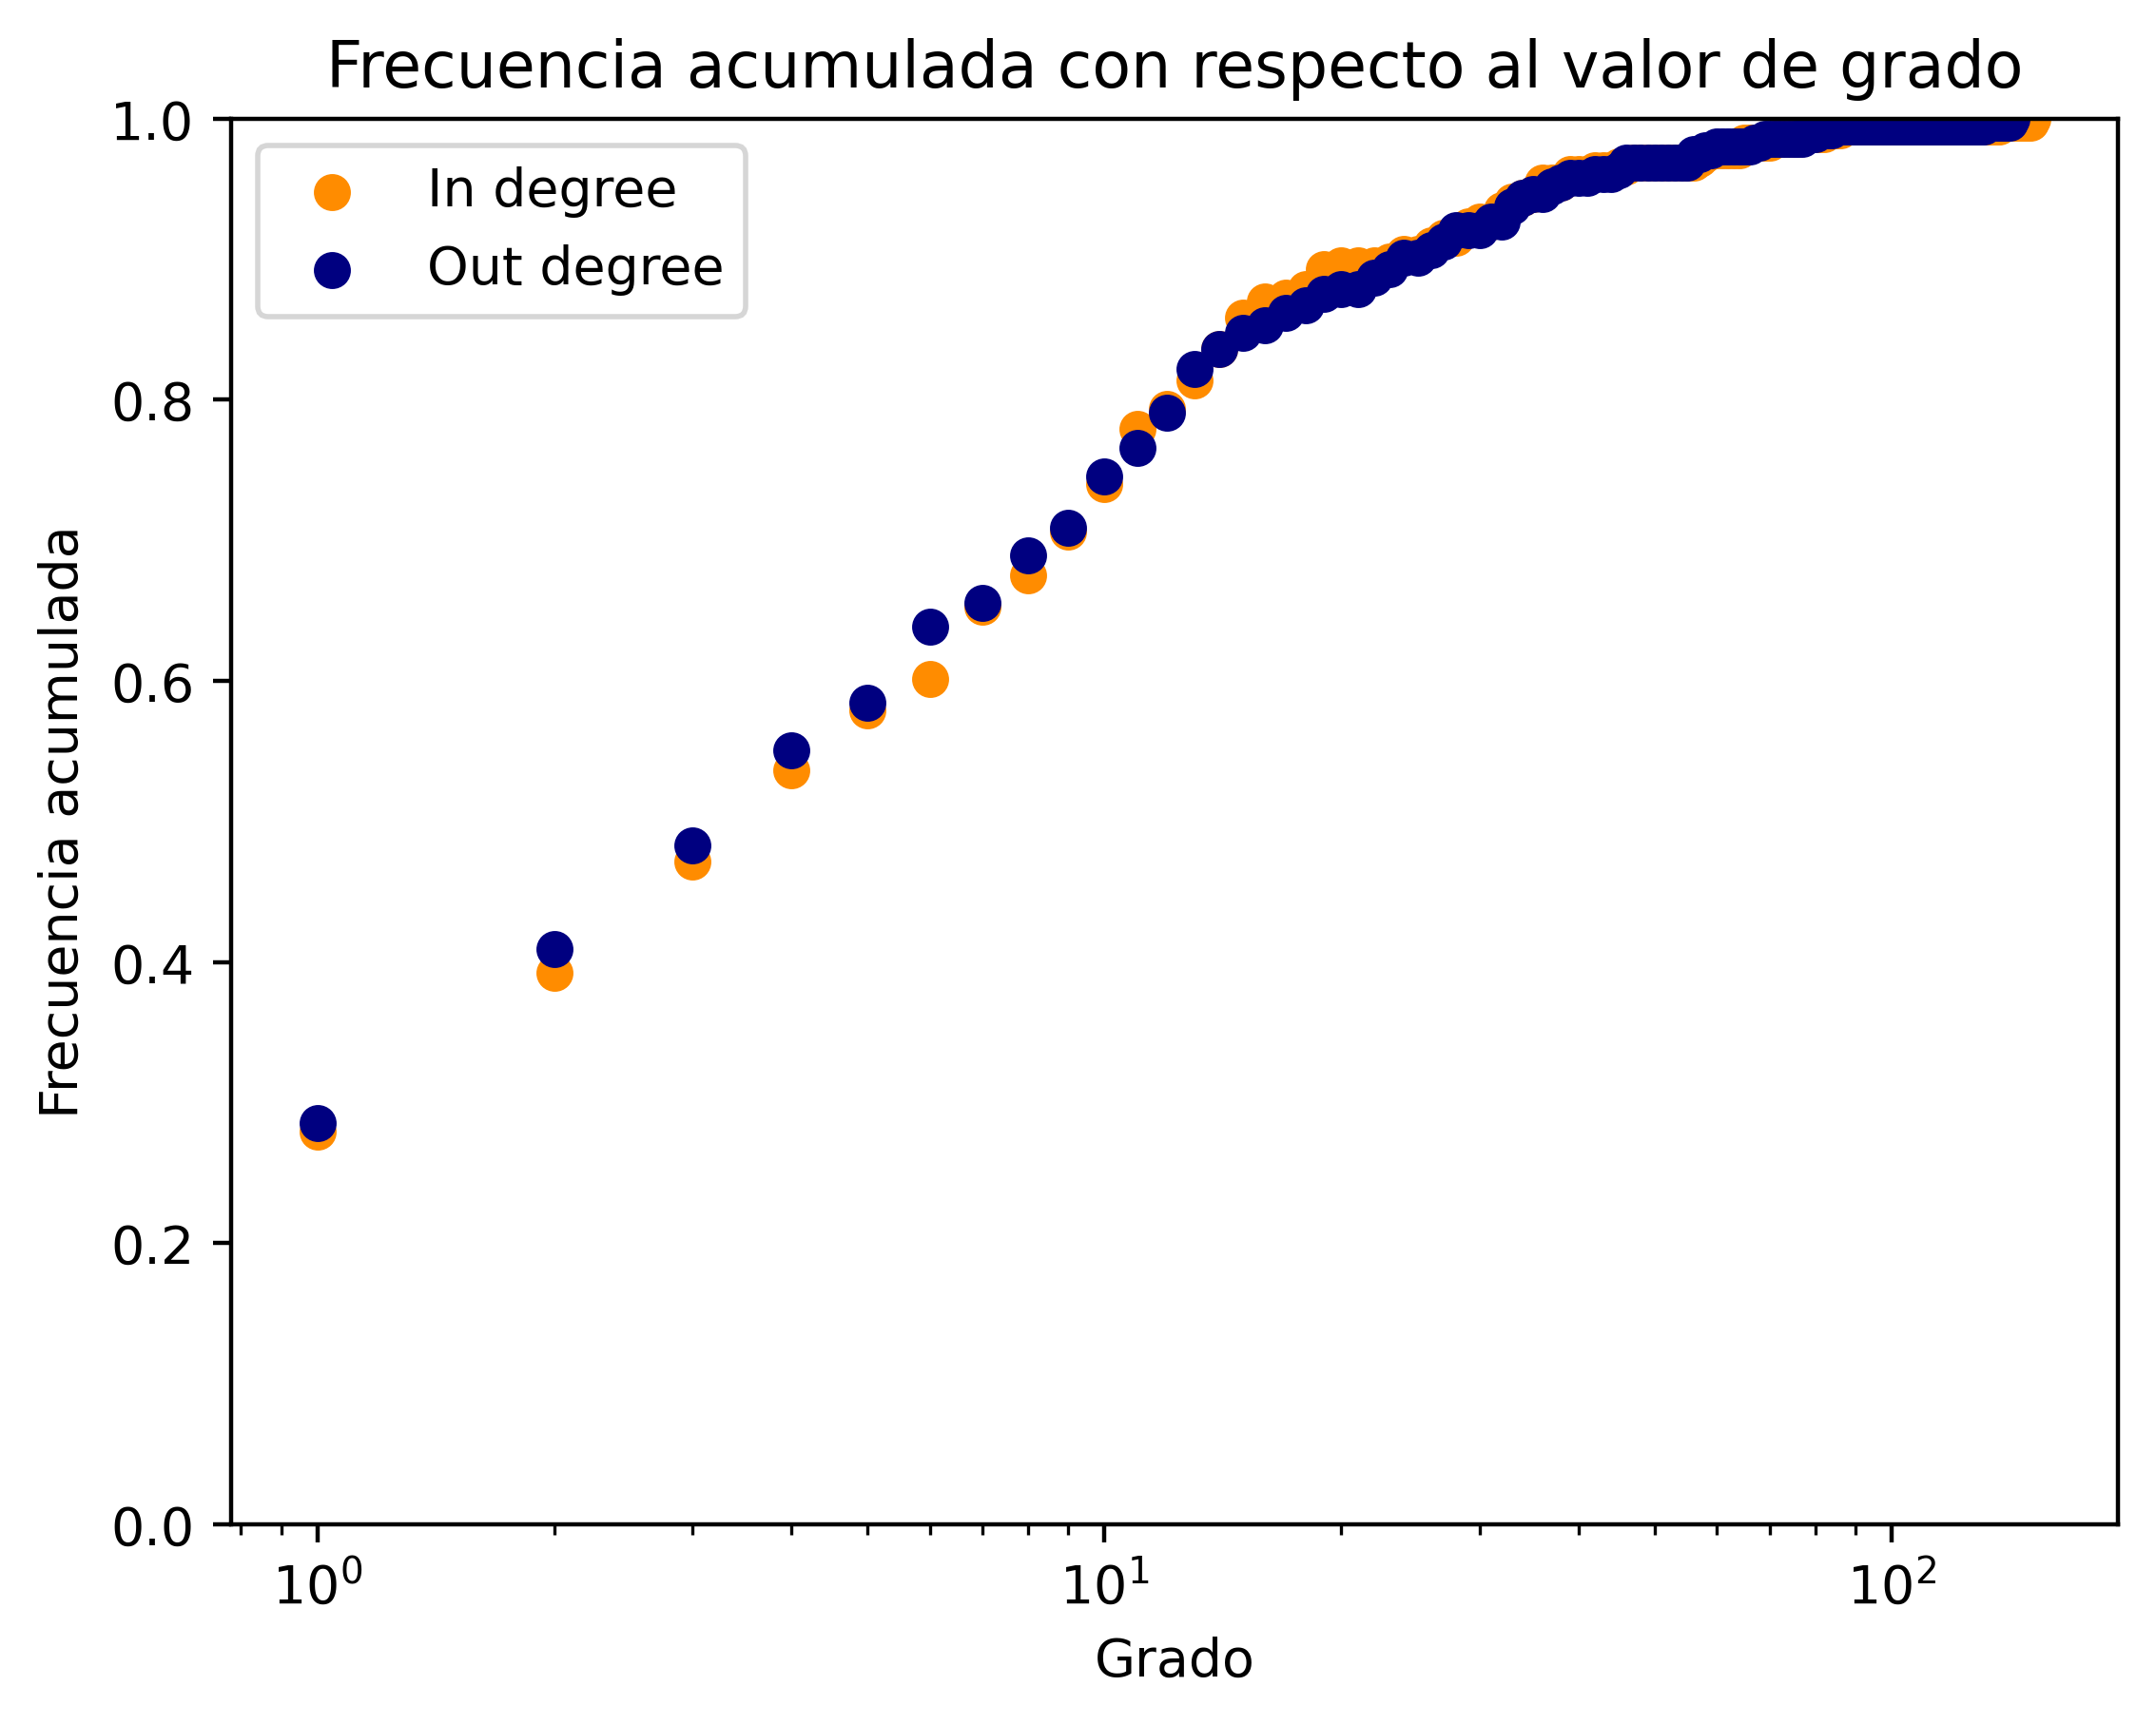

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17504\883155240.py:41: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,1])


<Figure size 640x480 with 0 Axes>

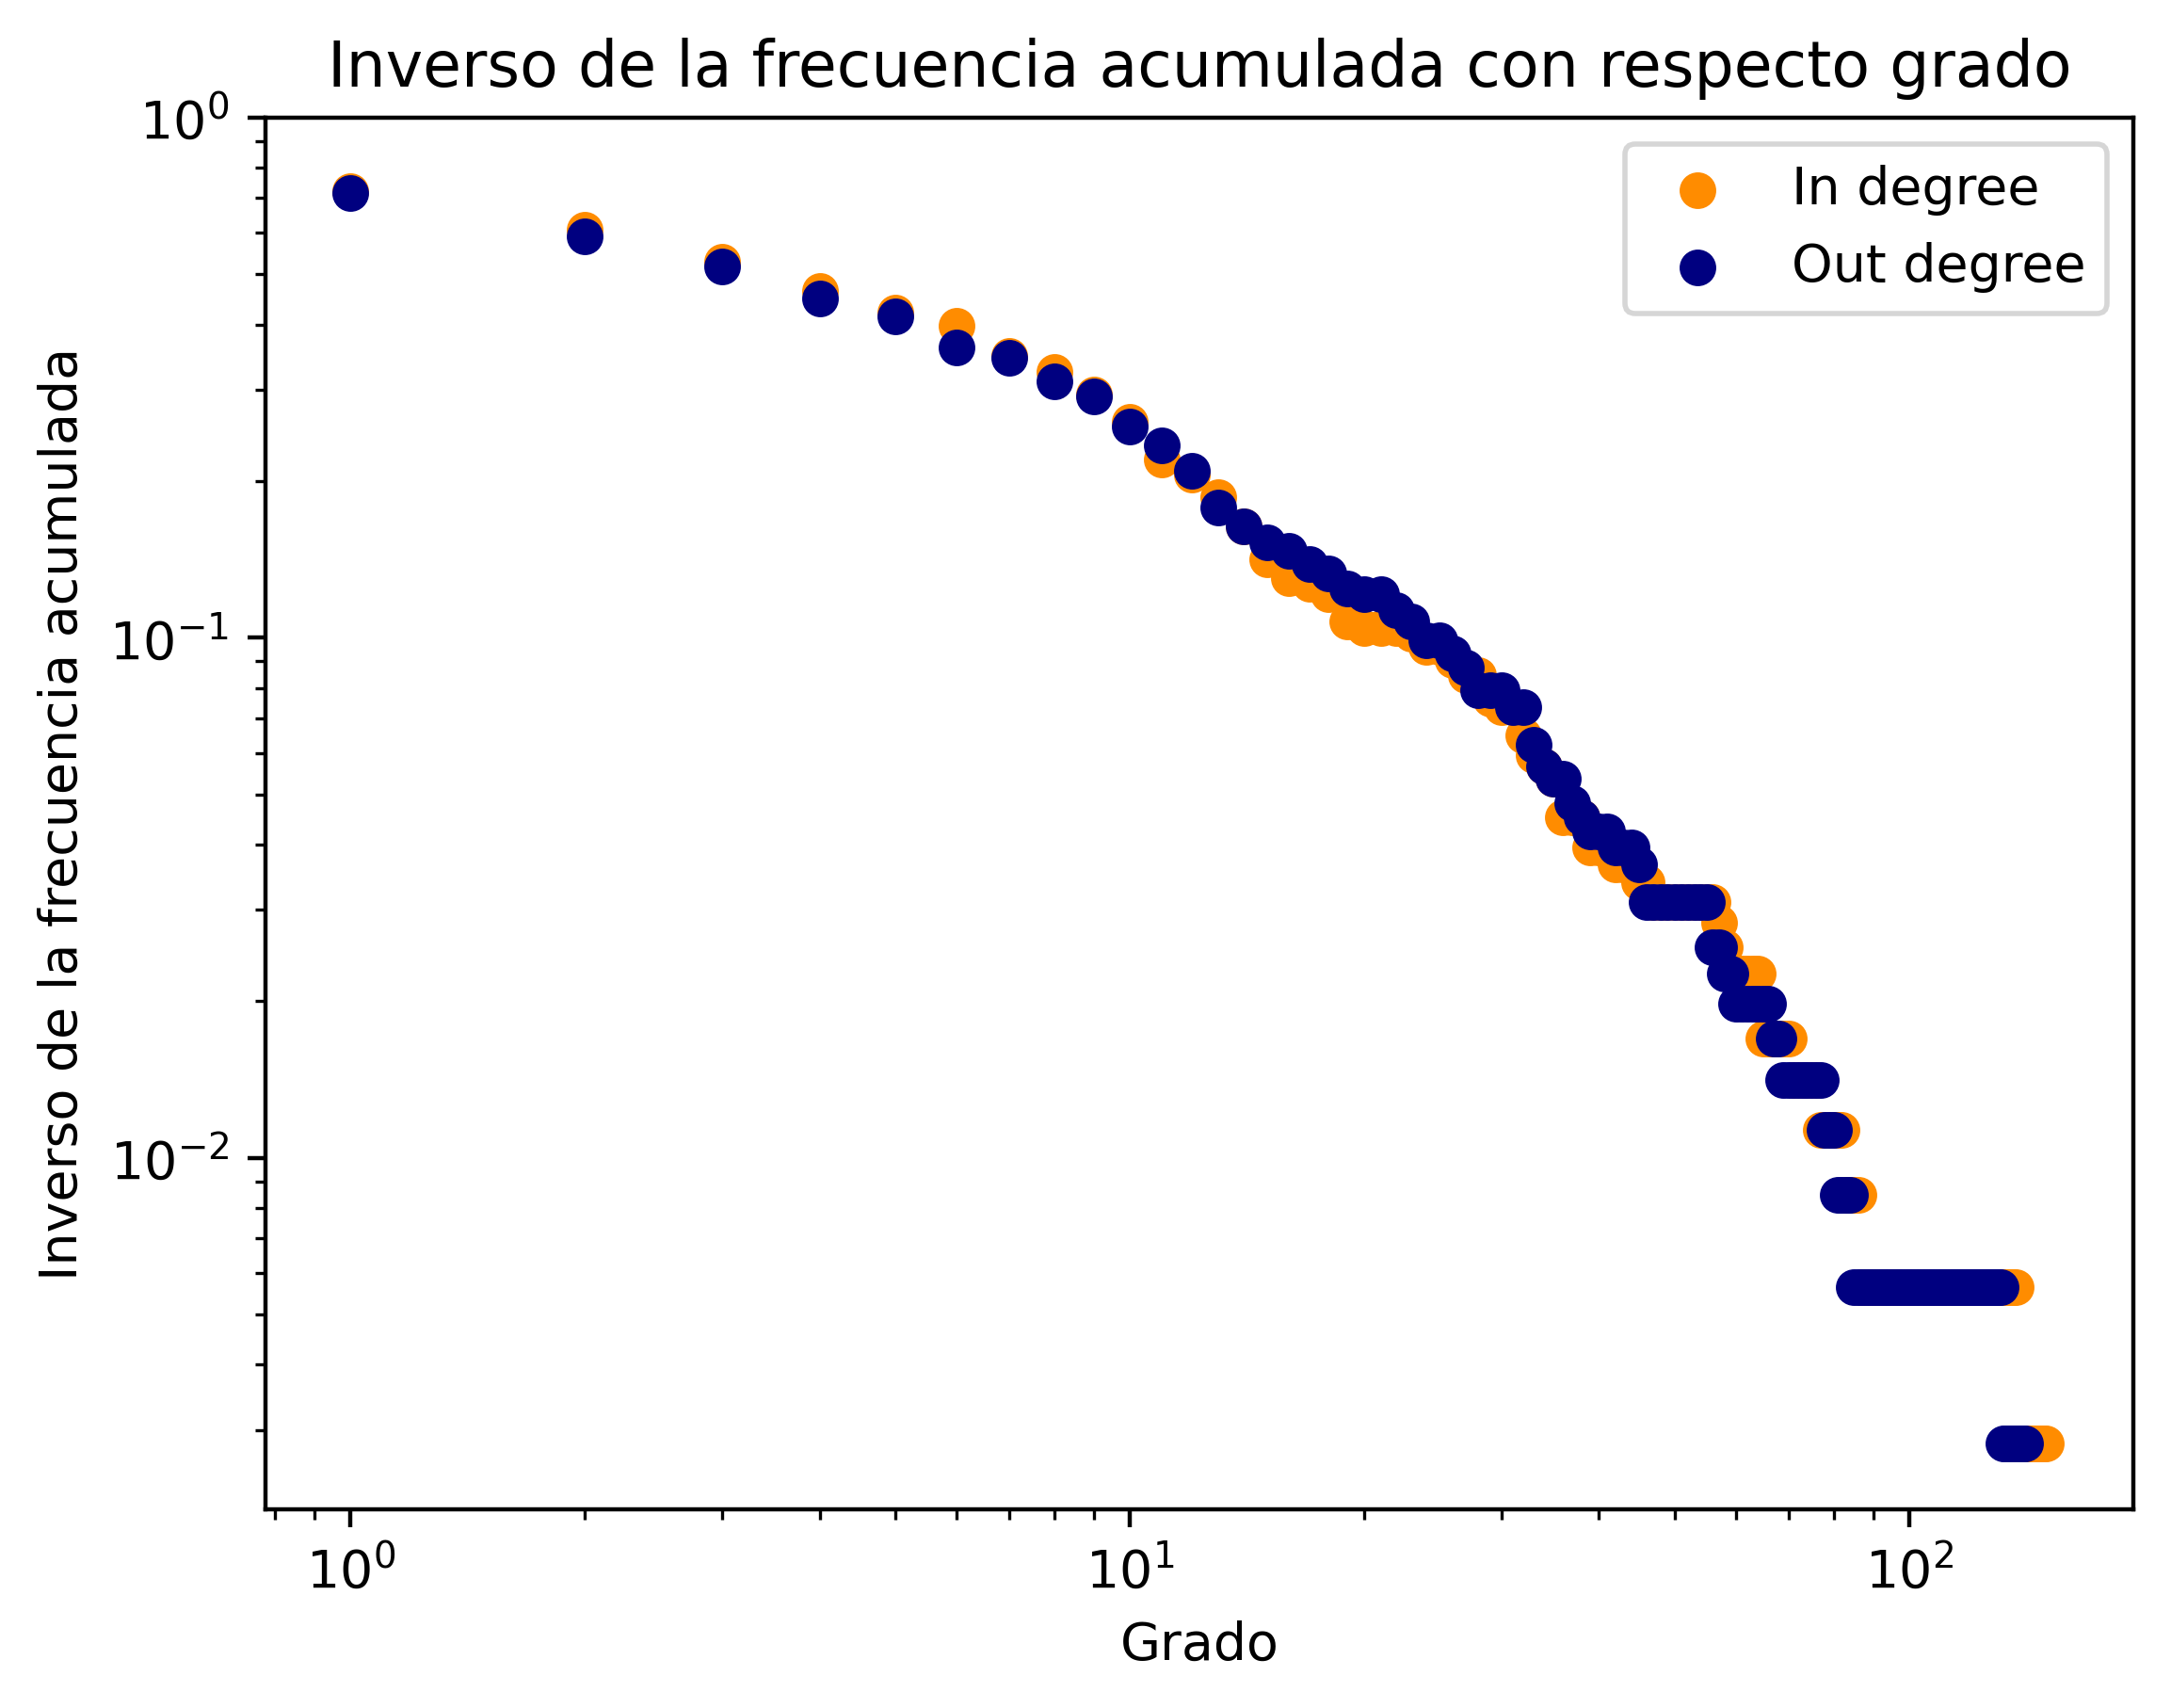

<Figure size 640x480 with 0 Axes>

In [64]:
data=indegree_distribution
data2=outdegree_distribution
plt.figure(dpi=400)
plt.scatter(range(len(data)),data,color='darkorange',label="In degree")
plt.scatter(range(len(data2)),data2,color='navy',label="Out degree")
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Frecuencia')
plt.xlabel('Grado')
plt.title("Frecuencia con la que aparece un valor de grado")
plt.legend()
plt.show()
plt.clf()

""" Plot CDF """
plt.figure(dpi=400)
s = float(data.sum())
s2=float(data2.sum())
cdf = data.cumsum(0)/s
cdf2= data2.cumsum(0)/s2
plt.scatter(range(len(cdf)),cdf,color='darkorange',label="In degree")
plt.scatter(range(len(cdf2)),cdf2,color='navy',label="Out degree")
plt.xscale('log')
plt.ylim([0,1])
plt.title("Frecuencia acumulada con respecto al valor de grado")
plt.ylabel('Frecuencia acumulada')
plt.legend()
plt.xlabel('Grado')
plt.show()
plt.clf()

""" Plot CCDF """
plt.figure(dpi=400)
ccdf = 1-cdf
ccdf2=1-cdf2
plt.scatter(range(len(ccdf)),ccdf,color='darkorange',label="In degree")
plt.scatter(range(len(ccdf2)),ccdf2,color='navy',label="Out degree")
plt.title("Inverso de la frecuencia acumulada con respecto grado")
plt.xscale('log')
plt.yscale('log')
plt.ylim([0,1])
plt.ylabel('Inverso de la frecuencia acumulada')
plt.legend()
plt.xlabel('Grado')
plt.show()
plt.clf()

## Fortaleza no dirigida


(-397.40000000000003, 4500.0)

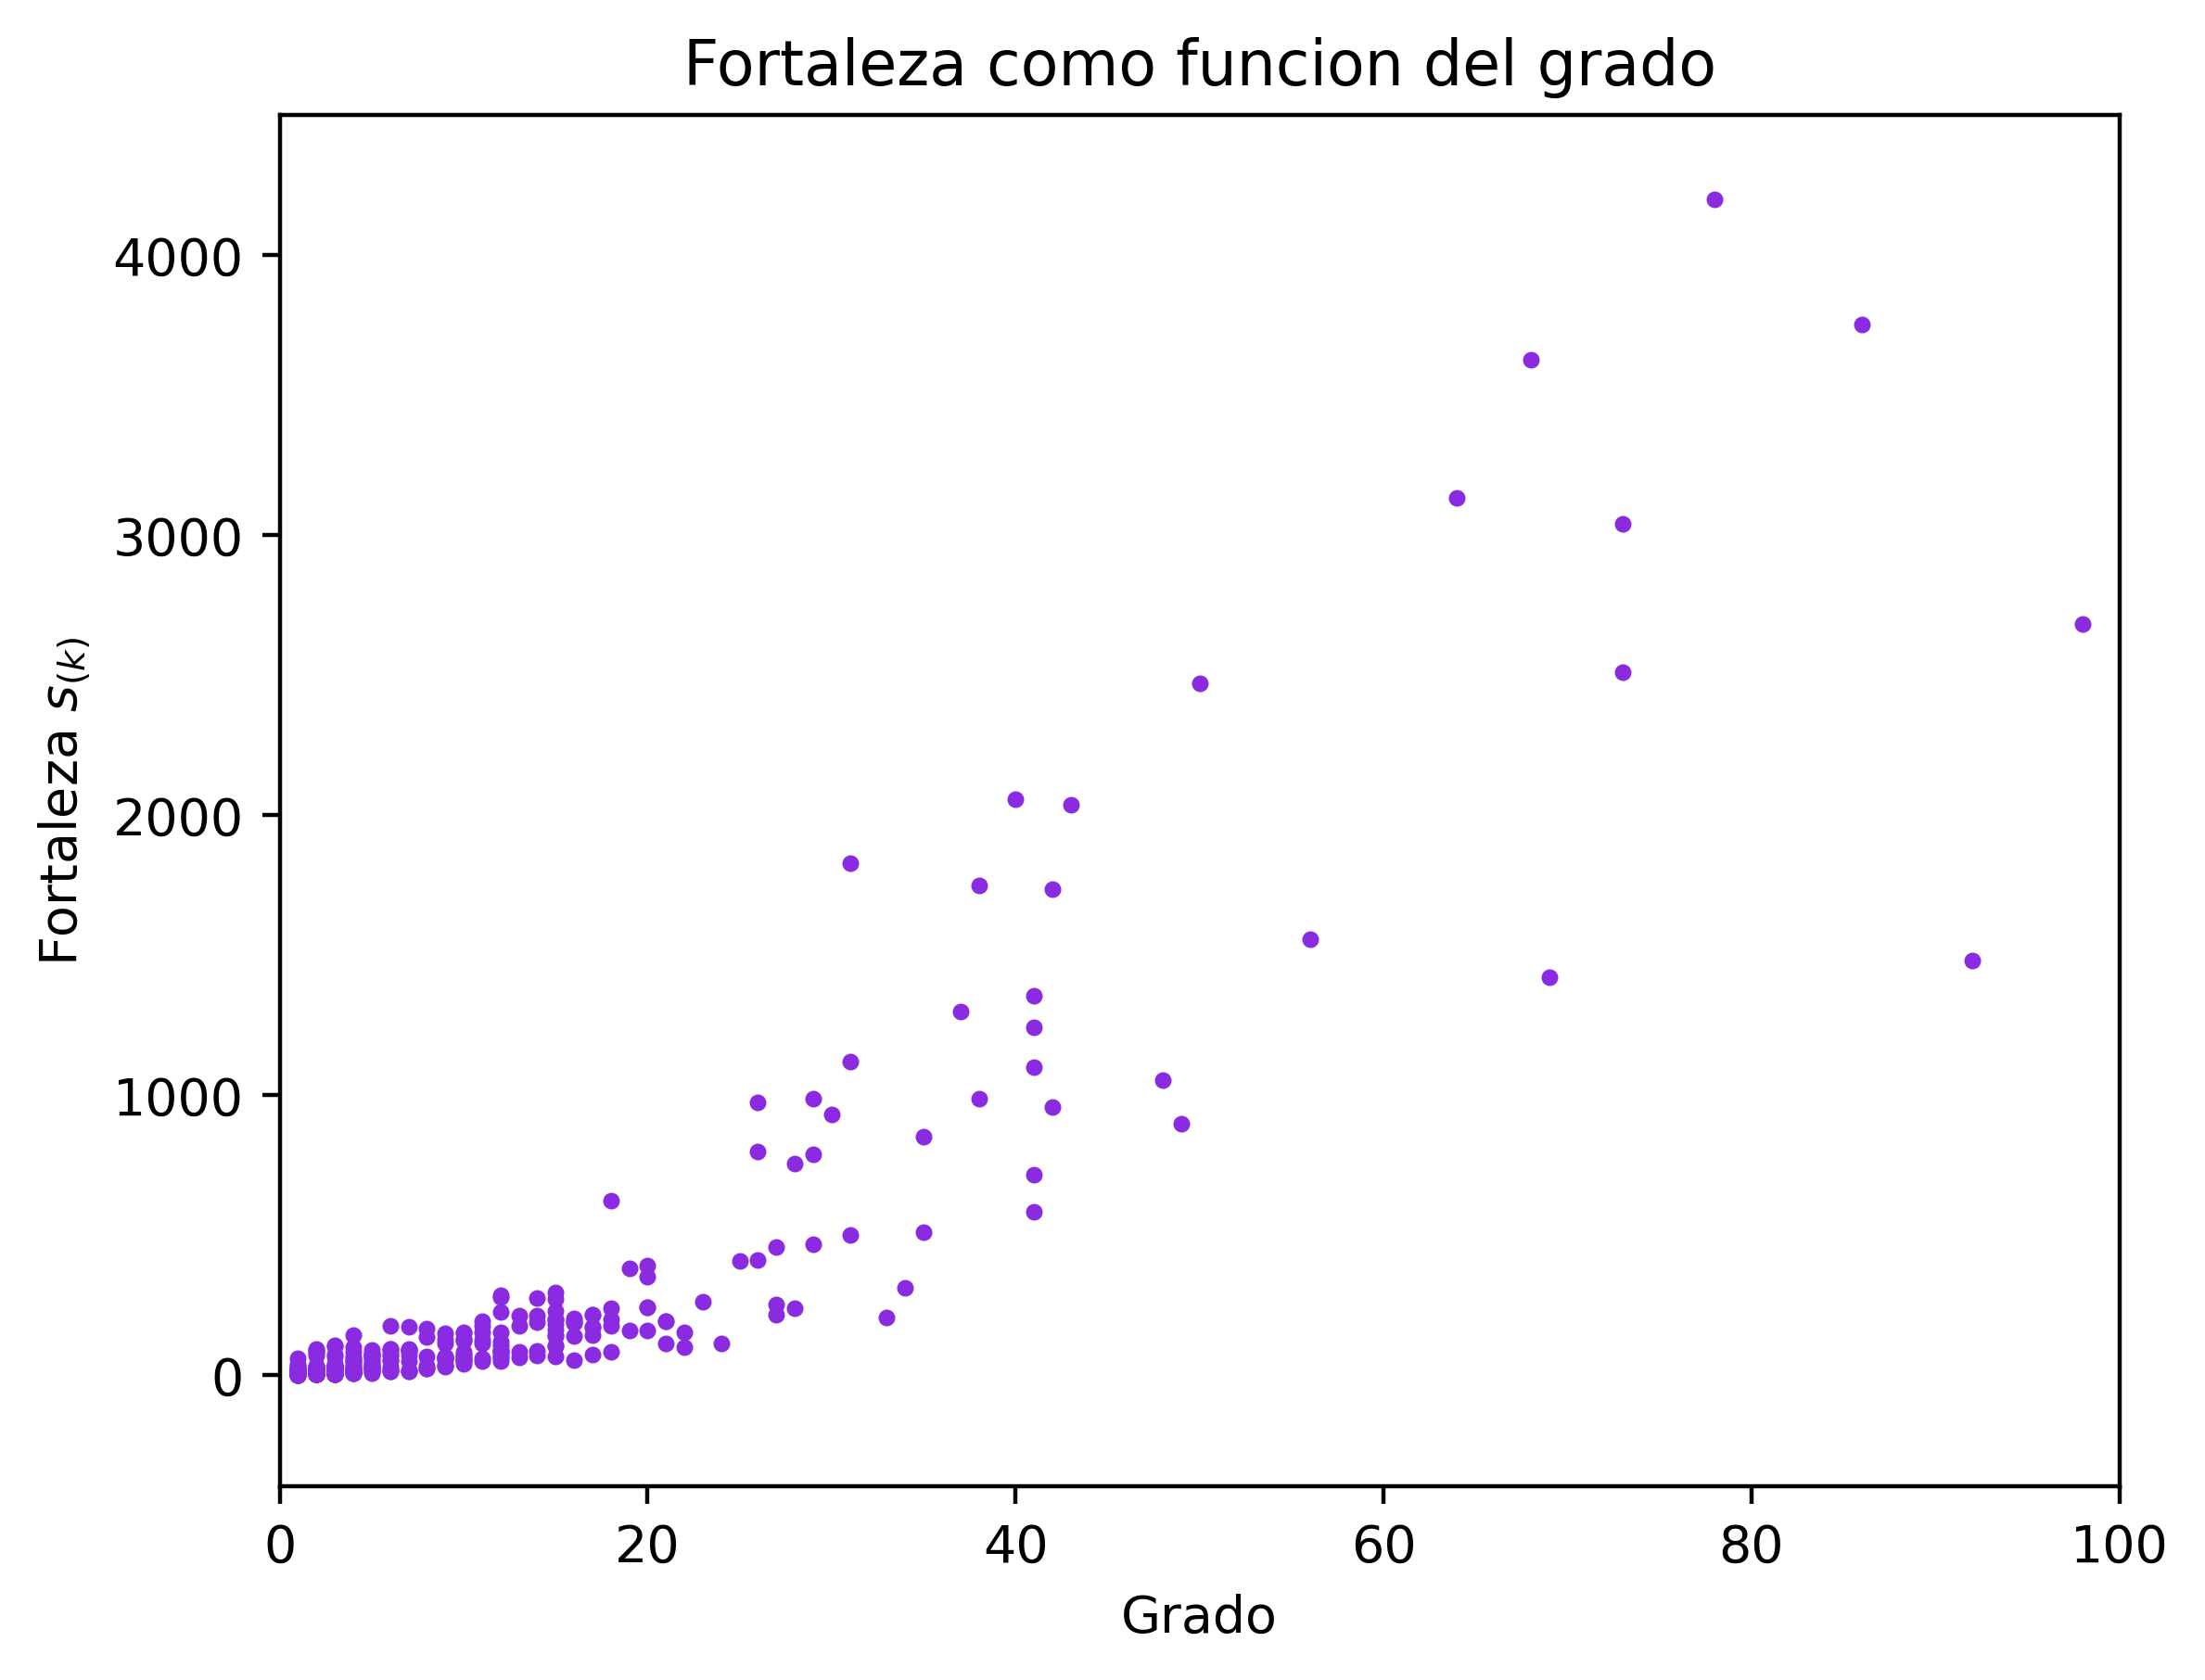

In [105]:
S= G.degree(weight="weight")
F= GD.degree(weight="weight")
S_1=np.zeros((len(S),2))
F_1=np.zeros((len(F),2))
ii=0
for i in S:

    s=G.degree(i[0],weight="weight")
    d=G.degree(i[0],weight=None)
    S_1[ii,0]=s
    S_1[ii,1]=d
    ii+=1
    #print(i[0],d,s)

ii=0
for i in F:

    f=GD.degree(i[0],weight="weight")
    d=GD.degree(i[0],weight=None)
    F_1[ii,0]=f
    F_1[ii,1]=d
    ii+=1


S_2=S_1.T

F_2=F_1.T
#print(S_2)
plt.figure(dpi=400)
plt.scatter(S_2[1],S_2[0],color="blueviolet",s=5,label="No dirigido")
plt.scatter(F_2[1],F_2[0],color="blueviolet",s=5,label="Dirigido")
plt.ylabel("Fortaleza $s_{(k)}$")
plt.xlabel("Grado")
plt.title("Fortaleza como funcion del grado")

plt.xlim(xmax=100,xmin=0)
plt.ylim(ymax=4500)




## Clustering coefficient

0.5908455783702407


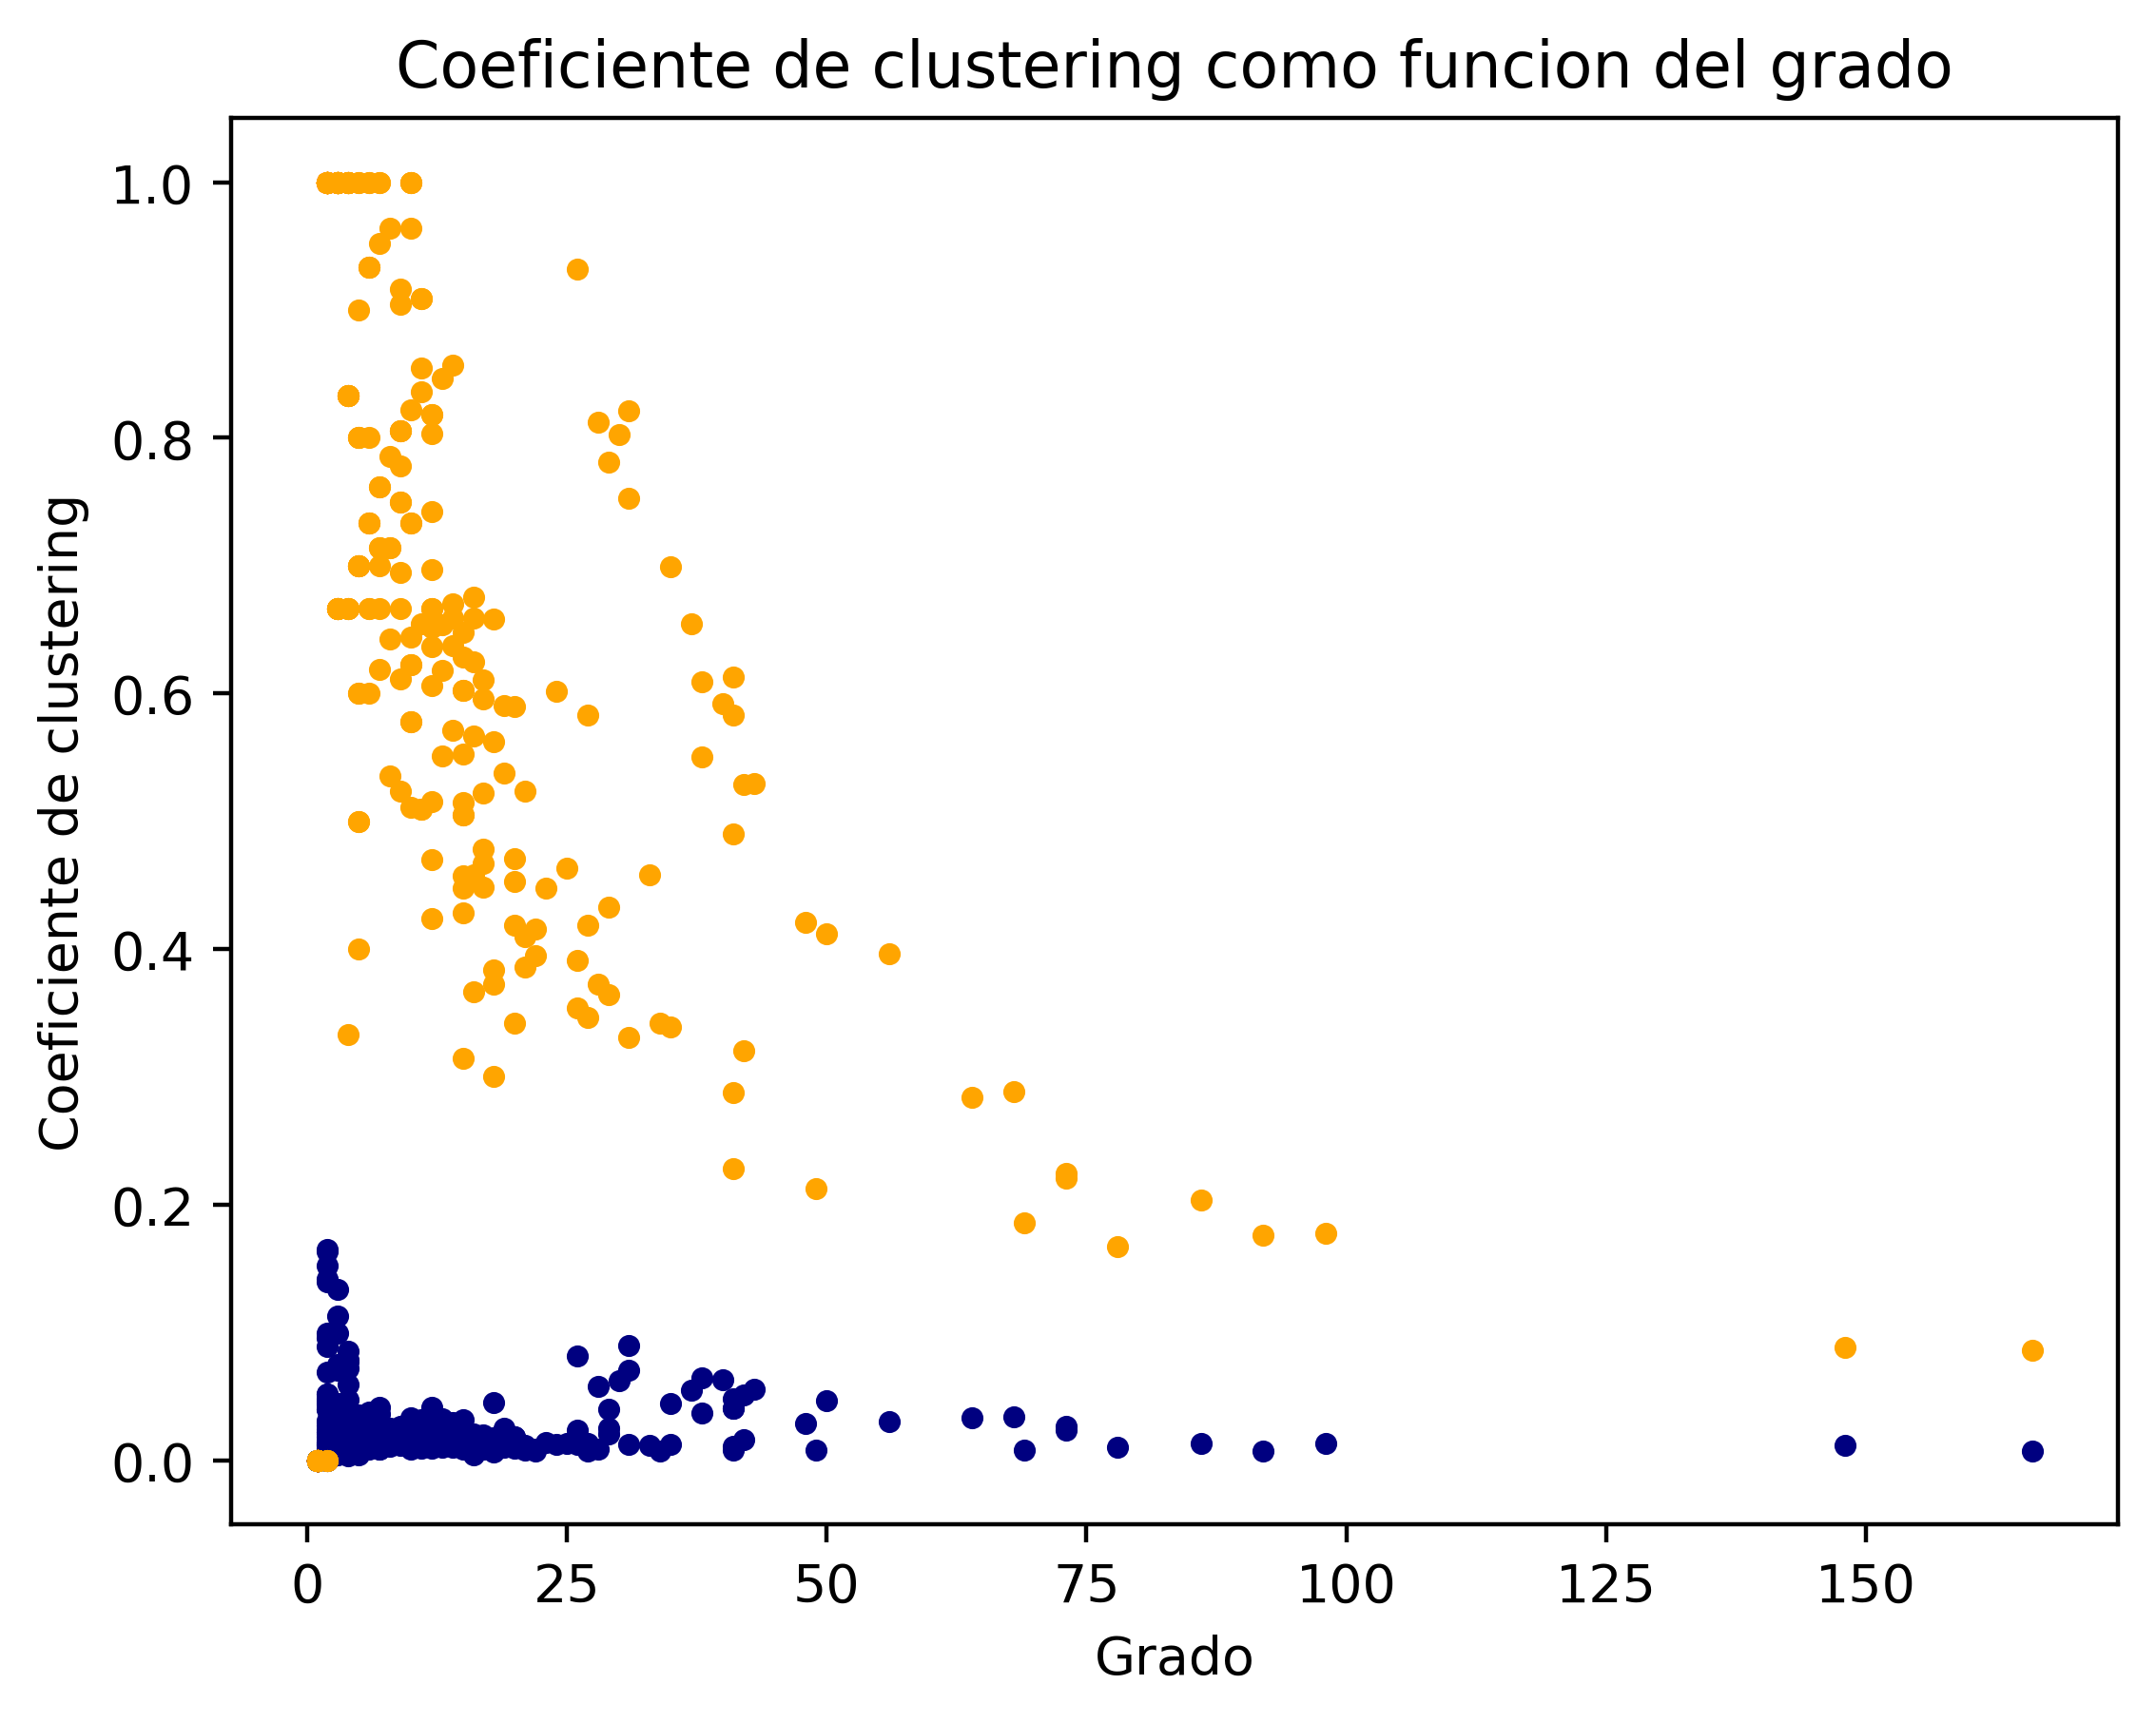

In [66]:
nodes=G.nodes()
w="weight"
s_keys=list(nx.clustering(G,weight=w))
s=nx.clustering(G,weight=w)
Cc=np.zeros((len(s_keys),2))
ii=0
for s_k in s_keys:
    cl=s[s_k]
    d=G.degree(s_k,weight=None)
    Cc[ii,0]=cl
    Cc[ii,1]=d
    ii+=1
plt.figure(dpi=400)
plt.scatter(Cc[:,1],Cc[:,0],color="navy",s=10)
#plt.xlim(xmax=1000,xmin=0)
plt.ylabel("Coeficiente de clustering")
#plt.yscale('log')
plt.xlabel("Grado")
plt.title("Coeficiente de clustering como funcion del grado")

w=None
s_keys=list(nx.clustering(G,weight=w))
s=nx.clustering(G,weight=w)
Cc=np.zeros((len(s_keys),2))
ii=0
for s_k in s_keys:
    cl=s[s_k]
    d=G.degree(s_k,weight=w)
    Cc[ii,0]=cl
    Cc[ii,1]=d
    ii+=1
plt.scatter(Cc[:,1],Cc[:,0],color="orange",s=10)
print(np.average(Cc[:,0]))

Text(0.5, 0, 'Combinaciones posibles entre Origen y Destino')

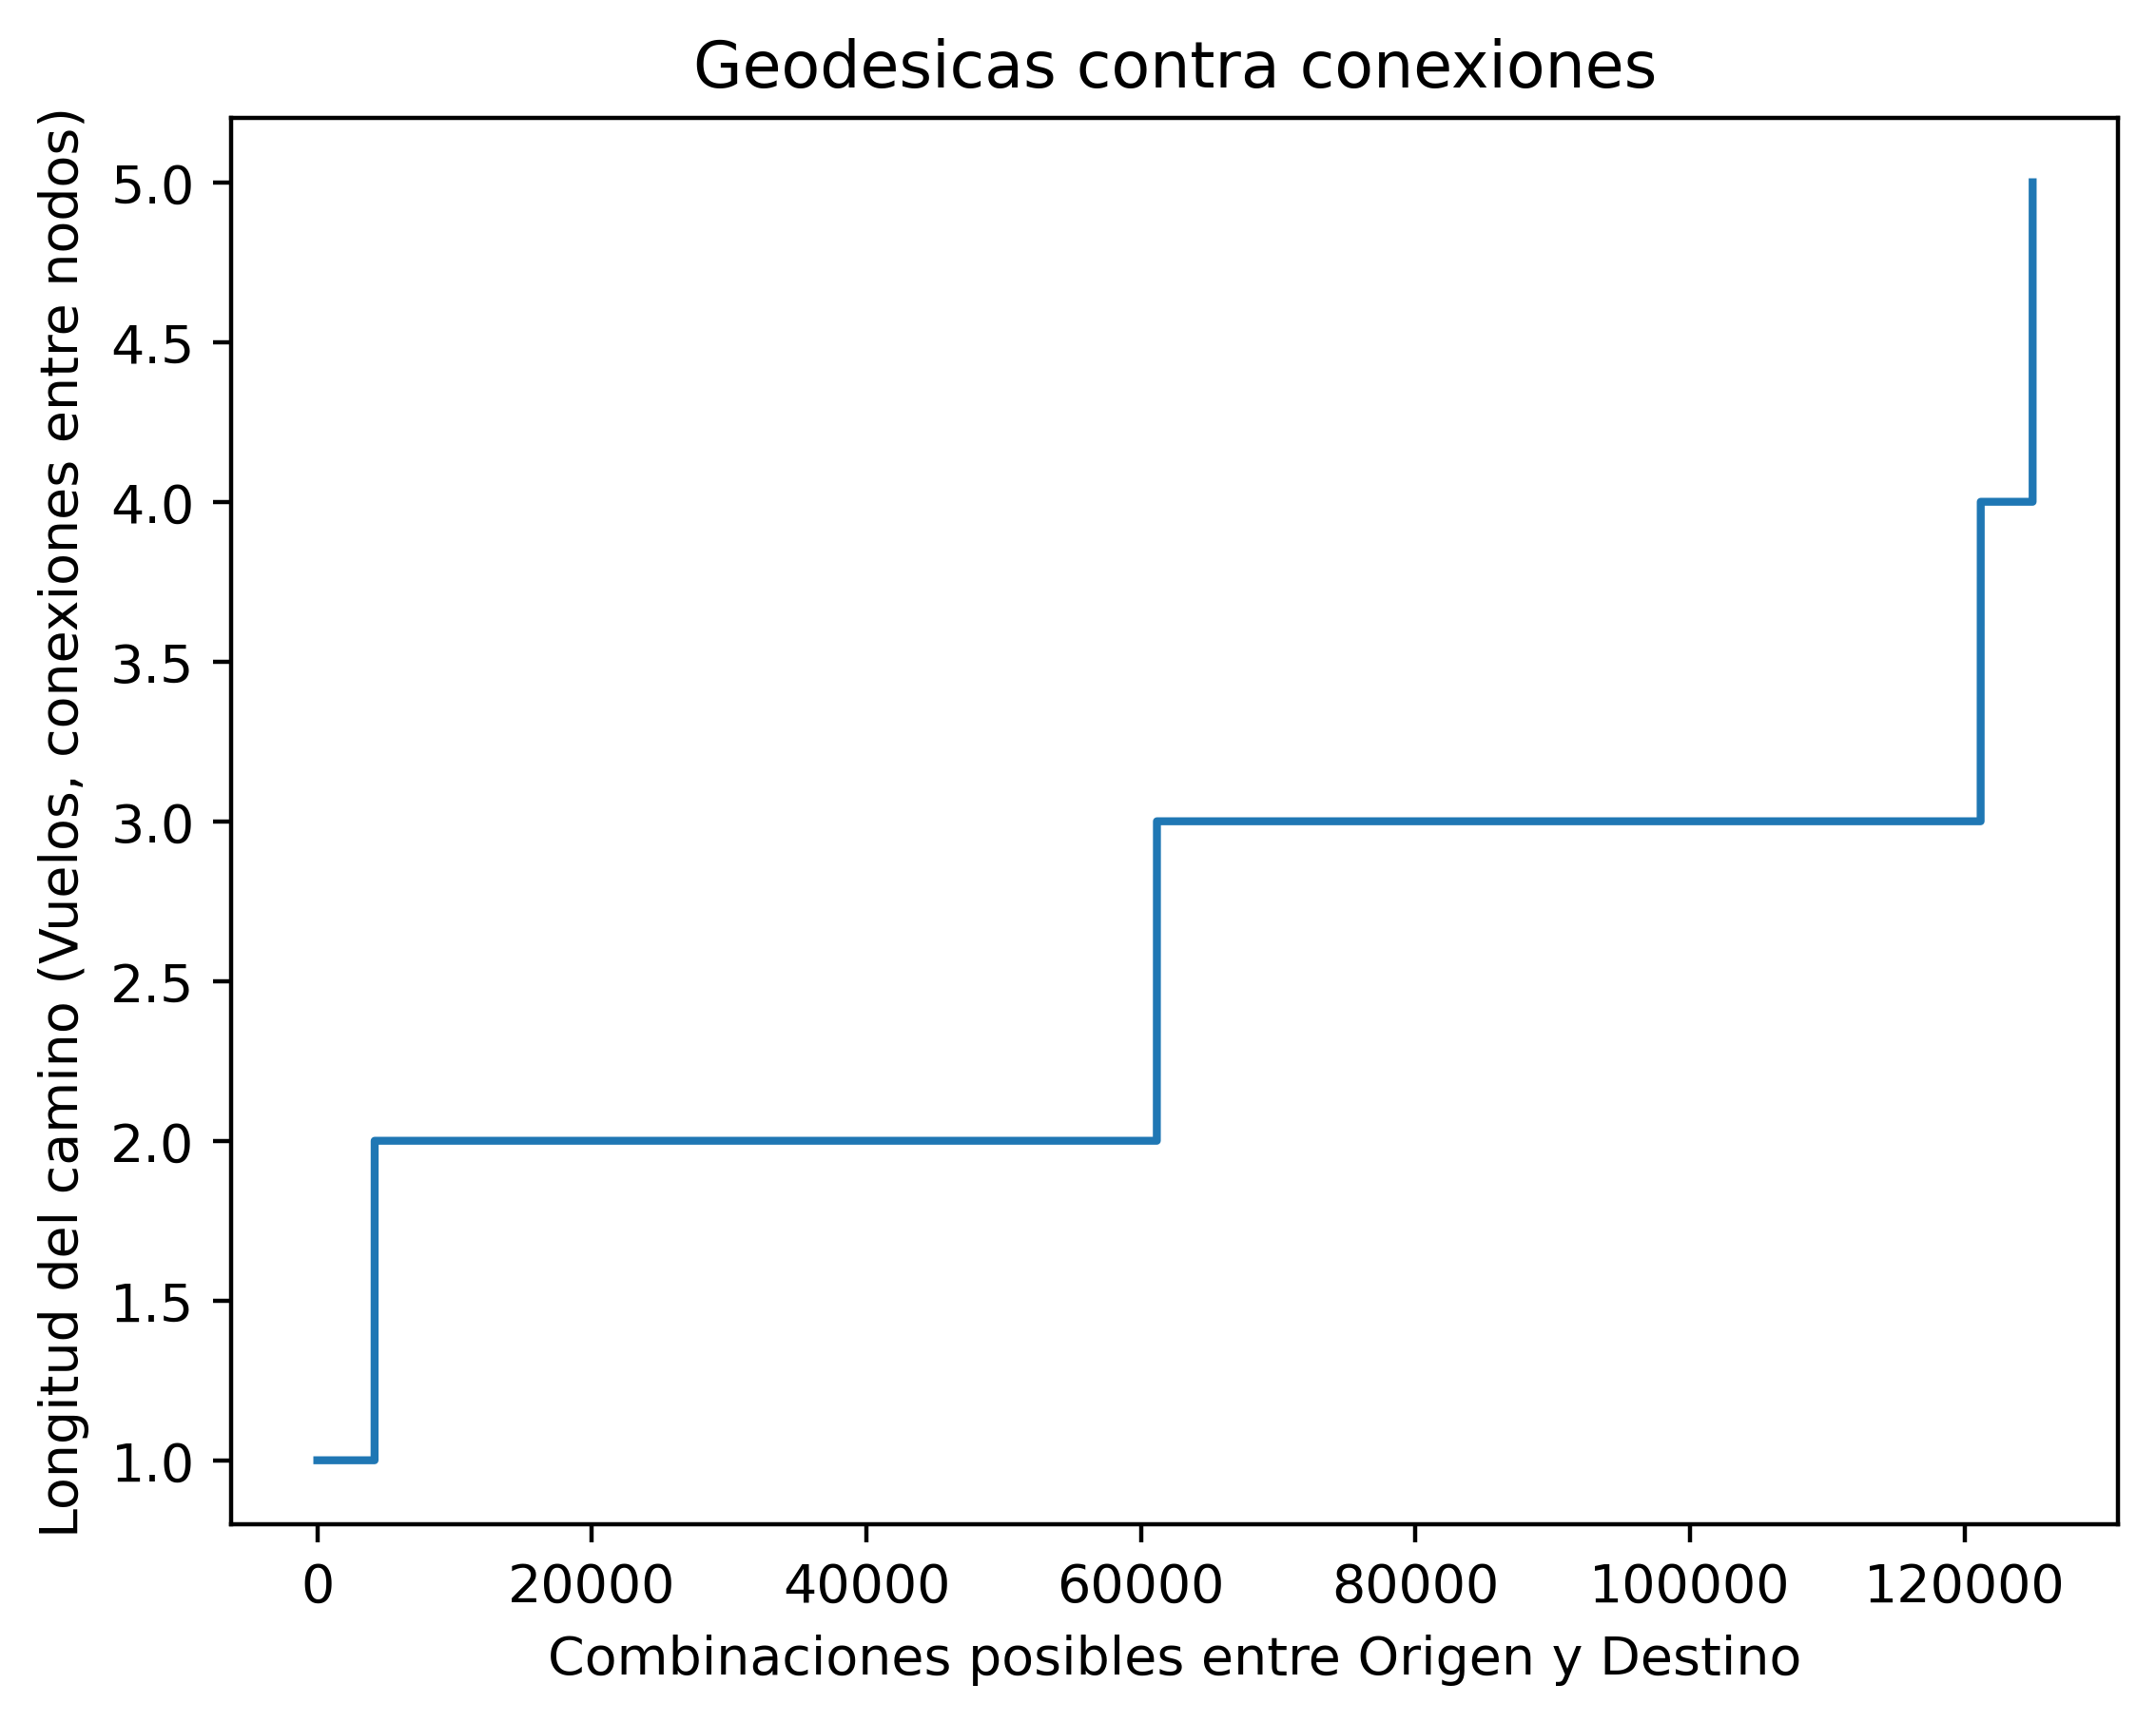

In [67]:
nodos=list(G.nodes())
nodos.sort()
caminos=[]
for nodo in nodos:
    h=nx.single_source_shortest_path(G,source=nodo)
    for nodo2 in nodos:
        if nodo!=nodo2:
            
            caminos.append([nodo, nodo2,len(h[nodo2])])

np_caminos=np.zeros((len(caminos)))
ii=0
for i in caminos:
    np_caminos[ii]=i[2]
    ii+=1

plt.figure(dpi=400)
plt.plot(np.sort(np_caminos)-1)
plt.title("Geodesicas contra conexiones")
plt.ylabel("Longitud del camino (Vuelos, conexiones entre nodos)")
plt.xlabel("Combinaciones posibles entre Origen y Destino")


In [68]:
avg_caminos=np.average(np_caminos-1)
median_caminos=np.median(np_caminos-1)
print(f"La longitud promedio es: {avg_caminos}\nLa longitud media es: {median_caminos}")

La longitud promedio es: 2.5075622989388773
La longitud media es: 3.0
